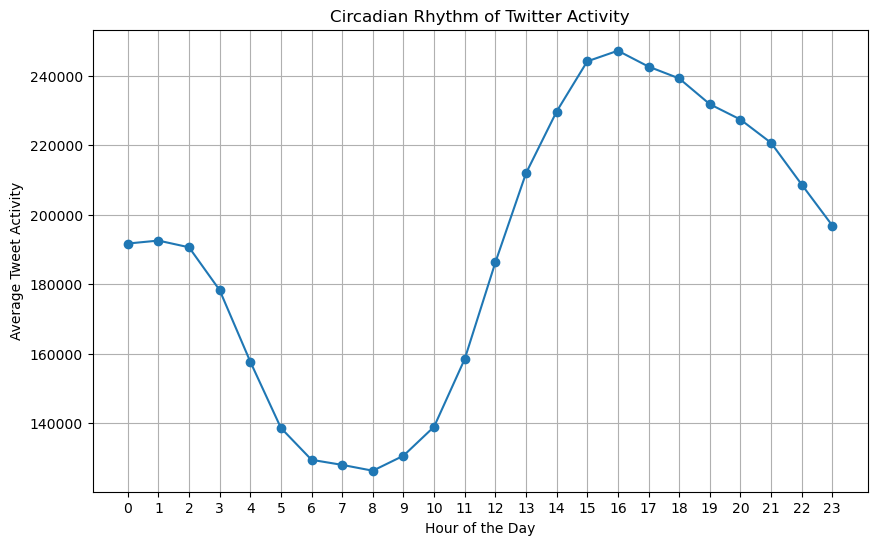

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("jobs__sleepwalk.csv")

# Convert UTC timestamp to datetime format
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'], unit='ms')

# Convert UTC to GMT
data['gmt_timestamp'] = data['utc_timestamp'].dt.tz_localize('UTC').dt.tz_convert('GMT')

# Extract hour of the day from the timestamp
data['hour_of_day'] = data['gmt_timestamp'].dt.hour

# Group data by hour of the day and calculate average tweet activity
average_activity = data.groupby('hour_of_day').size().reset_index(name='average_activity')

# Plot circadian rhythm
plt.figure(figsize=(10, 6))
plt.plot(average_activity['hour_of_day'], average_activity['average_activity'], marker='o', linestyle='-')
plt.title('Circadian Rhythm of Twitter Activity')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tweet Activity')
plt.xticks(range(24))
plt.grid(True)
plt.show()


In [35]:
import pycountry
def get_country(city):
    try:
        country_code = city.split(",")[-1].strip()  # Extract country code
        country = pycountry.countries.get(alpha_2=country_code)  # Find country by ISO code
        if country:
            return country.name
        else:
            return None  # Return original city if no match found
    except AttributeError:
        return None # Return original city if AttributeError occurs

# Apply the function to the 'City of Birth' column
data['country'] = data['location'].apply(get_country)

# Remove rows where the country of birth is None
data = data.dropna(subset=['country'])

# Drop the 'City of Birth' column if needed
data.drop(columns=['location'], inplace=True)

# Print the modified DataFrame
print(data)

        characteristic           utc_timestamp  \
651                ceo 2020-01-01 10:07:39.660   
660                ceo 2020-01-01 11:12:48.658   
728                ceo 2020-01-01 19:21:55.662   
743                ceo 2020-01-01 20:25:00.659   
748                ceo 2020-01-01 20:35:11.665   
...                ...                     ...   
4547541       youtuber 2021-01-01 02:24:04.663   
4547594       youtuber 2021-01-01 03:46:46.662   
4547620       youtuber 2021-01-01 04:38:52.662   
4547652       youtuber 2021-01-01 05:16:01.663   
4547706       youtuber 2021-01-01 06:25:23.660   

                                user_hash                    gmt_timestamp  \
651      e275558ca07d1abd59ee4294cd1bdc9b 2020-01-01 10:07:39.660000+00:00   
660      e275558ca07d1abd59ee4294cd1bdc9b 2020-01-01 11:12:48.658000+00:00   
728      fdf15eeefac4faf5a2ad8afd921405c8 2020-01-01 19:21:55.662000+00:00   
743      e275558ca07d1abd59ee4294cd1bdc9b 2020-01-01 20:25:00.659000+00:00   
748      

C:\Users\saiab\AppData\Local\Temp\ipykernel_22748\3493427491.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['location'], inplace=True)


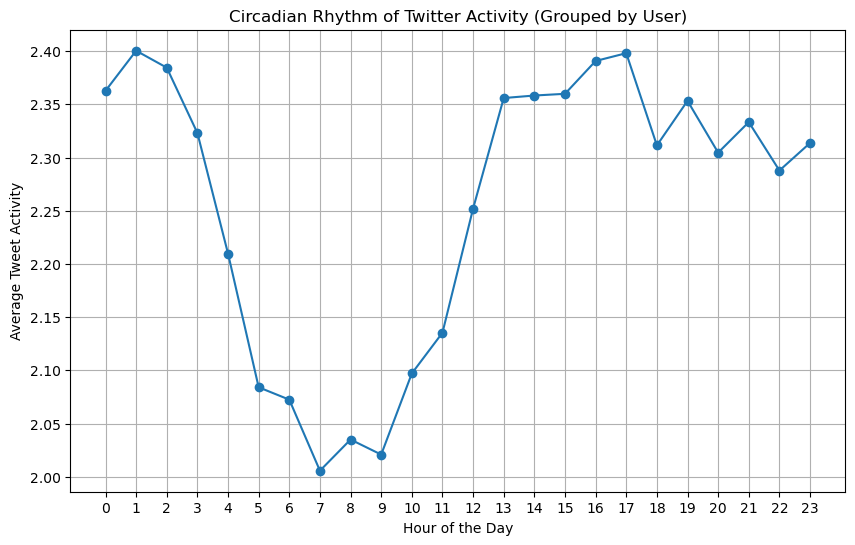

In [36]:
# Group data by user hash and hour of the day, then count tweet activity
grouped_data = data.groupby(['user_hash', 'hour_of_day']).size().reset_index(name='tweet_count')

# Calculate average tweet activity for each hour of the day across all users
average_activity = grouped_data.groupby('hour_of_day')['tweet_count'].mean().reset_index(name='average_activity')

# Plot circadian rhythm
plt.figure(figsize=(10, 6))
plt.plot(average_activity['hour_of_day'], average_activity['average_activity'], marker='o', linestyle='-')
plt.title('Circadian Rhythm of Twitter Activity (Grouped by User)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tweet Activity')
plt.xticks(range(24))
plt.grid(True)
plt.show()

C:\Users\saiab\AppData\Local\Temp\ipykernel_22748\939078628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'], unit='ms')  # Assuming timestamp is in milliseconds
C:\Users\saiab\AppData\Local\Temp\ipykernel_22748\939078628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['utc_timestamp'].dt.date
C:\Users\saiab\AppData\Local\Temp\ipykernel_22748\939078628.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy

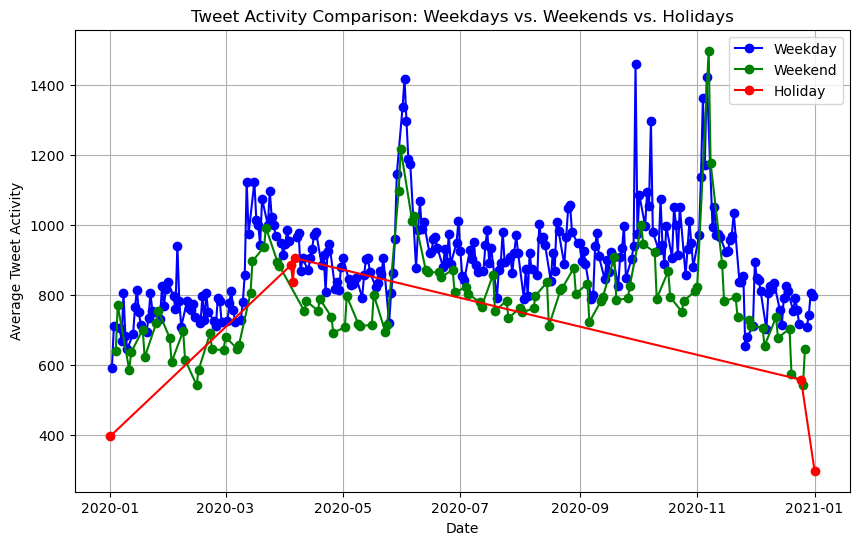

In [38]:
# Convert UTC timestamp to datetime format
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'], unit='ms')  # Assuming timestamp is in milliseconds

# Extract date from the timestamp
data['date'] = data['utc_timestamp'].dt.date

# Define a function to identify weekends
def is_weekend(date):
    return date.weekday() >= 5  # Saturday and Sunday have weekday indices 5 and 6

# Define a function to identify holidays (you may need to adjust this based on your dataset)
def is_holiday(date):
    holidays = {
        'New Year': [(1, 1)],
        'Easter': [(4, 4), (4, 5), (4, 6)],  # Assuming Easter falls on these dates
        'Christmas': [(12, 25)],
        # Add more holidays as needed
    }
    
    # Check if the date matches any holiday
    for holiday, dates in holidays.items():
        for holiday_date in dates:
            if (date.month, date.day) == holiday_date:
                return True
    
    return False

# Apply the functions to create new columns indicating weekends and holidays
data['is_weekend'] = data['date'].apply(is_weekend)
data['is_holiday'] = data['date'].apply(is_holiday)

# Group data by date and calculate average tweet activity for weekends, weekdays, and holidays
average_activity = data.groupby(['date', 'is_weekend', 'is_holiday']).size().reset_index(name='tweet_count')
average_activity['day_type'] = 'Weekday'
average_activity.loc[average_activity['is_weekend'], 'day_type'] = 'Weekend'
average_activity.loc[average_activity['is_holiday'], 'day_type'] = 'Holiday'
average_activity = average_activity.groupby(['day_type', 'date'])['tweet_count'].mean().reset_index()

# Plot tweet activity for weekdays, weekends, and holidays
plt.figure(figsize=(10, 6))
for day_type, color in zip(['Weekday', 'Weekend', 'Holiday'], ['blue', 'green', 'red']):
    plt.plot(average_activity[average_activity['day_type'] == day_type]['date'],
             average_activity[average_activity['day_type'] == day_type]['tweet_count'],
             label=day_type, color=color, marker='o', linestyle='-')
plt.title('Tweet Activity Comparison: Weekdays vs. Weekends vs. Holidays')
plt.xlabel('Date')
plt.ylabel('Average Tweet Activity')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
print(data)

        characteristic           utc_timestamp  \
651                ceo 2020-01-01 10:07:39.660   
660                ceo 2020-01-01 11:12:48.658   
728                ceo 2020-01-01 19:21:55.662   
743                ceo 2020-01-01 20:25:00.659   
748                ceo 2020-01-01 20:35:11.665   
...                ...                     ...   
4547541       youtuber 2021-01-01 02:24:04.663   
4547594       youtuber 2021-01-01 03:46:46.662   
4547620       youtuber 2021-01-01 04:38:52.662   
4547652       youtuber 2021-01-01 05:16:01.663   
4547706       youtuber 2021-01-01 06:25:23.660   

                                user_hash                    gmt_timestamp  \
651      e275558ca07d1abd59ee4294cd1bdc9b 2020-01-01 10:07:39.660000+00:00   
660      e275558ca07d1abd59ee4294cd1bdc9b 2020-01-01 11:12:48.658000+00:00   
728      fdf15eeefac4faf5a2ad8afd921405c8 2020-01-01 19:21:55.662000+00:00   
743      e275558ca07d1abd59ee4294cd1bdc9b 2020-01-01 20:25:00.659000+00:00   
748      

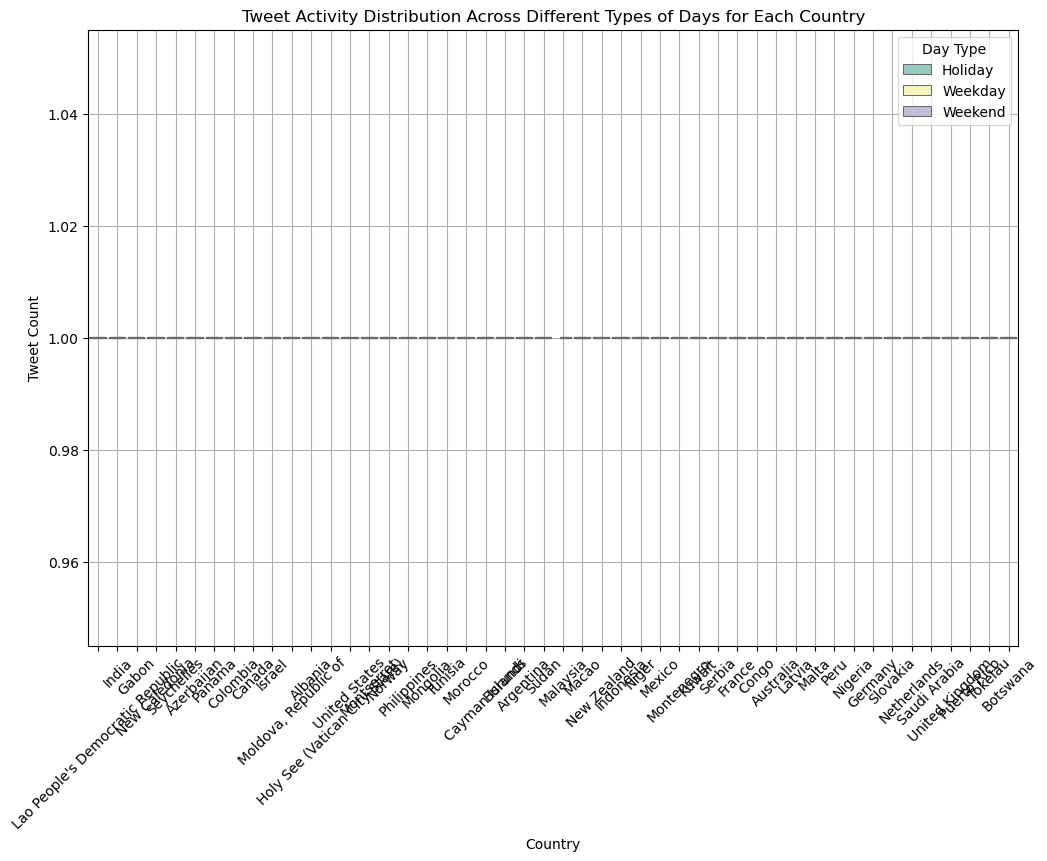

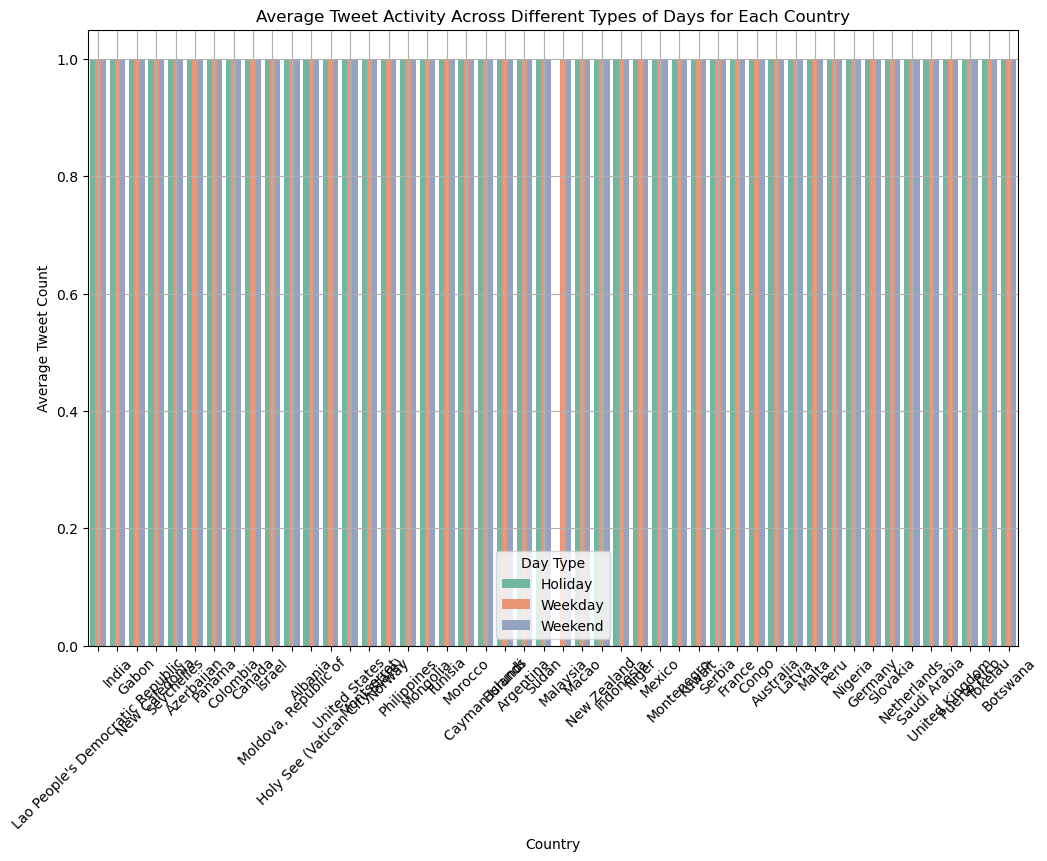

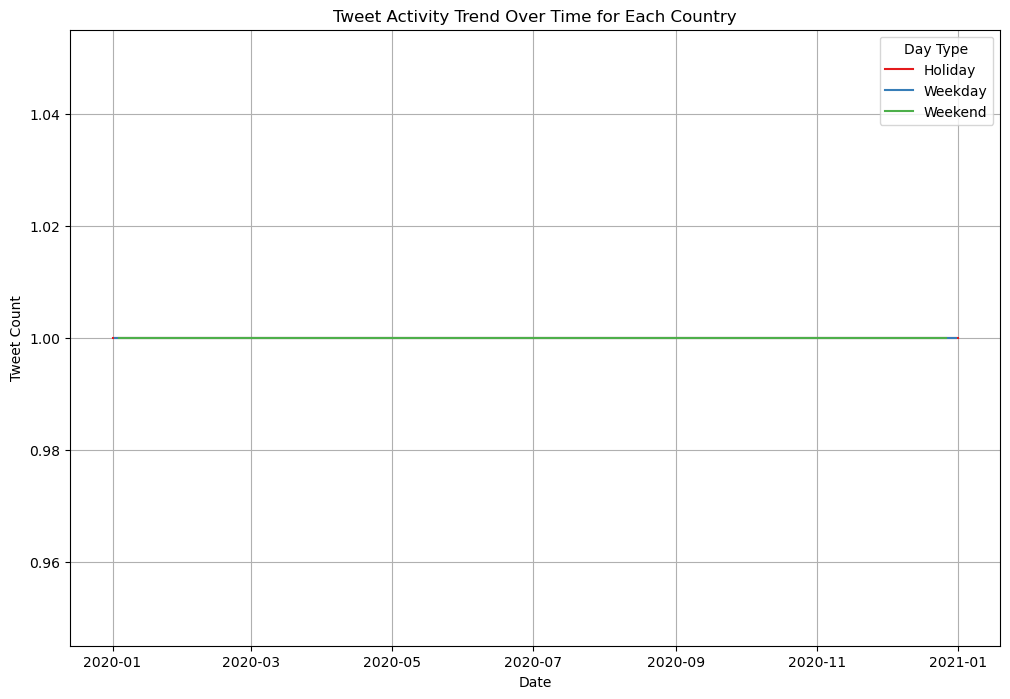

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# data = pd.read_csv("your_data.csv")

# Assuming each row represents one tweet, create a tweet_count column with value 1 for each tweet
data['tweet_count'] = 1

# Update the list of countries based on the unique values in the 'country' column
target_countries = data['country'].unique()

# Define additional international holidays
additional_holidays = {
    'International Workers\' Day': [(5, 1)],  # Labour Day
    'International Women\'s Day': [(3, 8)],   # Women's Day
    # Add more international holidays as needed
}

# Update the is_holiday function to include additional holidays
def is_holiday(date):
    holidays = {
        'New Year': [(1, 1)],
        'Easter': [(4, 4), (4, 5), (4, 6)],  # Assuming Easter falls on these dates
        'Christmas': [(12, 25)],
        # Add more holidays as needed
    }
    
    holidays.update(additional_holidays)
    
    # Check if the date matches any holiday
    for holiday, dates in holidays.items():
        for holiday_date in dates:
            if (date.month, date.day) == holiday_date:
                return True
    
    return False

# Convert UTC timestamp to datetime format
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'], unit='ms')  # Assuming timestamp is in milliseconds

# Extract date from the timestamp
data['date'] = data['utc_timestamp'].dt.date

# Define a function to identify weekends
def is_weekend(date):
    return date.weekday() >= 5  # Saturday and Sunday have weekday indices 5 and 6

# Apply the functions to create new columns indicating weekends and holidays
data['is_weekend'] = data['date'].apply(is_weekend)
data['is_holiday'] = data['date'].apply(is_holiday)

# Create the day_type column based on is_weekend and is_holiday
data['day_type'] = 'Weekday'
data.loc[data['is_weekend'], 'day_type'] = 'Weekend'
data.loc[data['is_holiday'], 'day_type'] = 'Holiday'

# Group data by country and sum tweet counts
country_tweet_counts = data.groupby('country')['tweet_count'].sum()

# Filter countries with tweet counts more than 100
target_countries = country_tweet_counts[country_tweet_counts > 100].index

# Filter the data to include only the specified countries
filtered_data = data[data['country'].isin(target_countries)]

# Plotting with seaborn

# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='tweet_count', hue='day_type', data=filtered_data, palette='Set3')
plt.title('Tweet Activity Distribution Across Different Types of Days for Each Country')
plt.xlabel('Country')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.legend(title='Day Type')
plt.grid(True)
plt.show()

# Barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='country', y='tweet_count', hue='day_type', data=filtered_data, palette='Set2')
plt.title('Average Tweet Activity Across Different Types of Days for Each Country')
plt.xlabel('Country')
plt.ylabel('Average Tweet Count')
plt.xticks(rotation=45)
plt.legend(title='Day Type')
plt.grid(True)
plt.show()

# Lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='tweet_count', hue='day_type', data=filtered_data, palette='Set1', ci=None)
plt.title('Tweet Activity Trend Over Time for Each Country')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend(title='Day Type')
plt.grid(True)
plt.show()


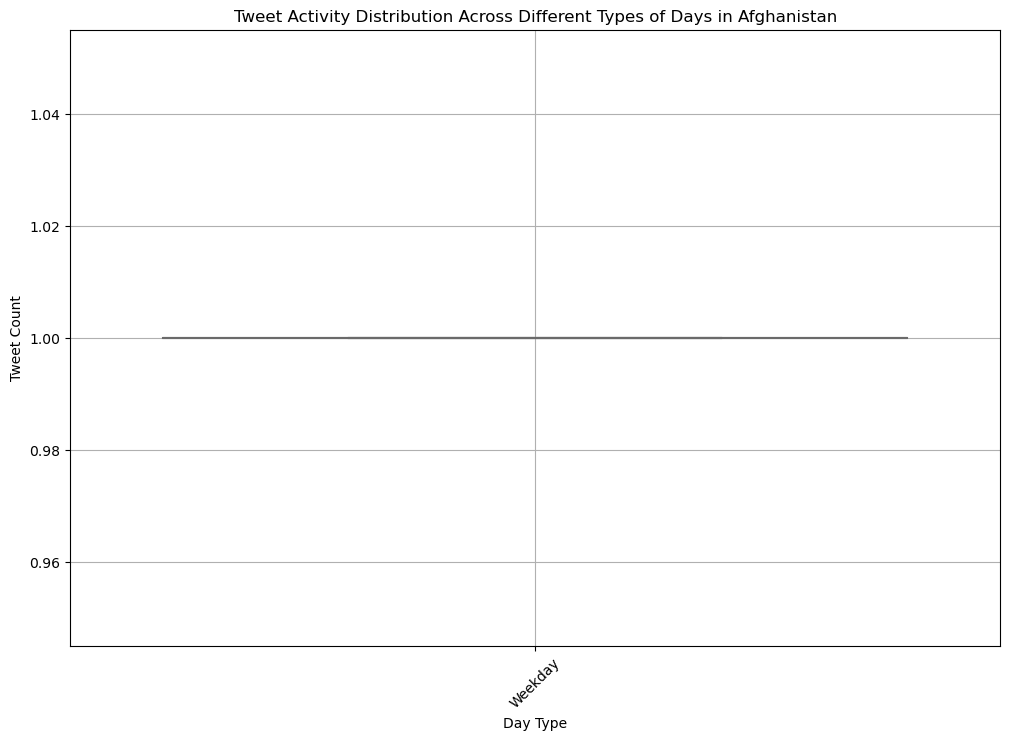

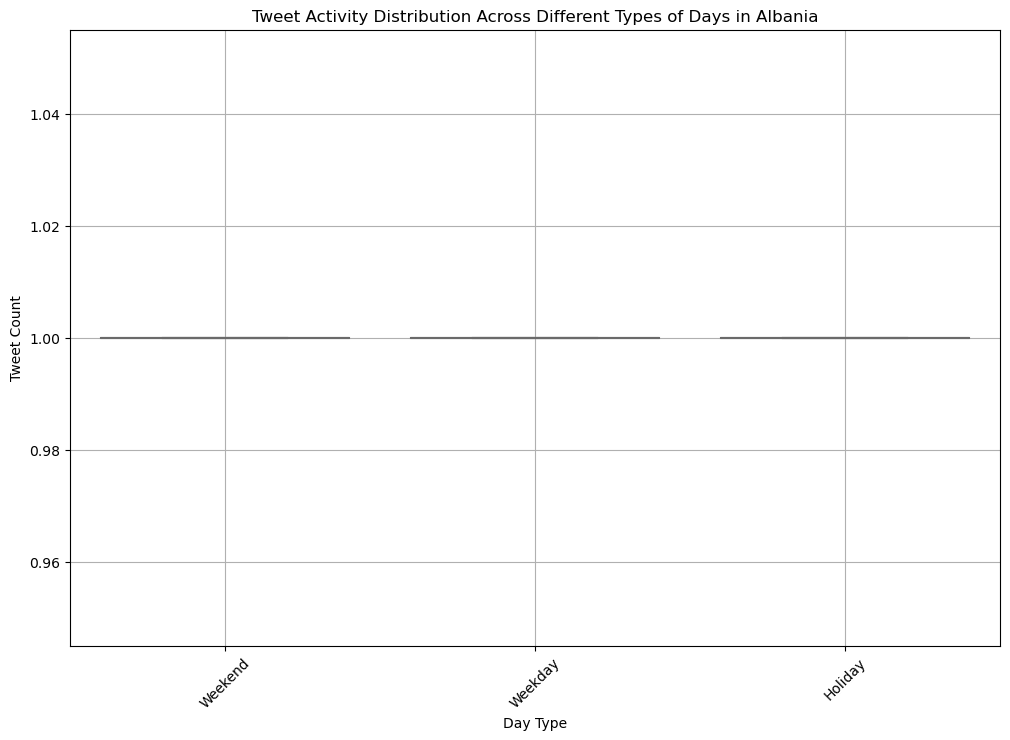

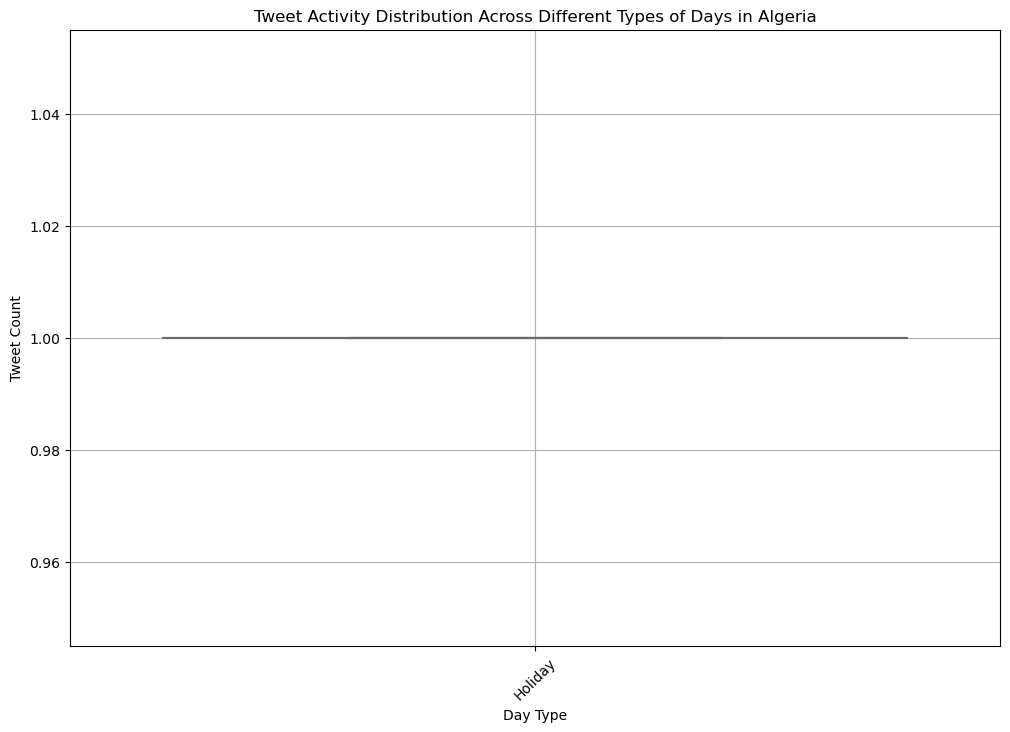

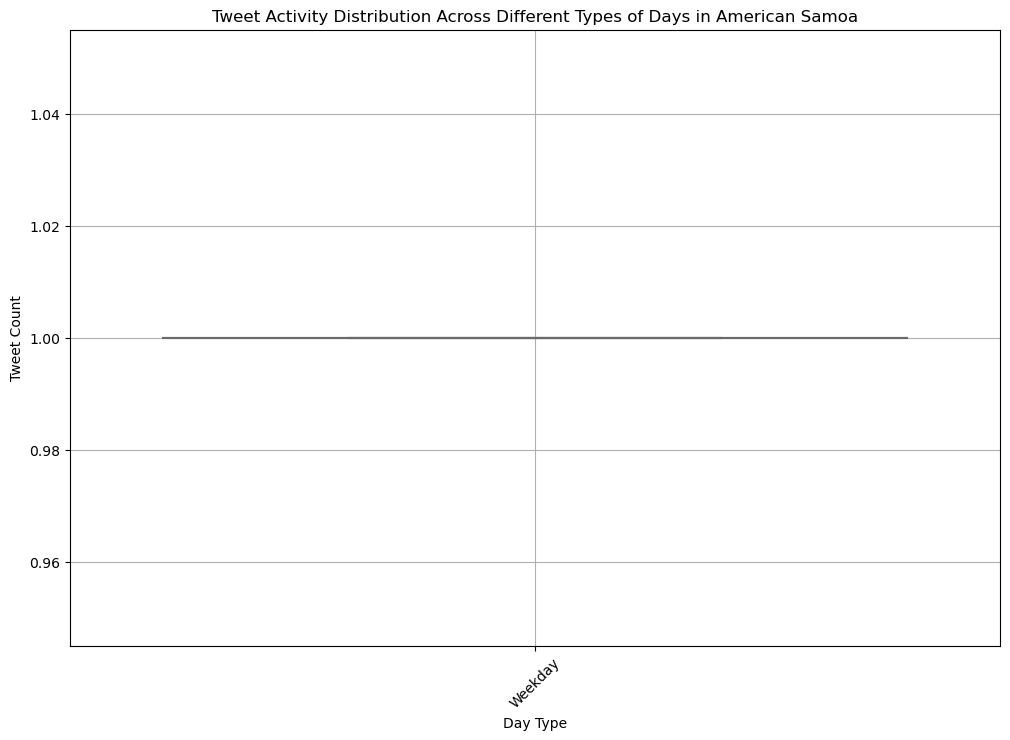

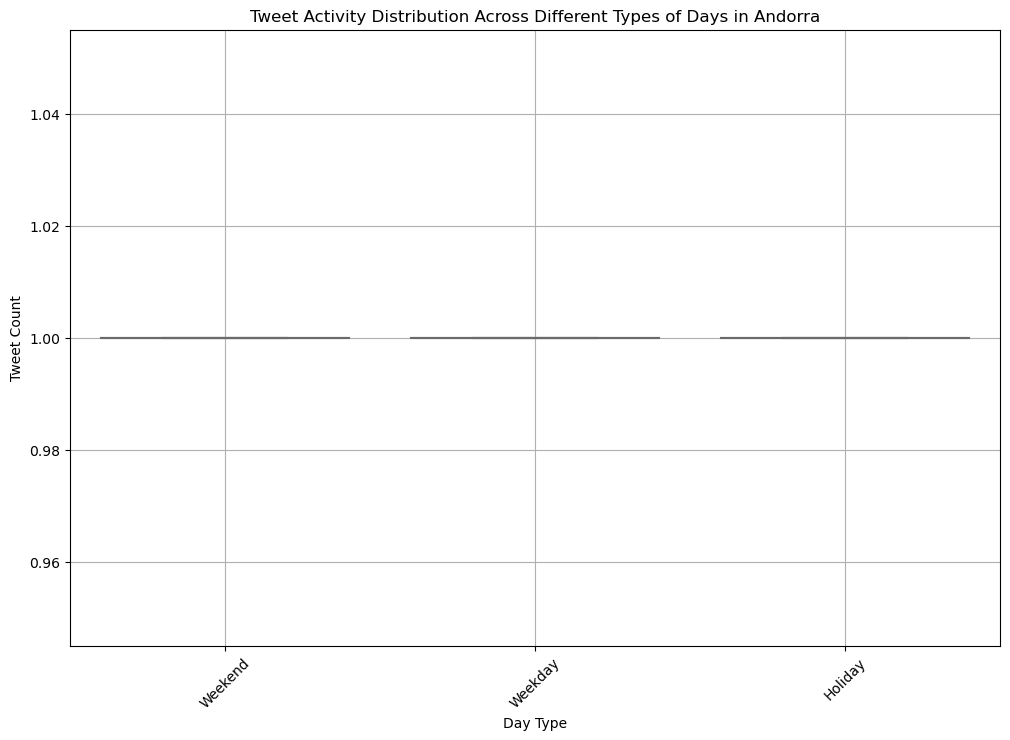

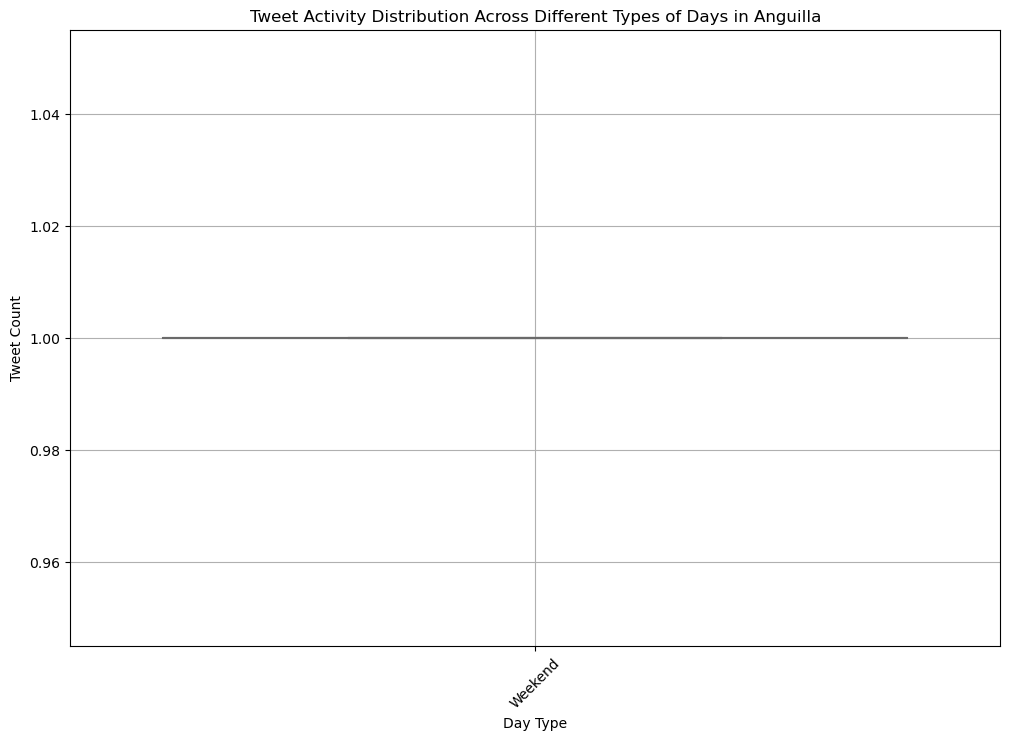

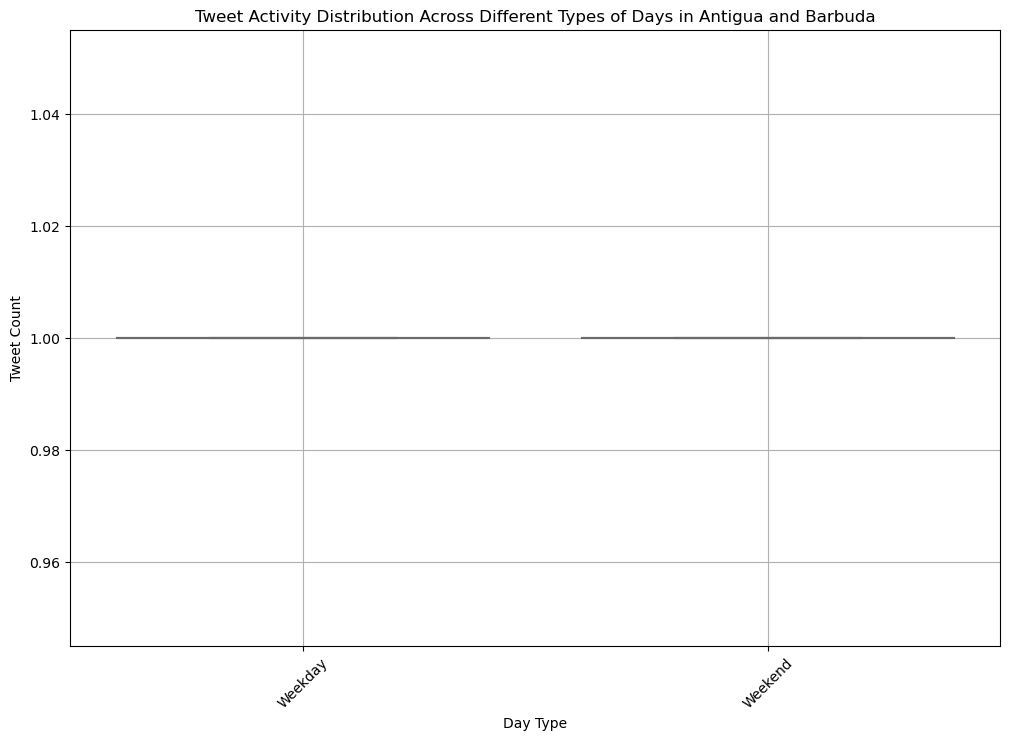

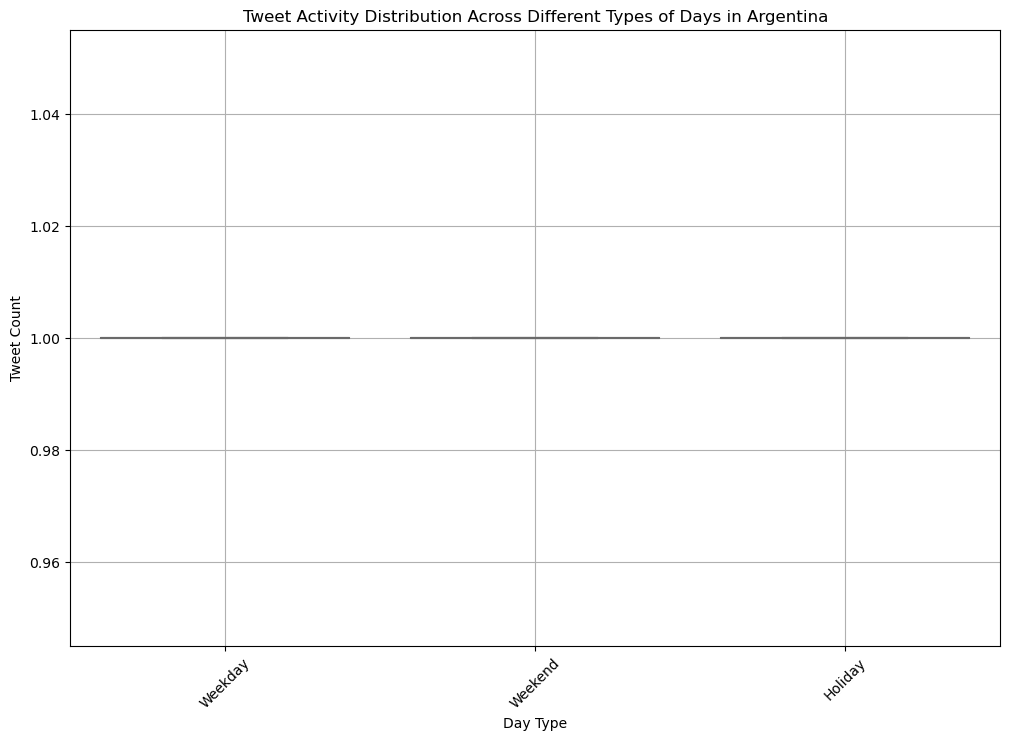

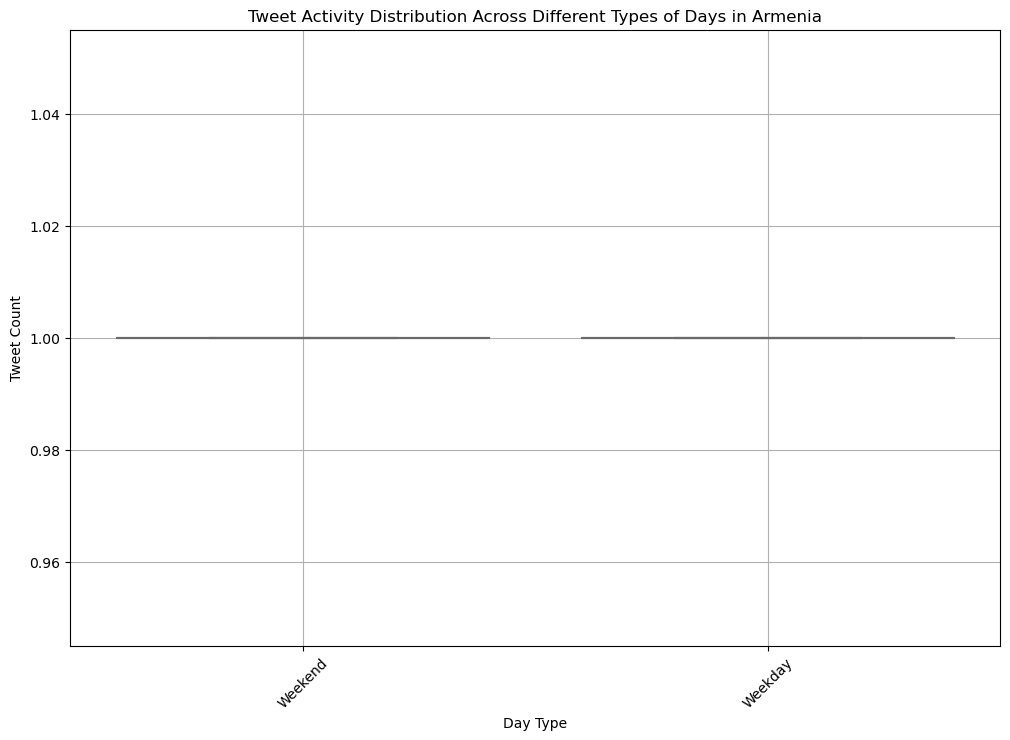

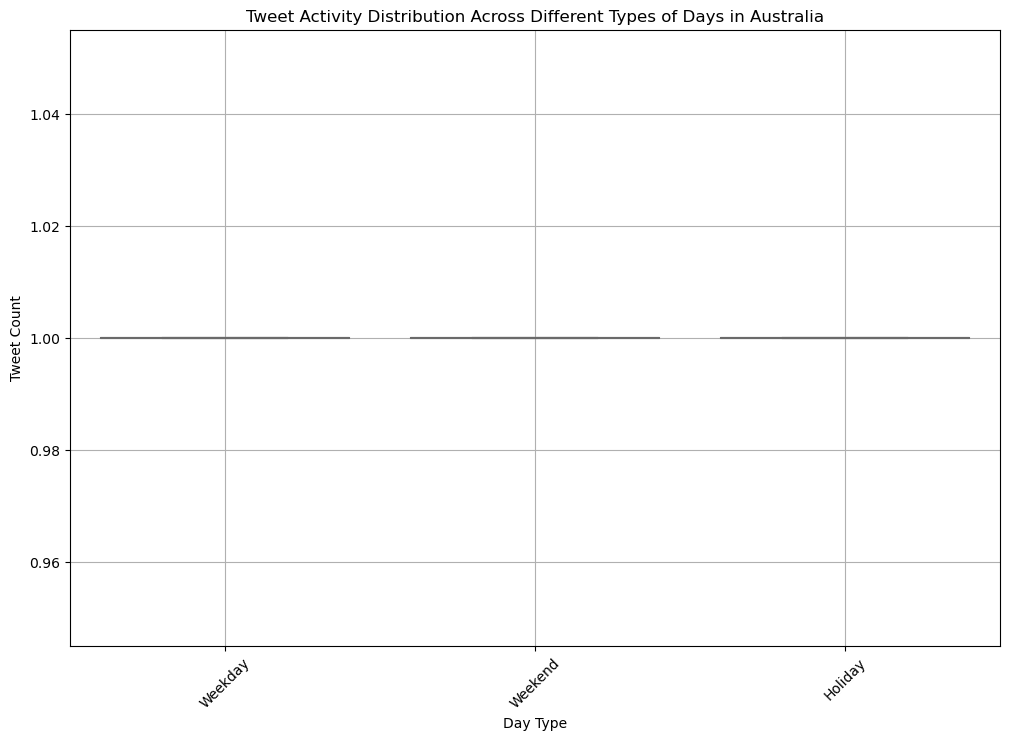

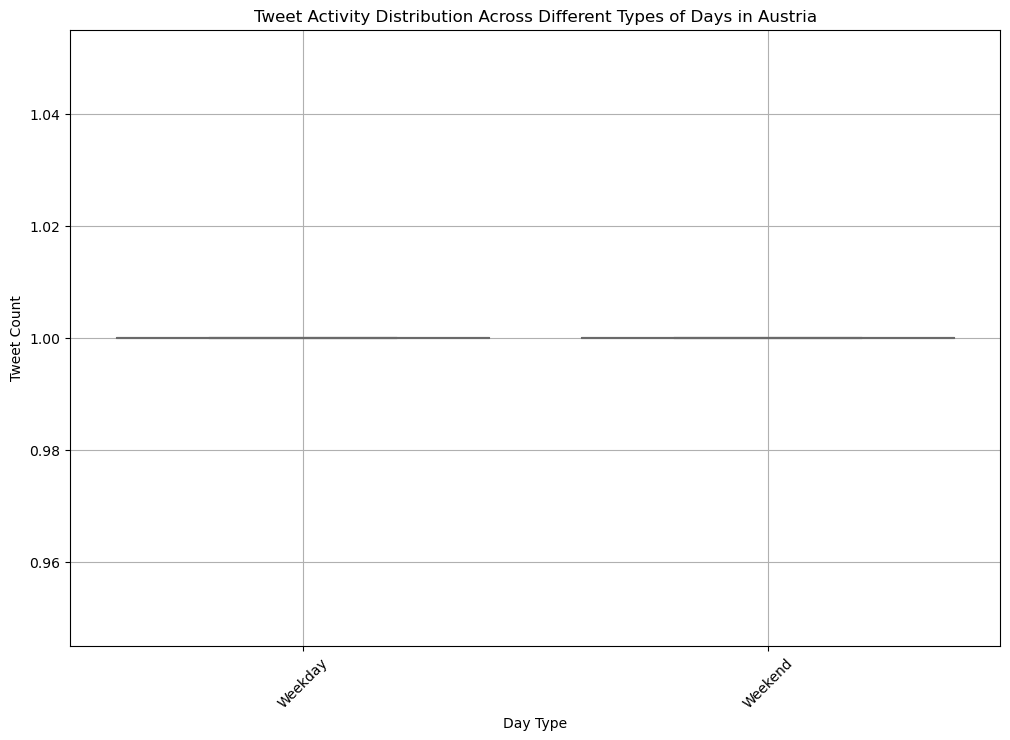

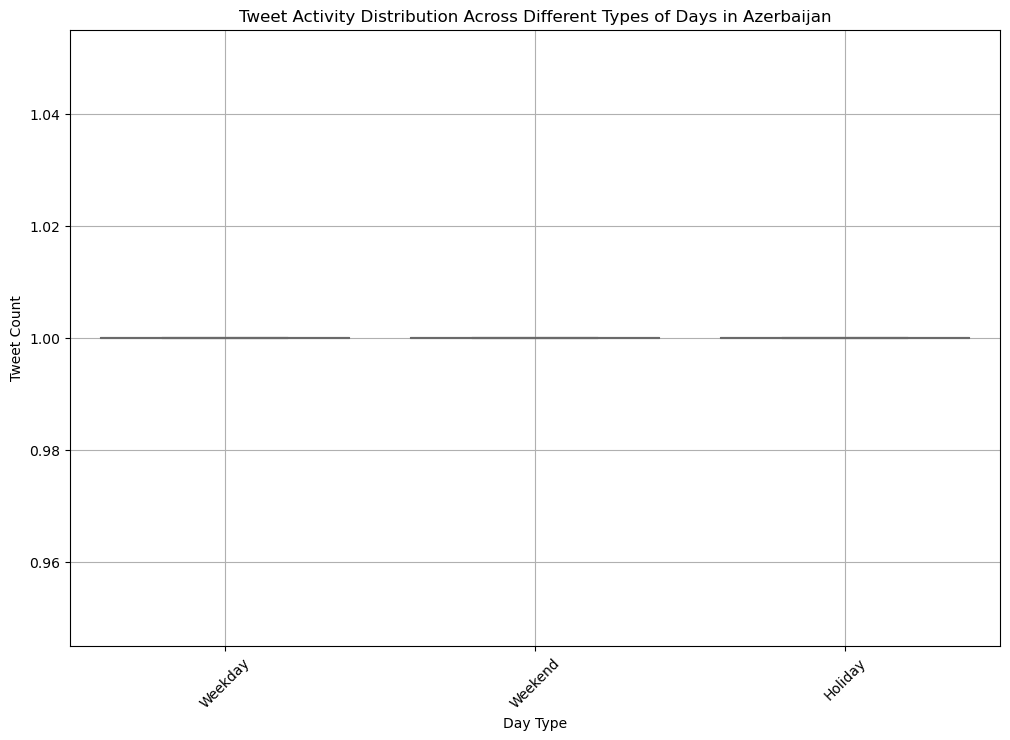

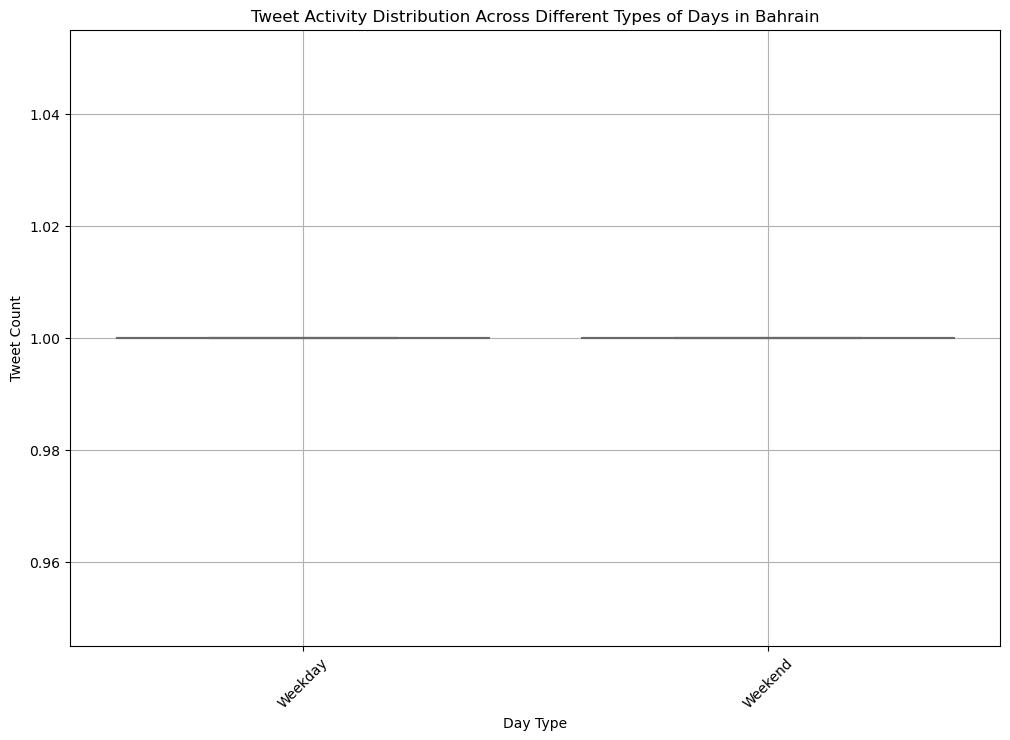

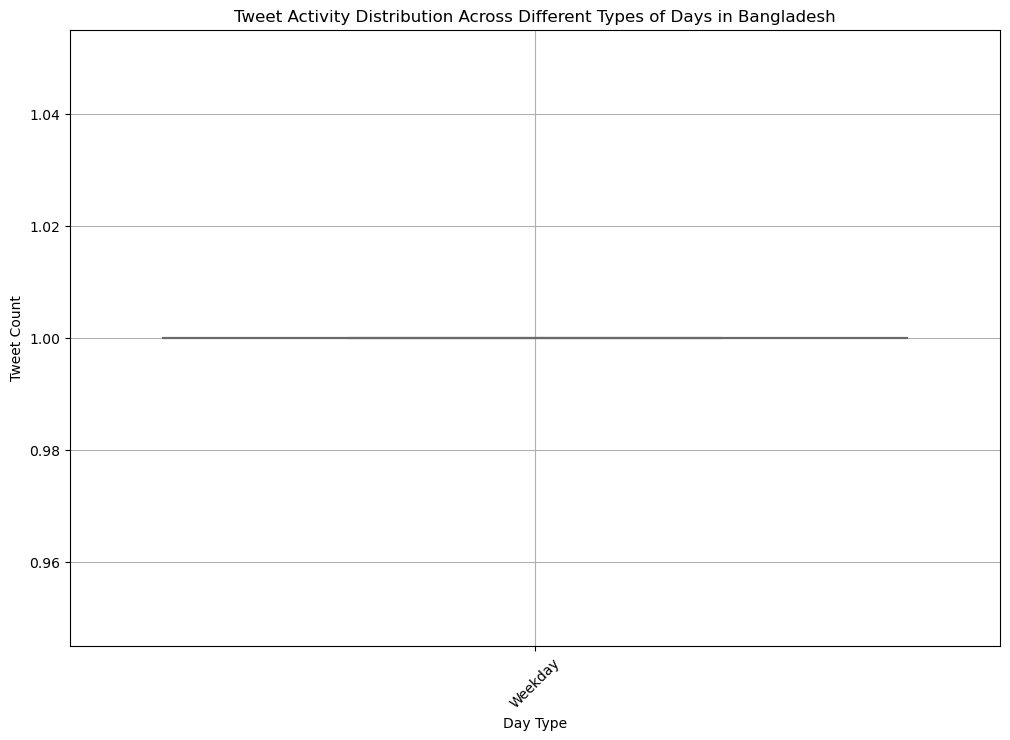

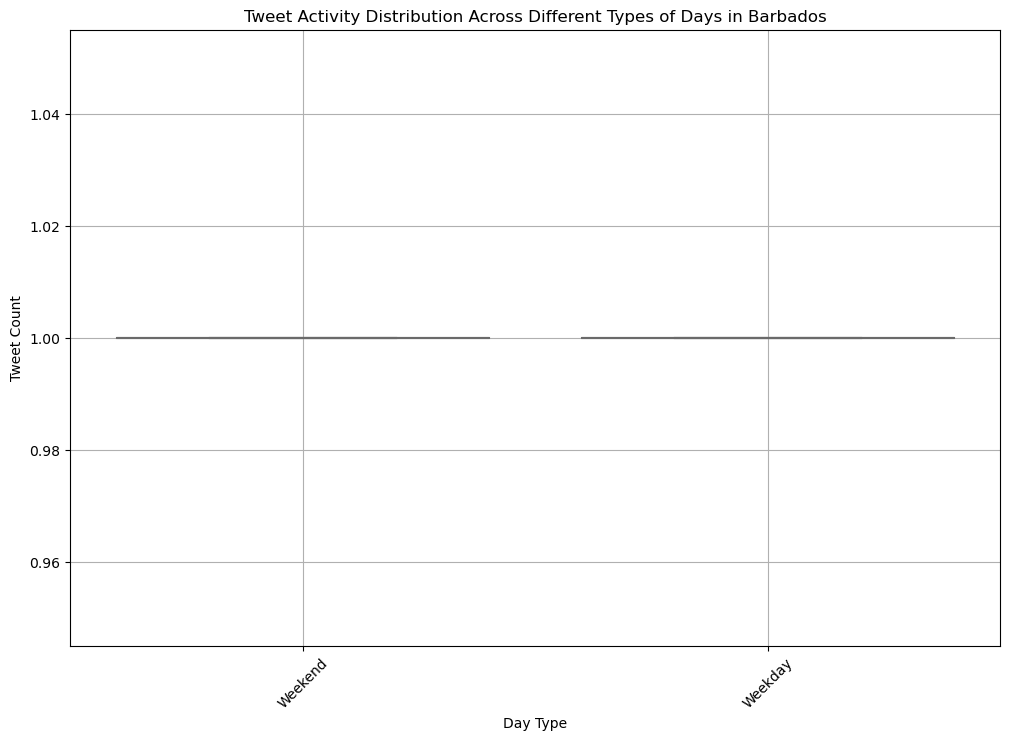

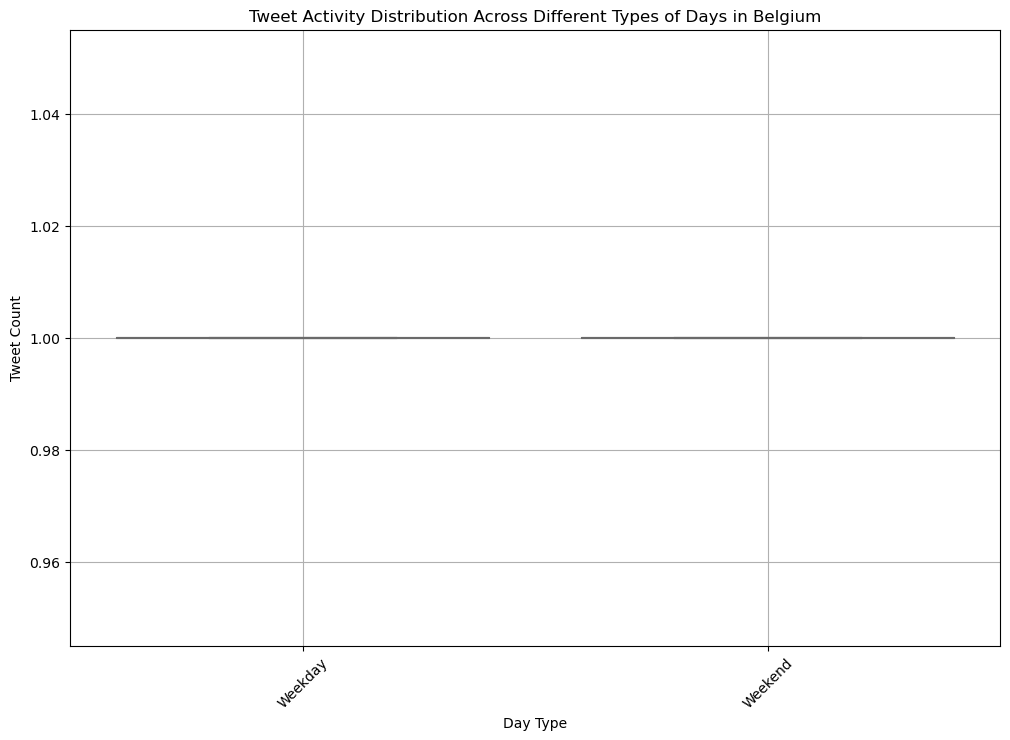

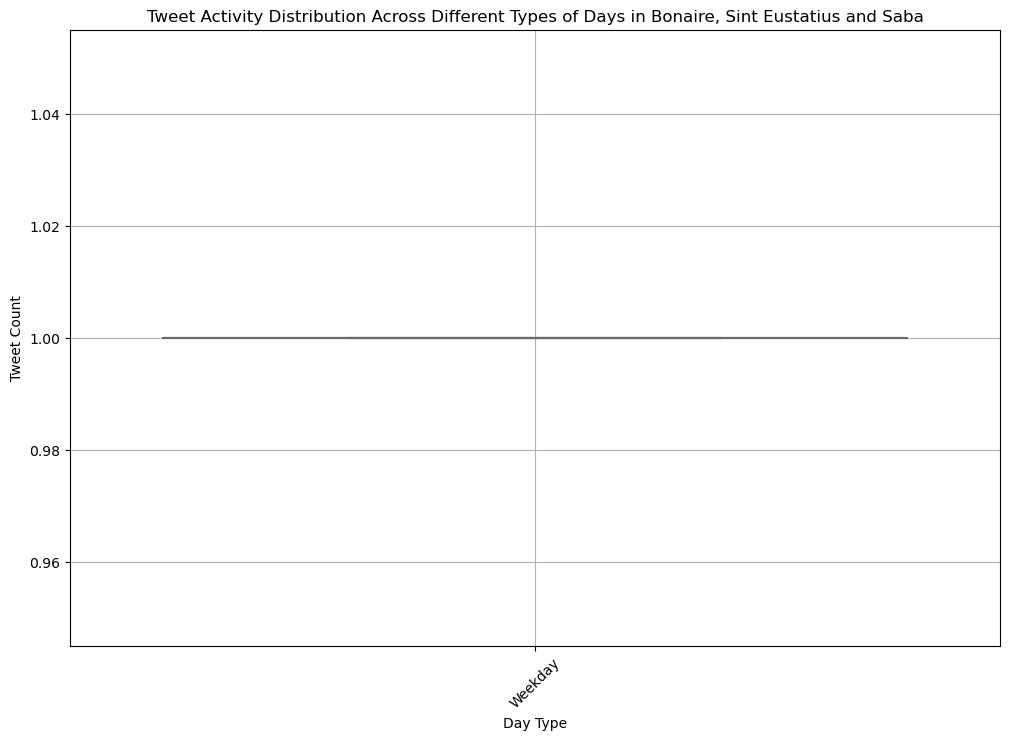

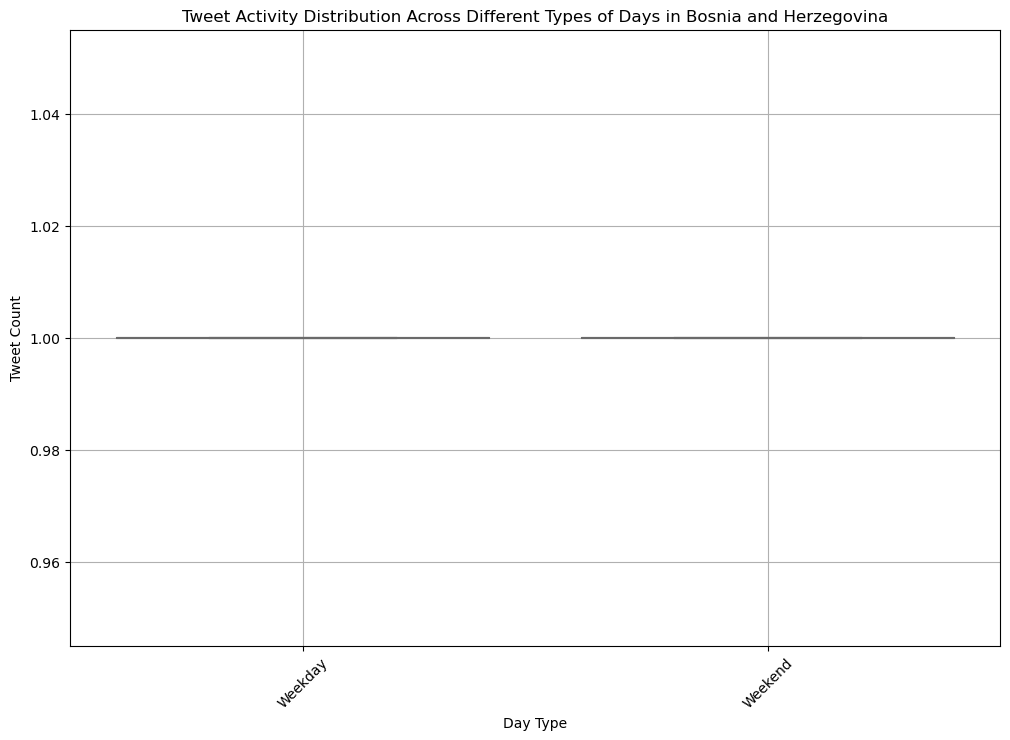

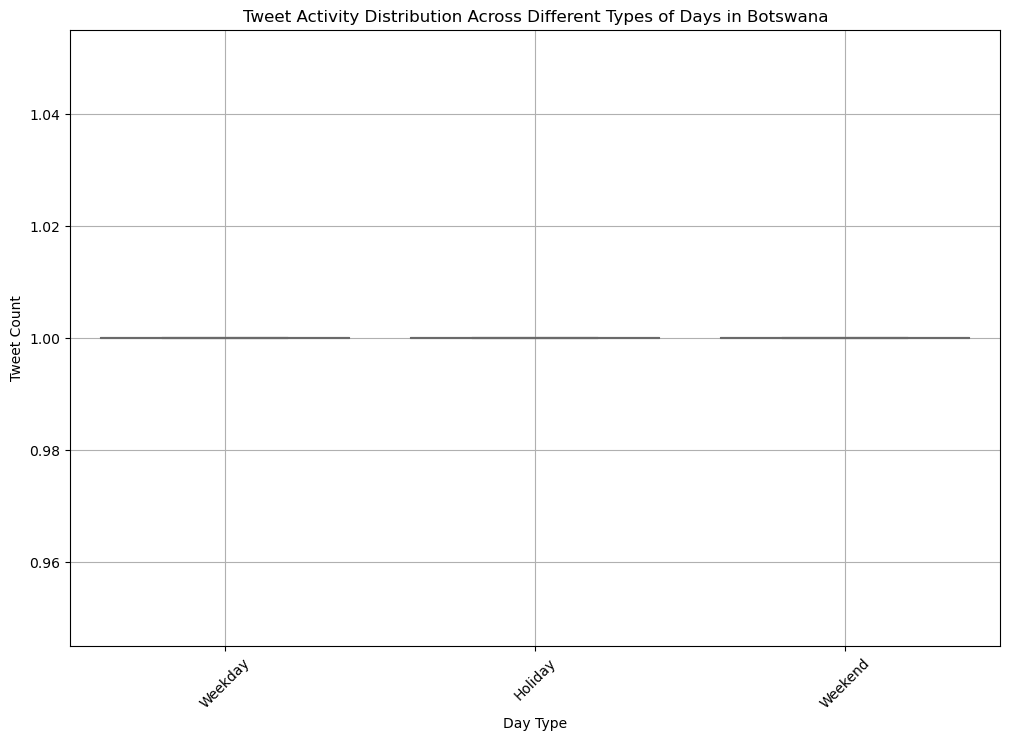

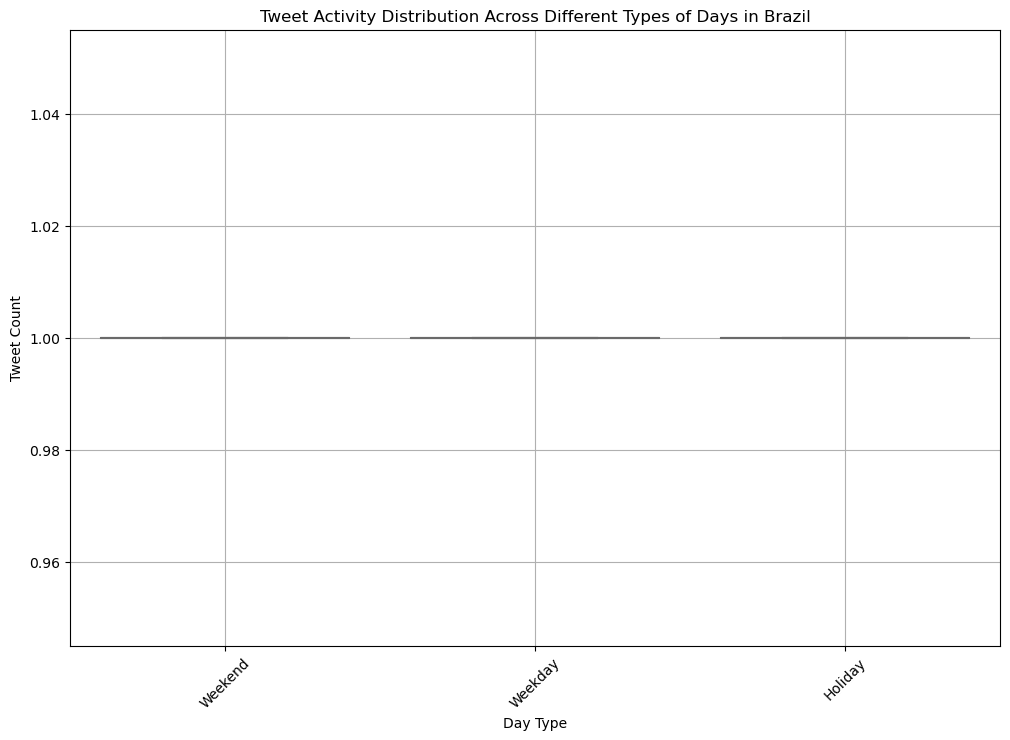

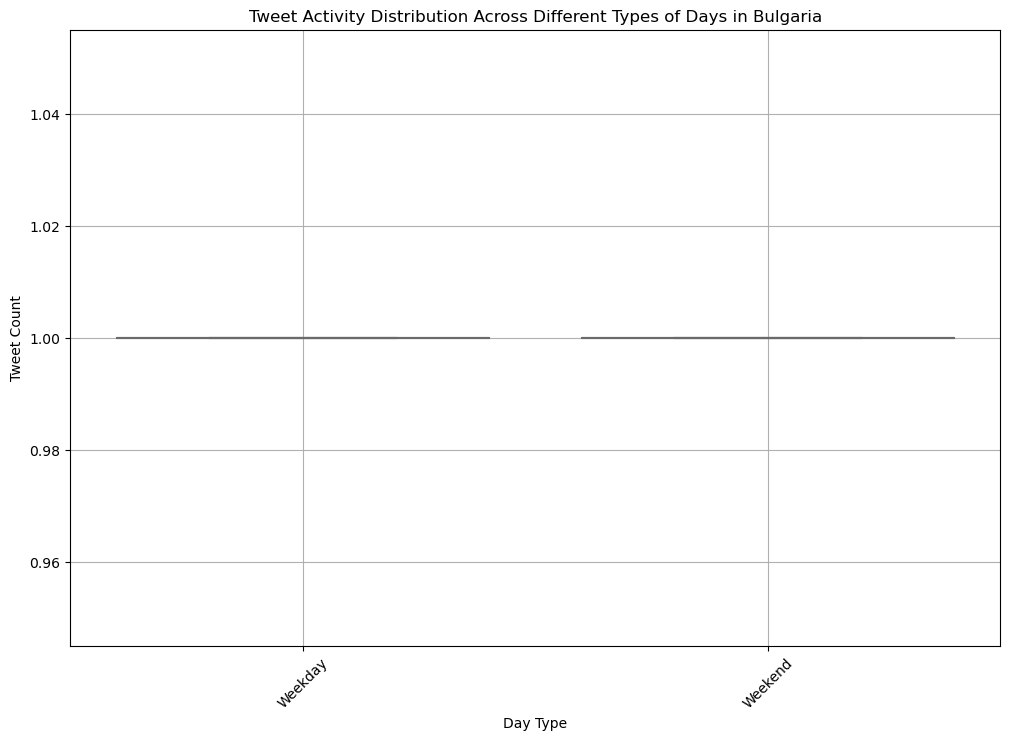

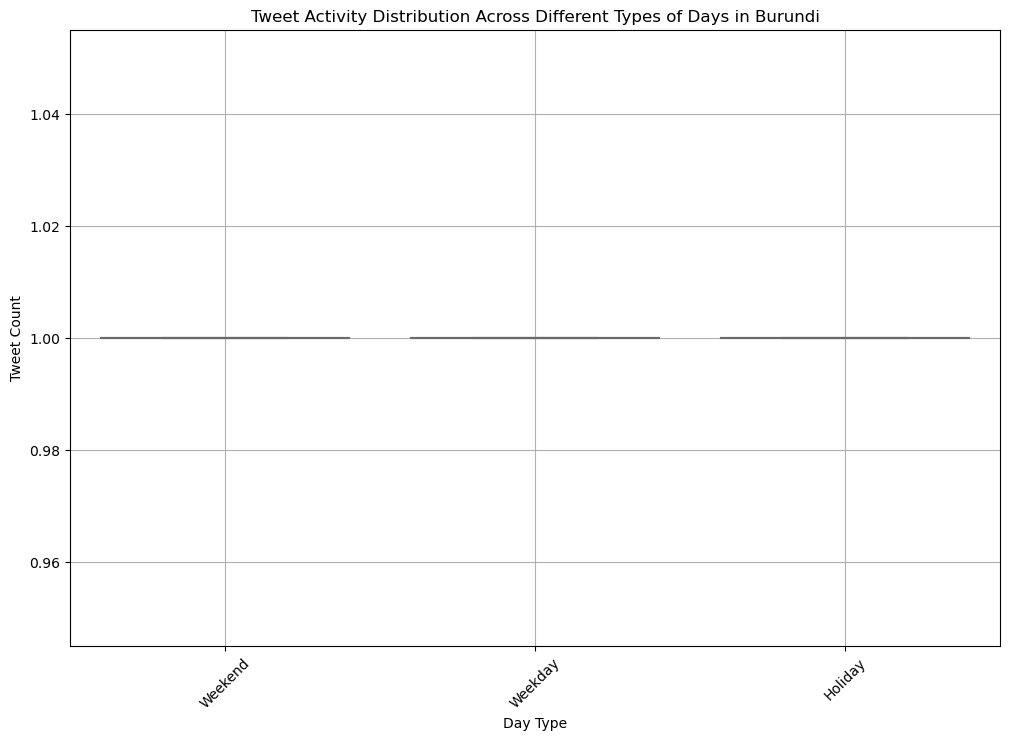

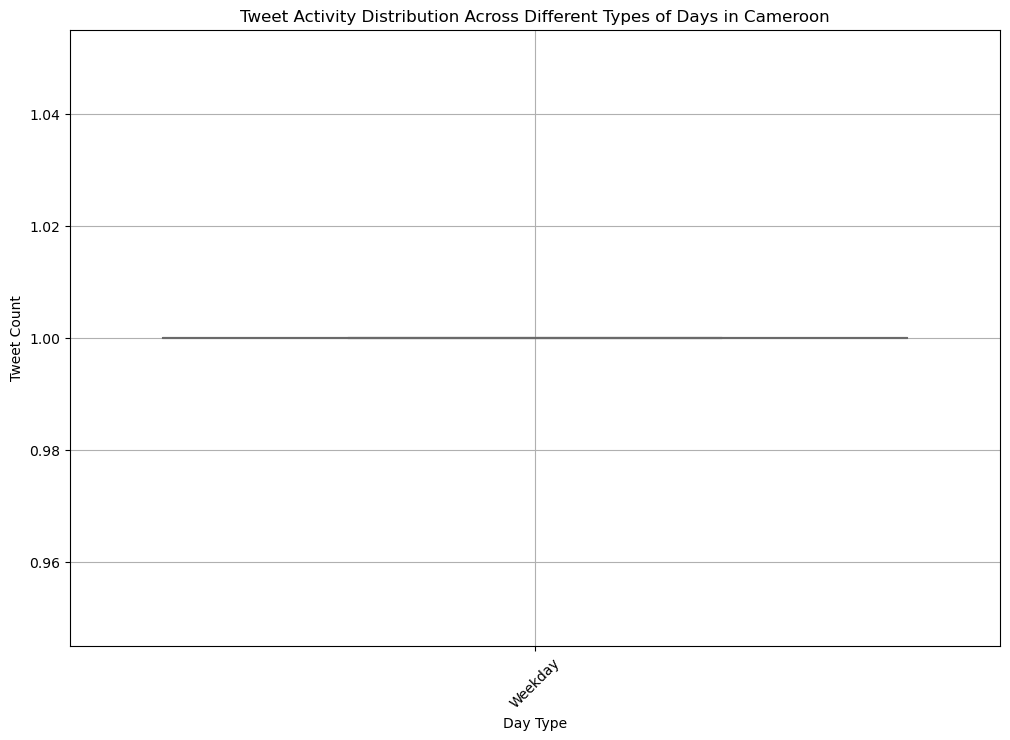

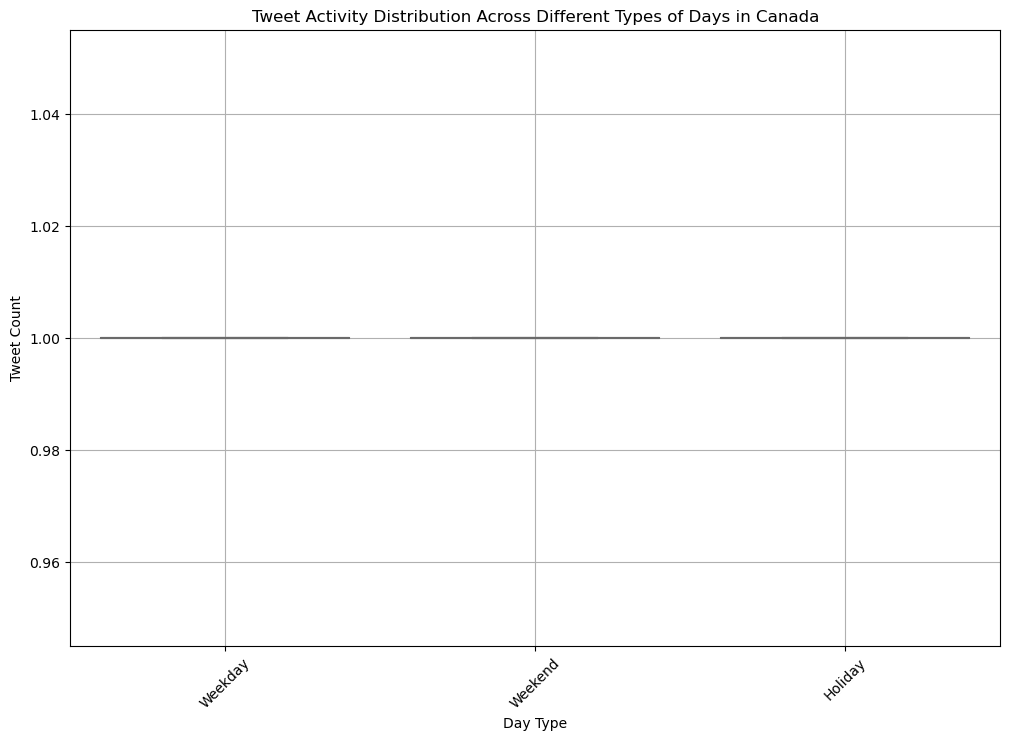

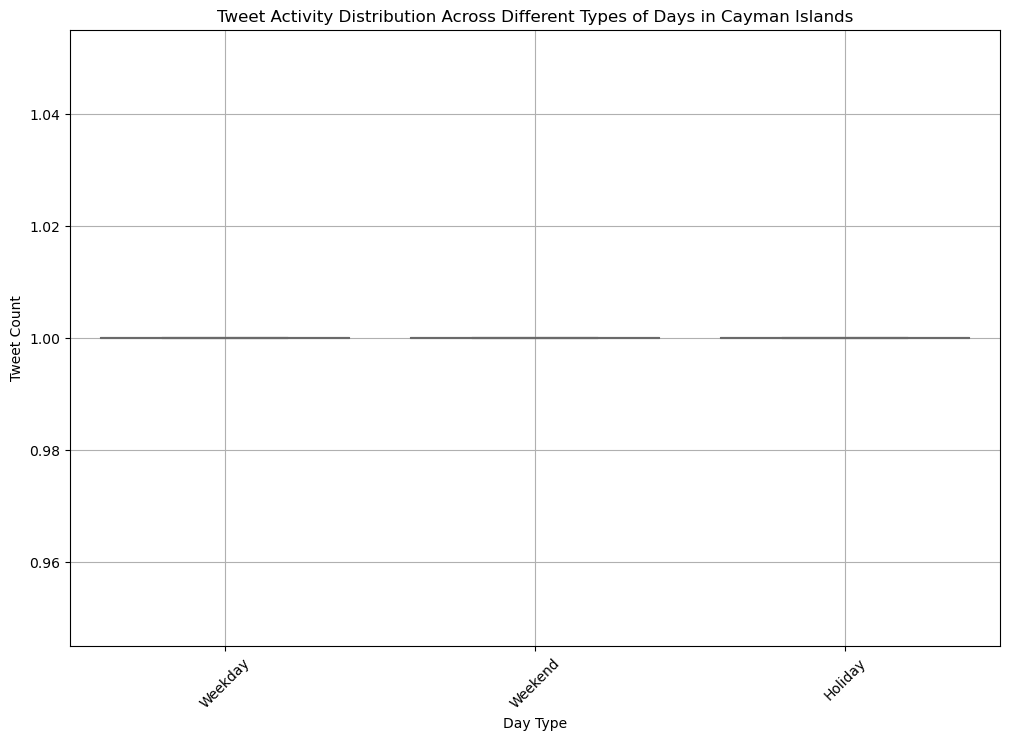

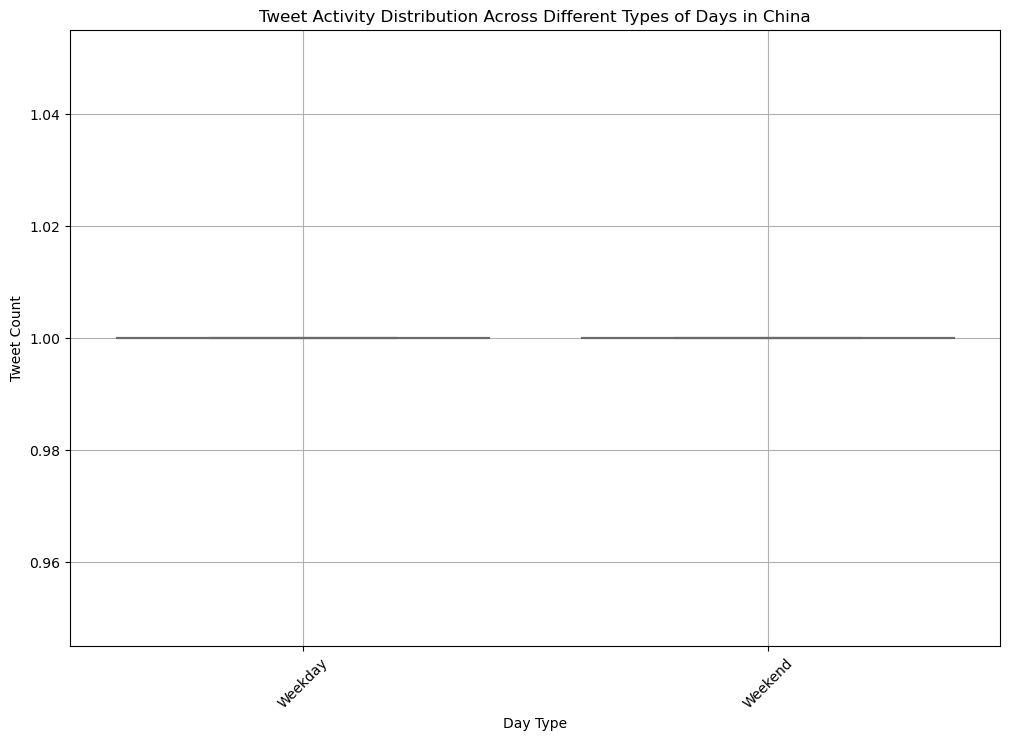

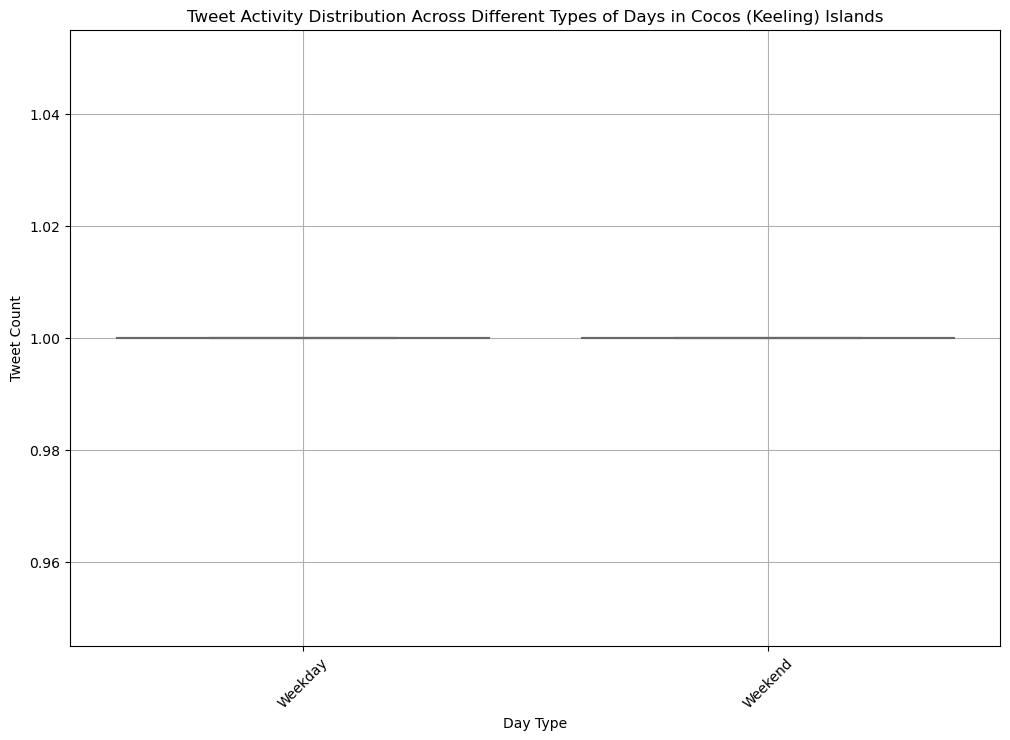

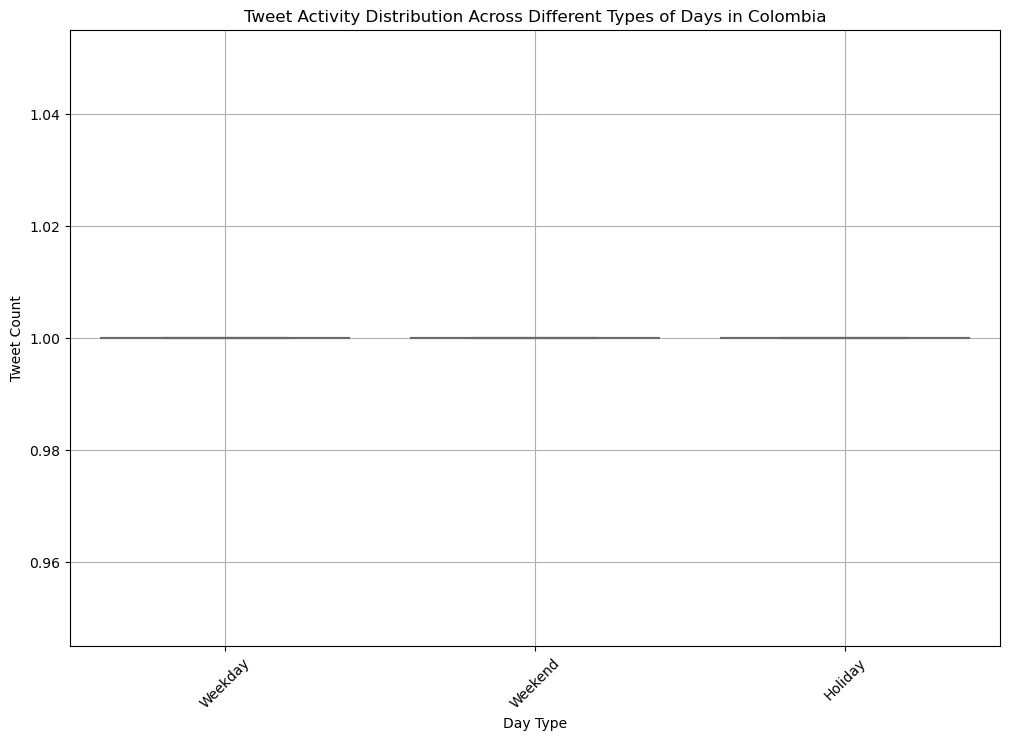

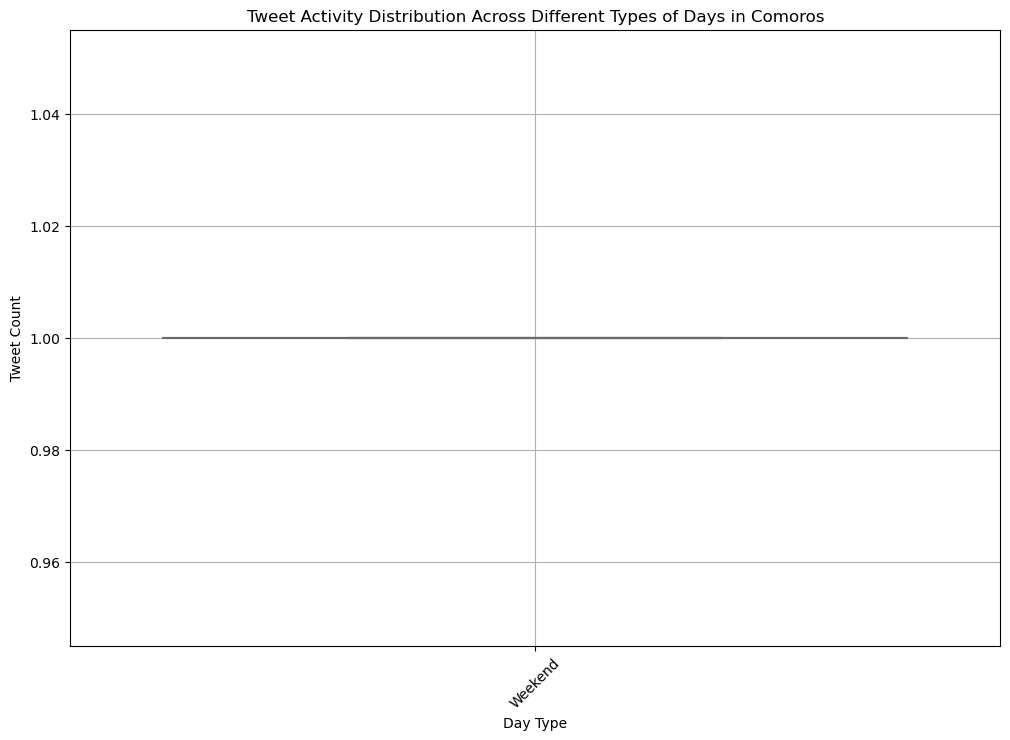

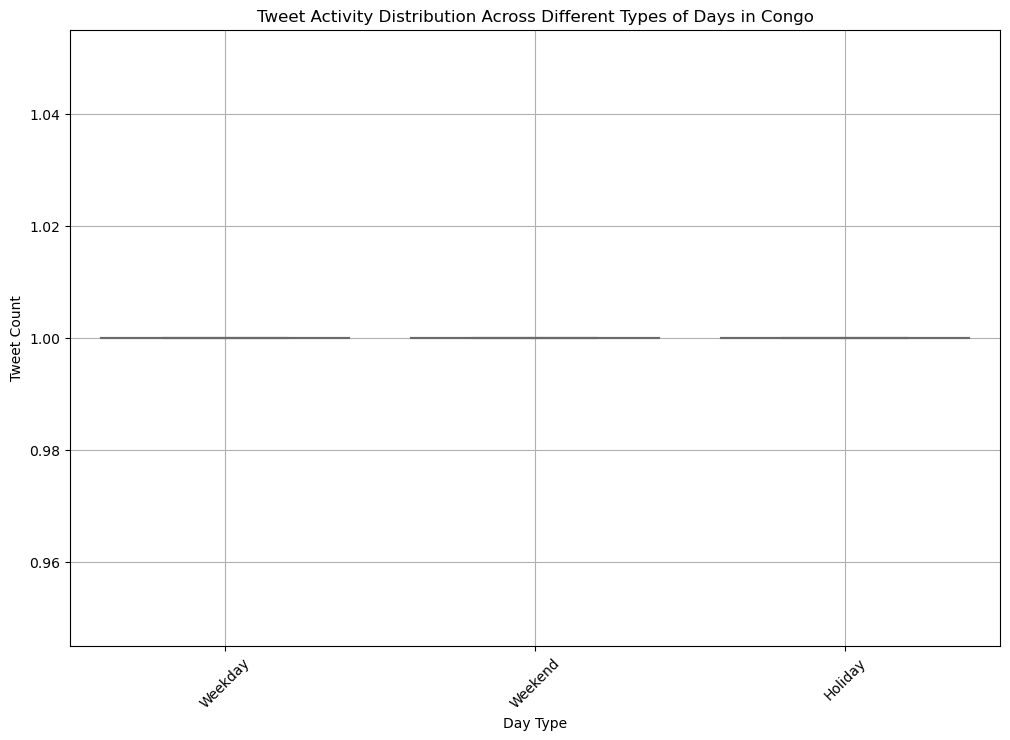

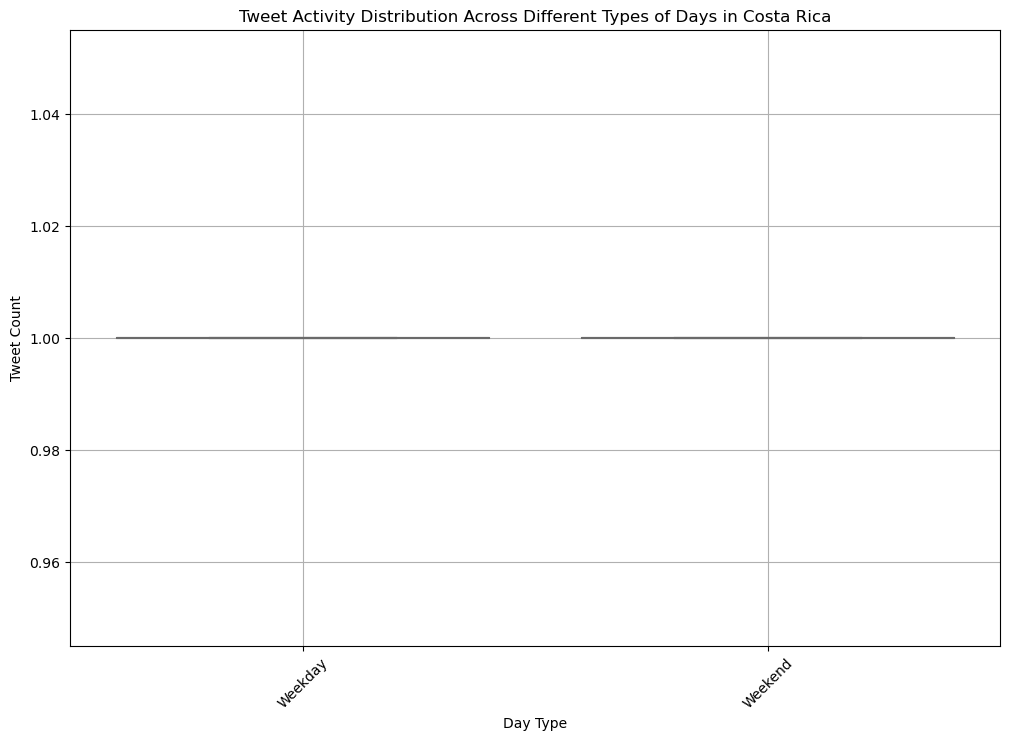

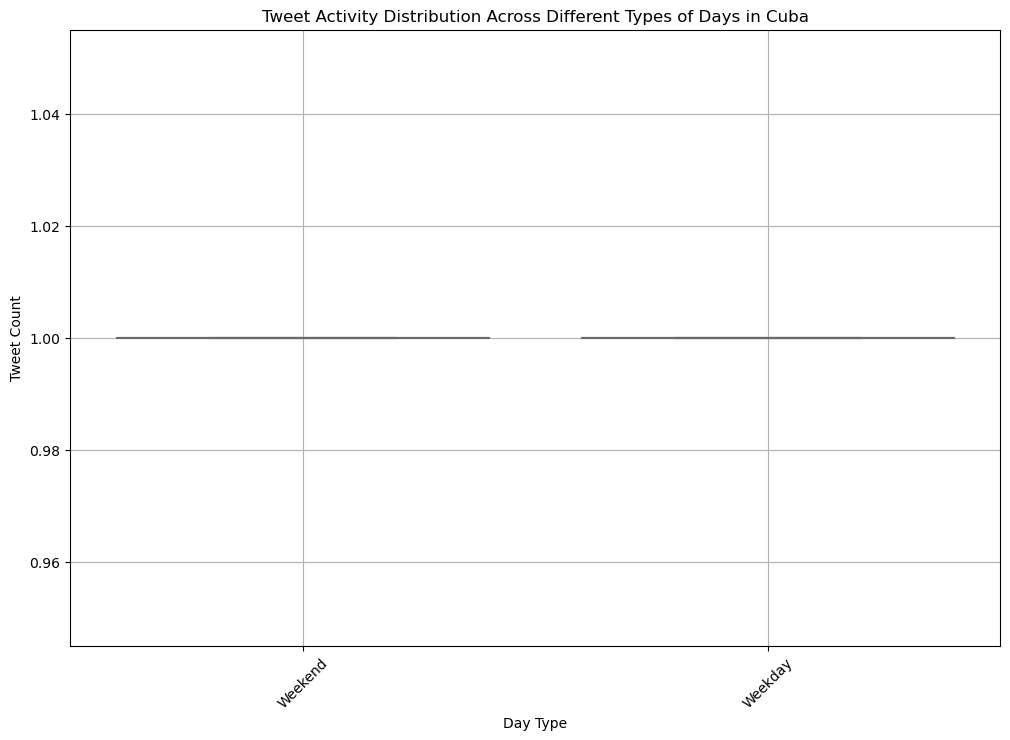

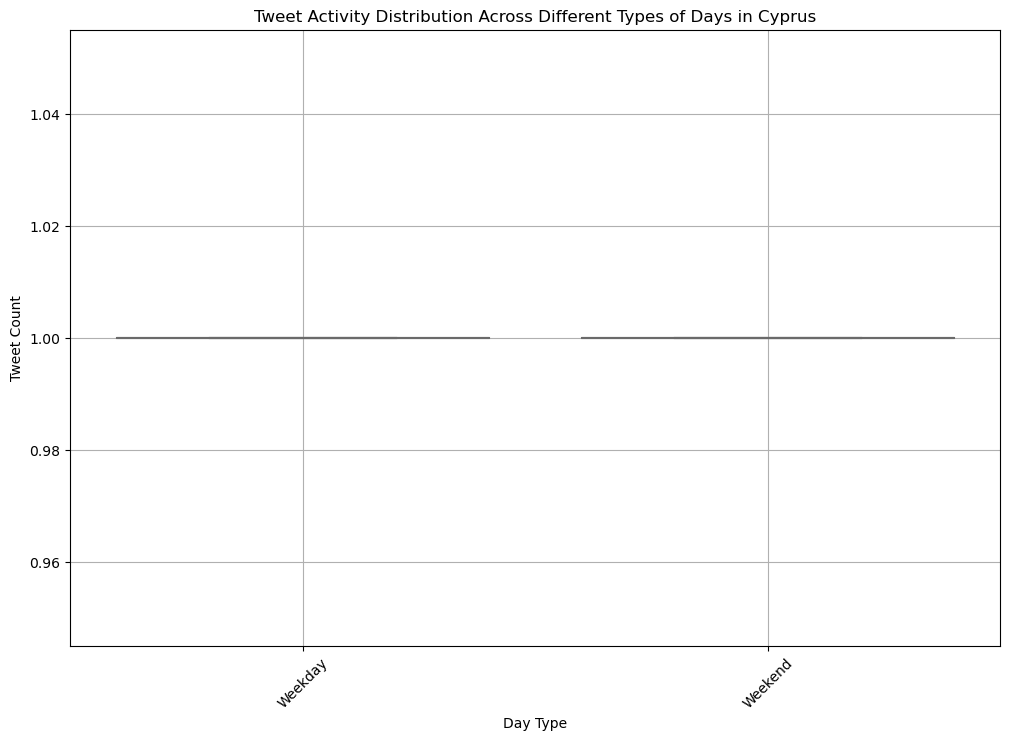

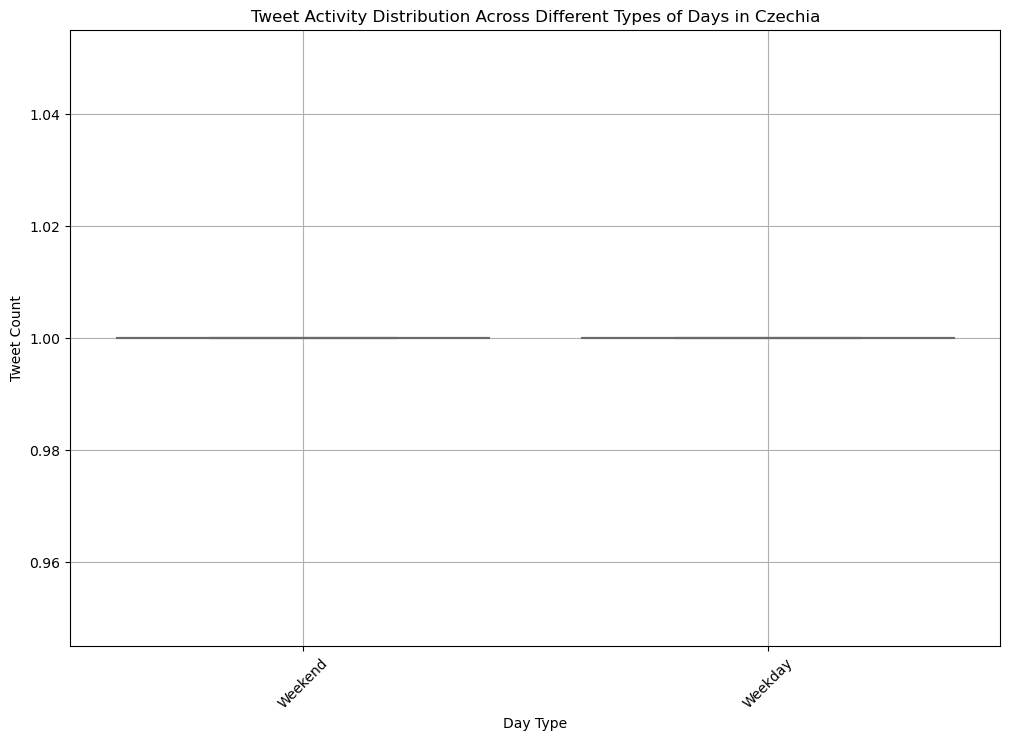

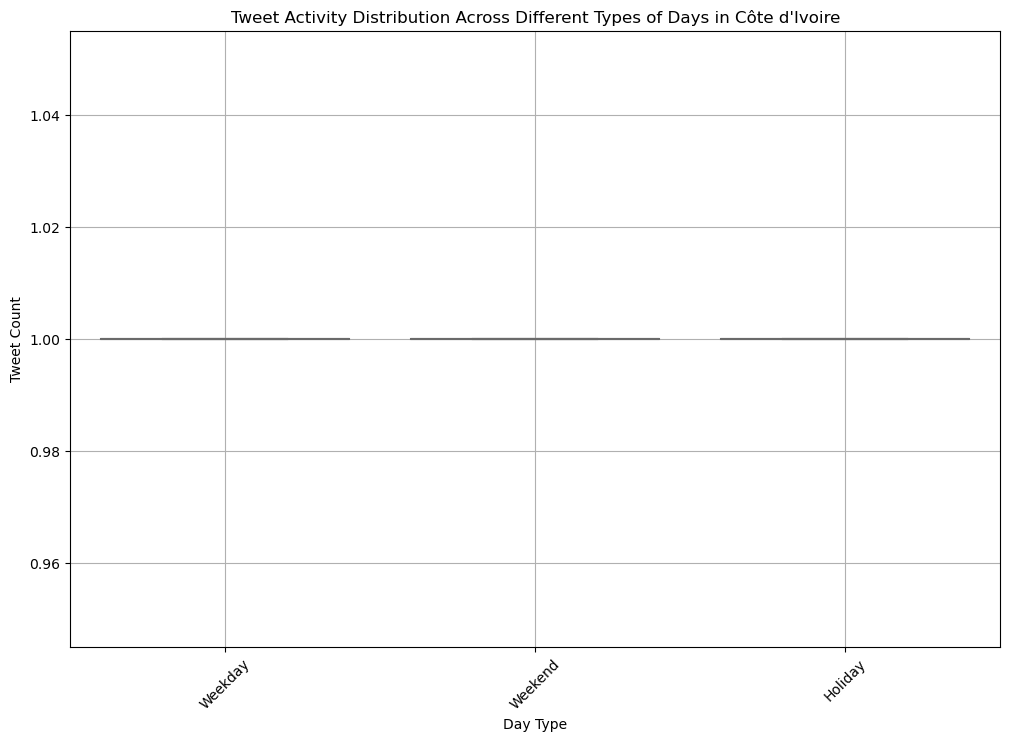

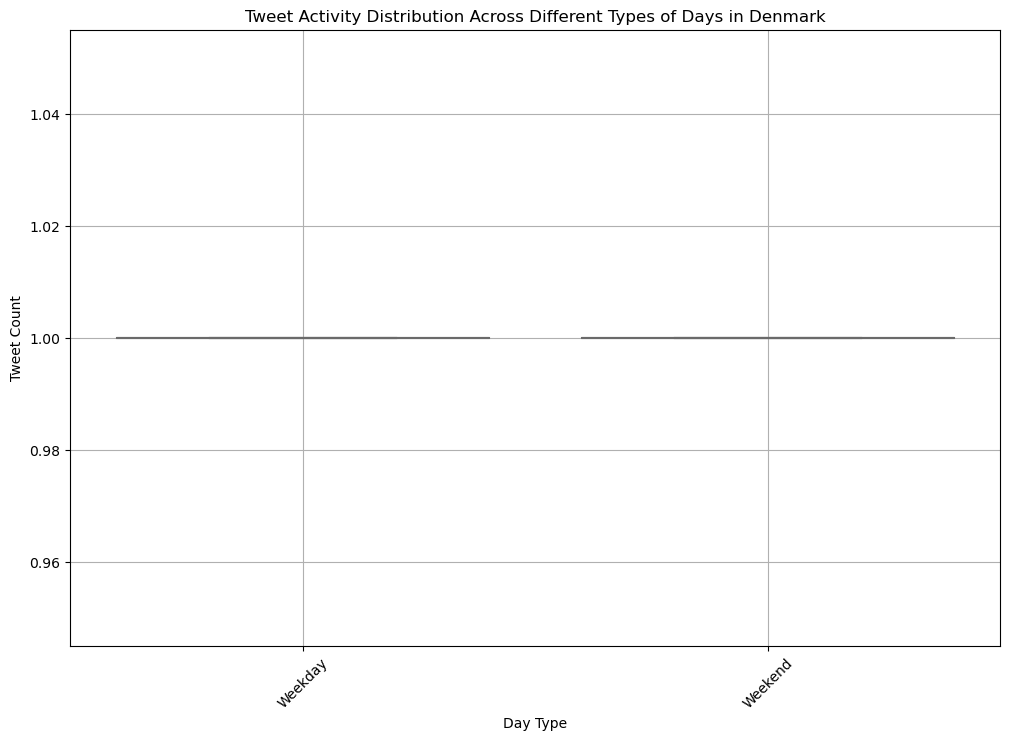

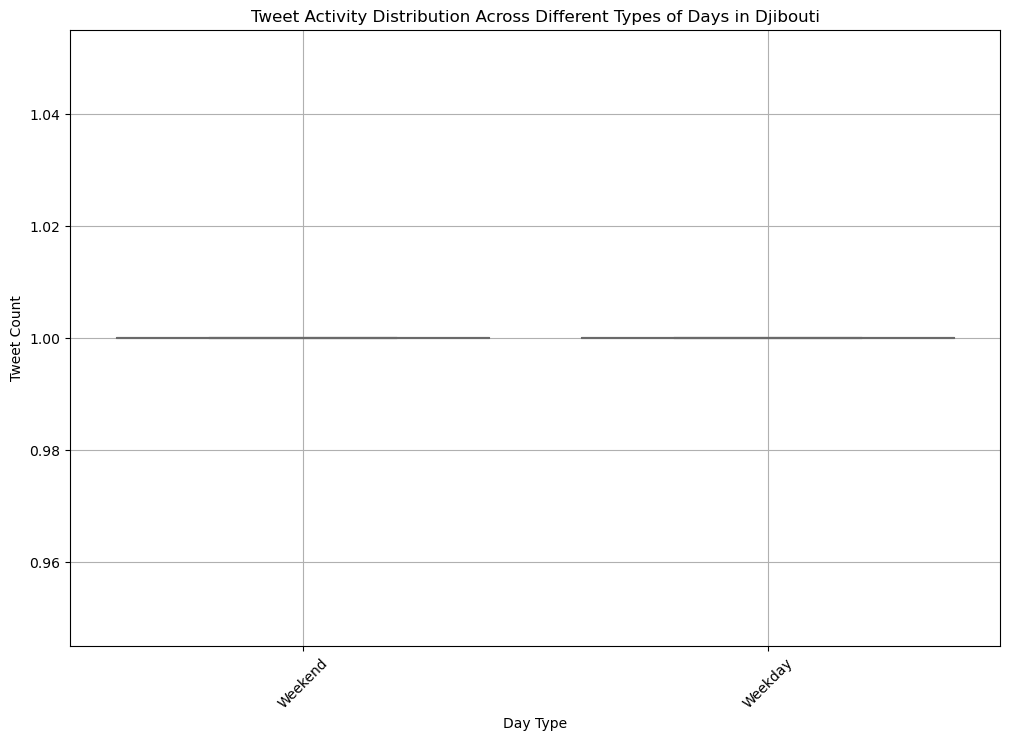

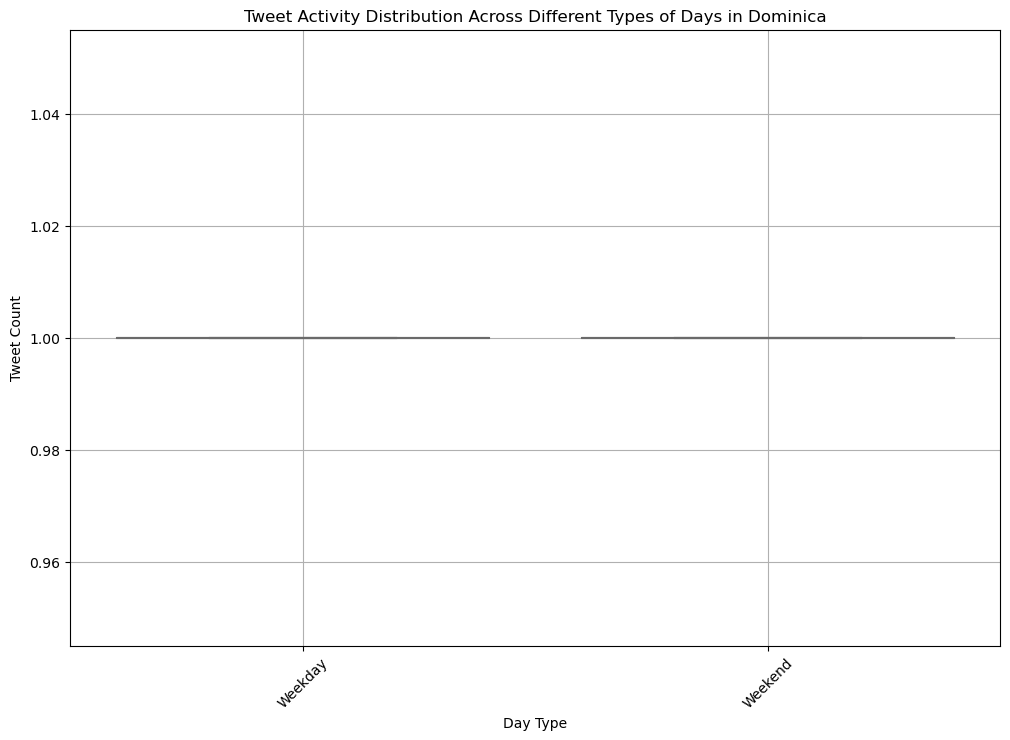

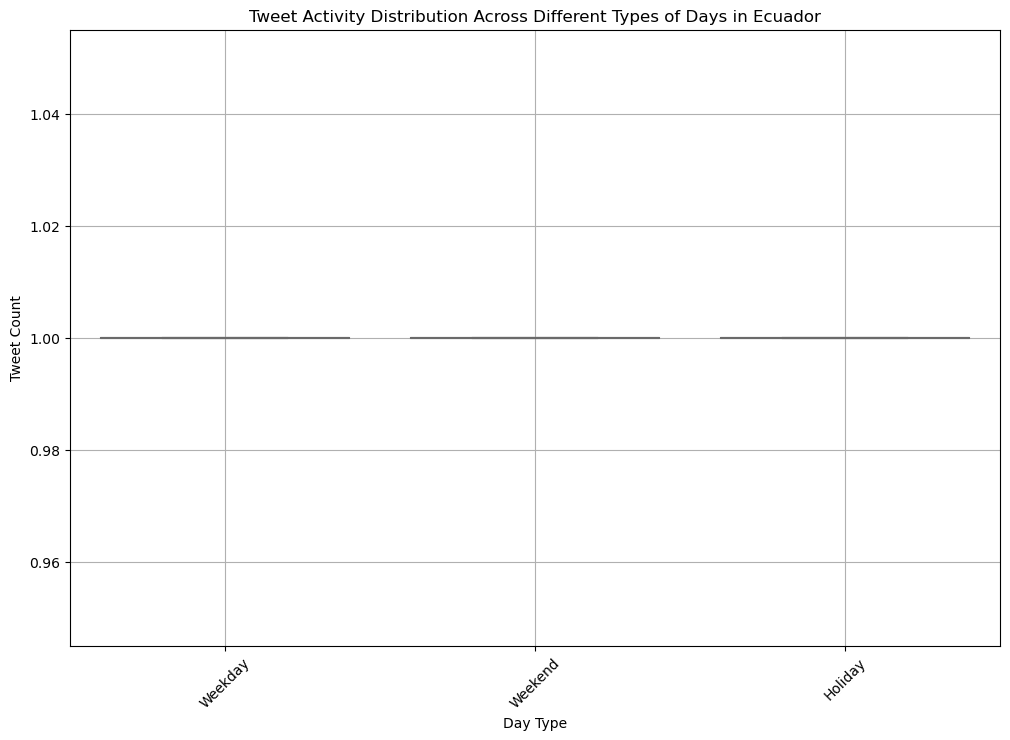

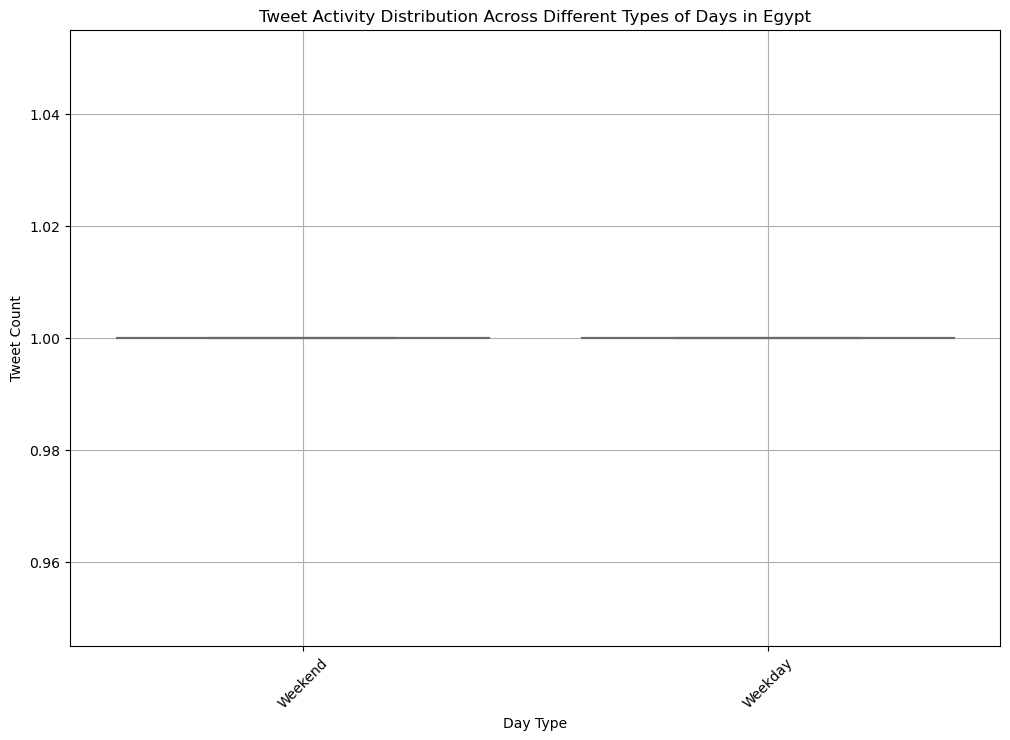

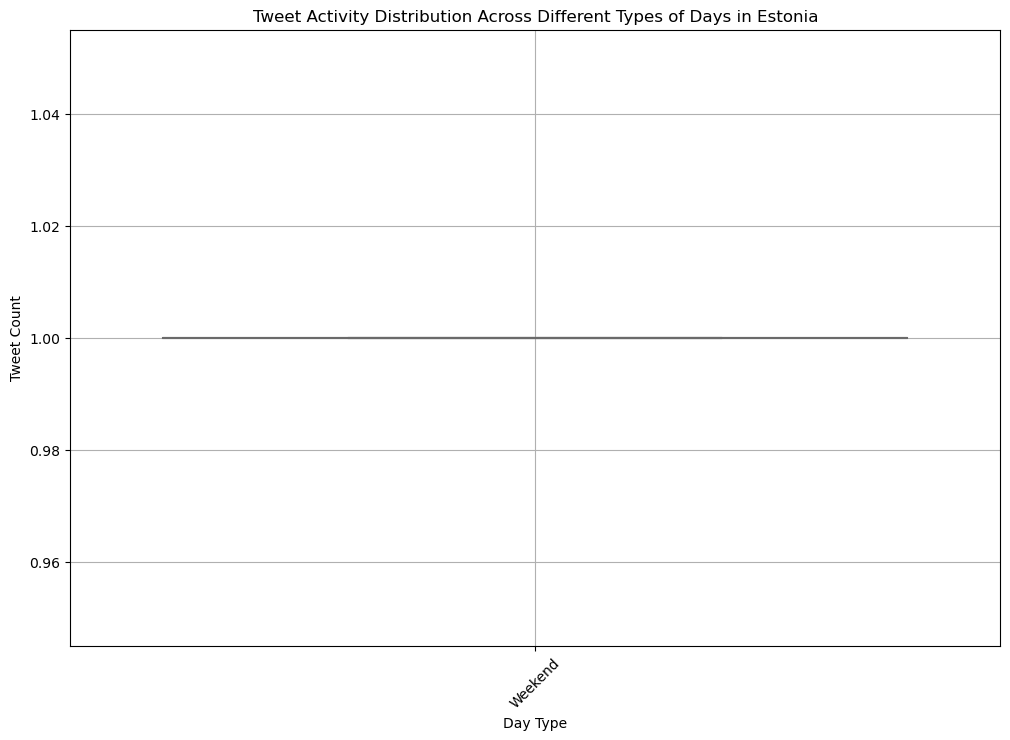

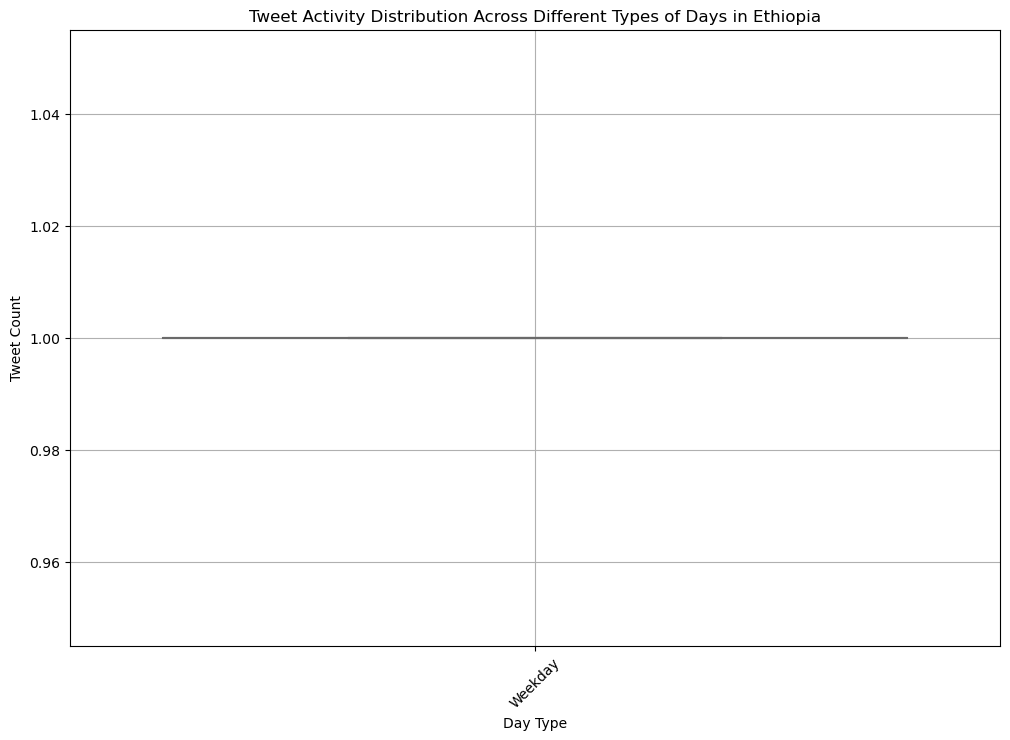

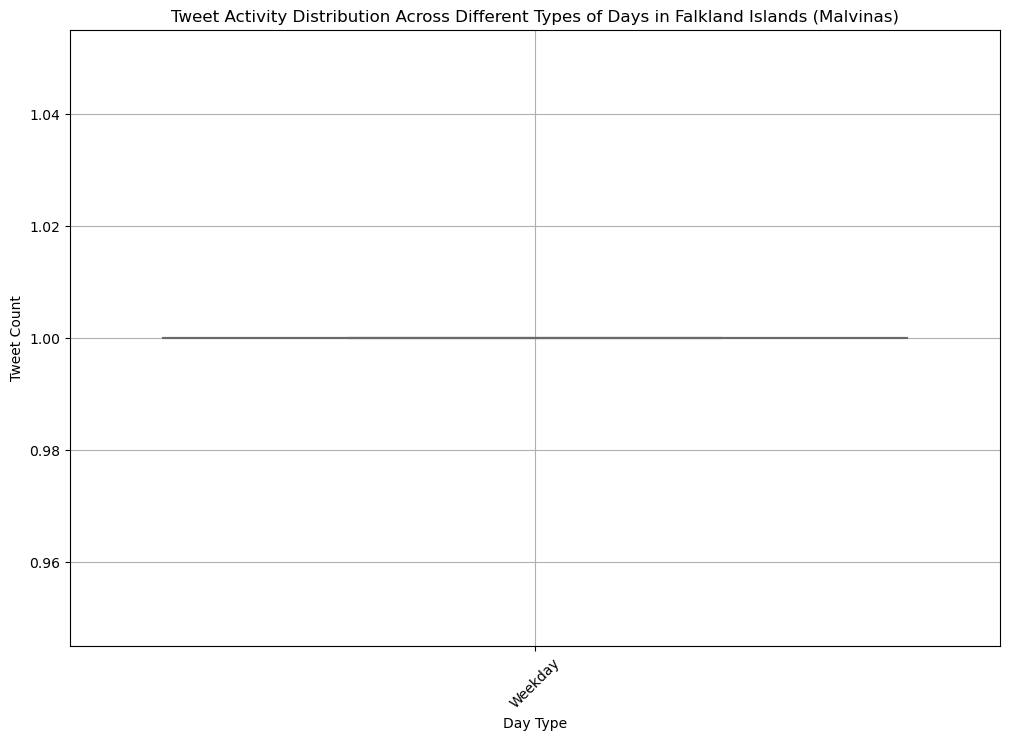

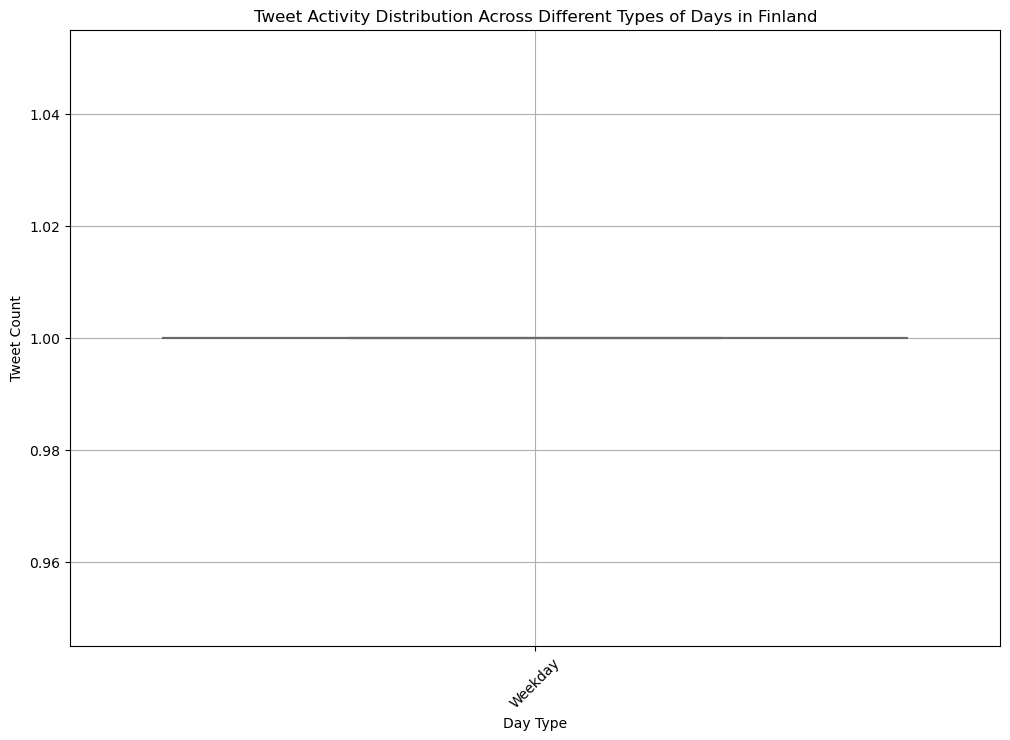

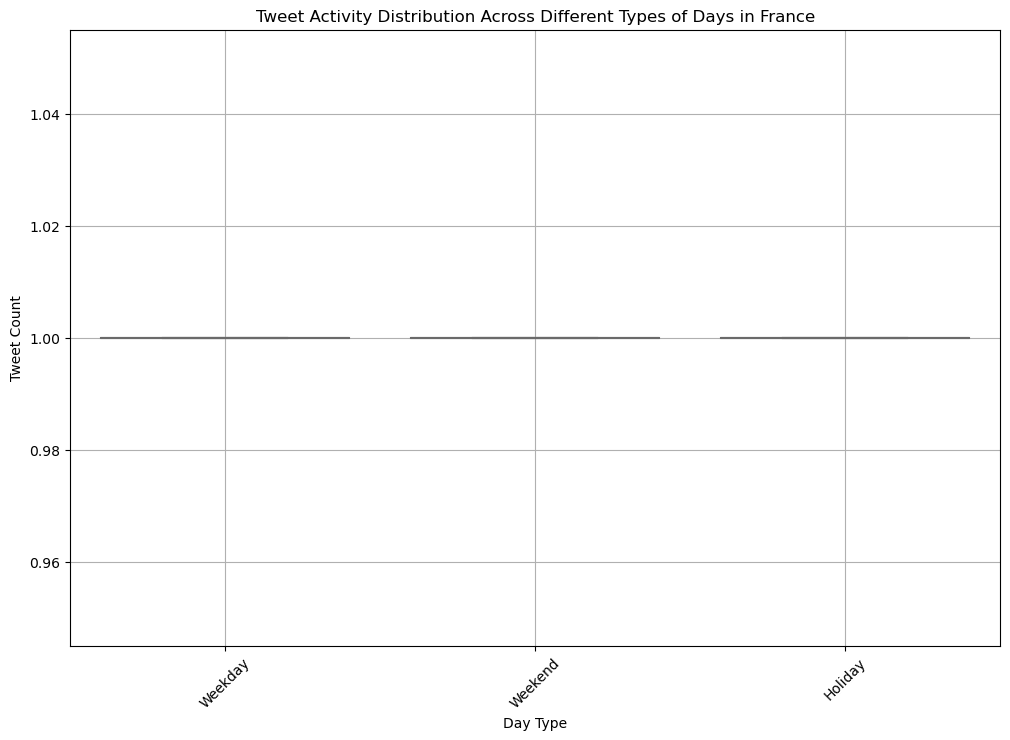

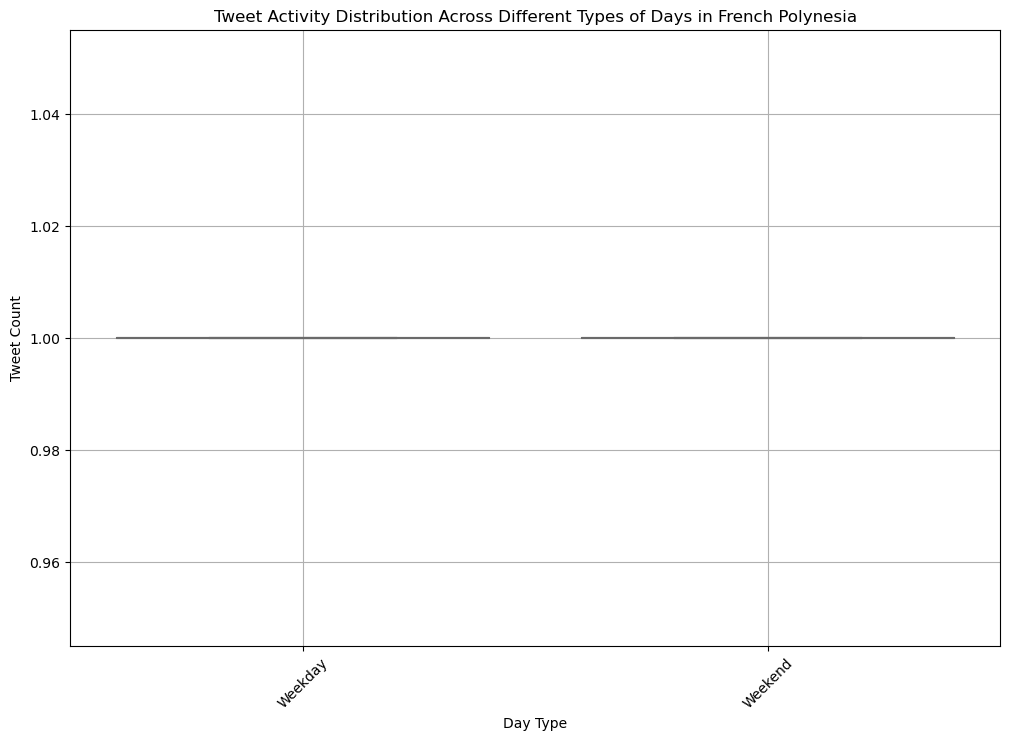

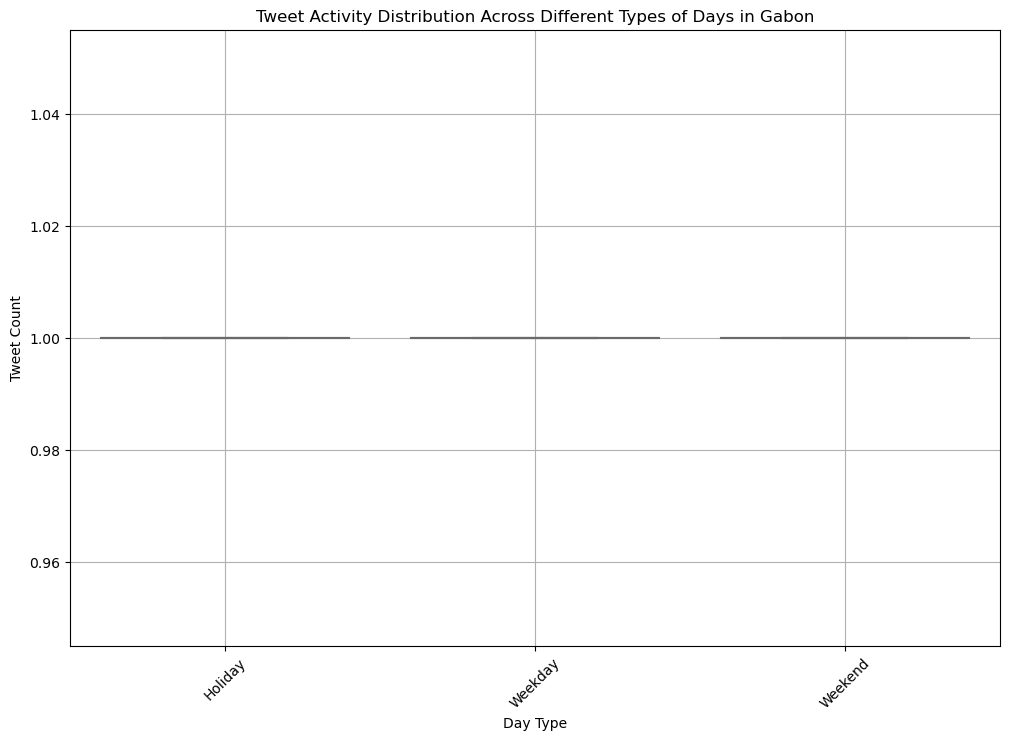

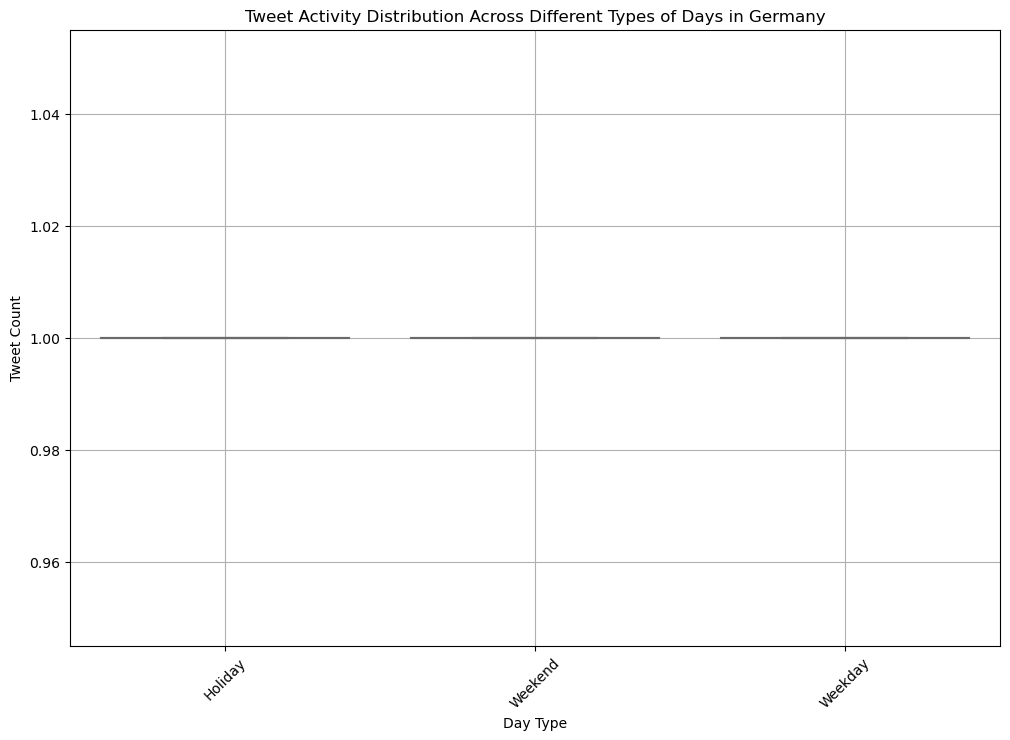

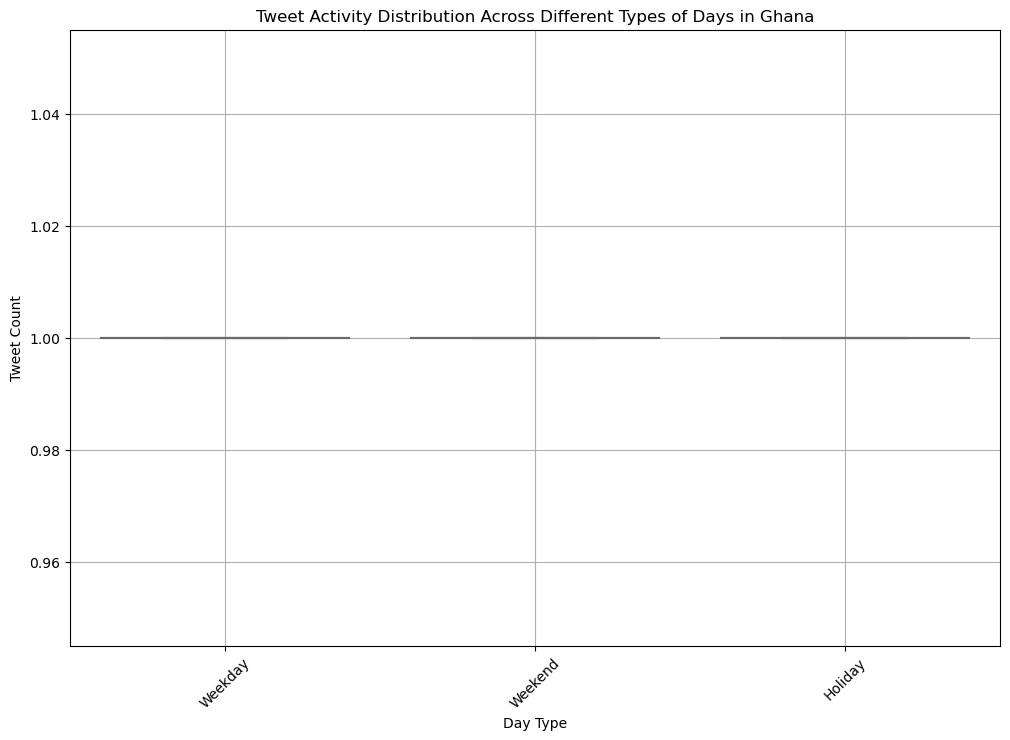

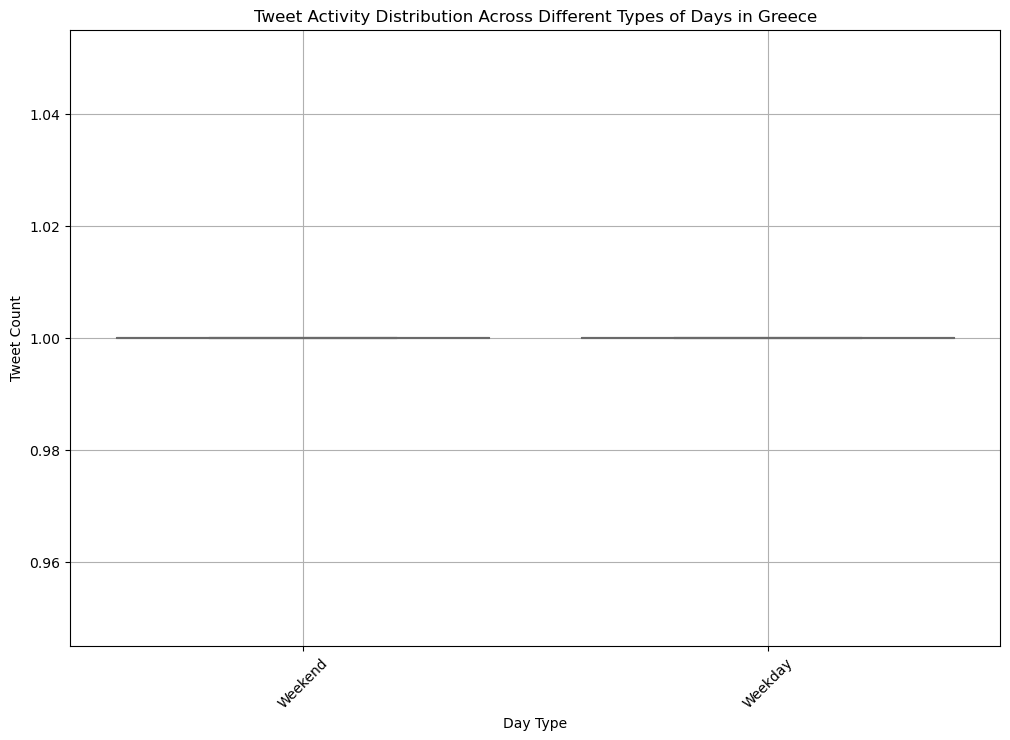

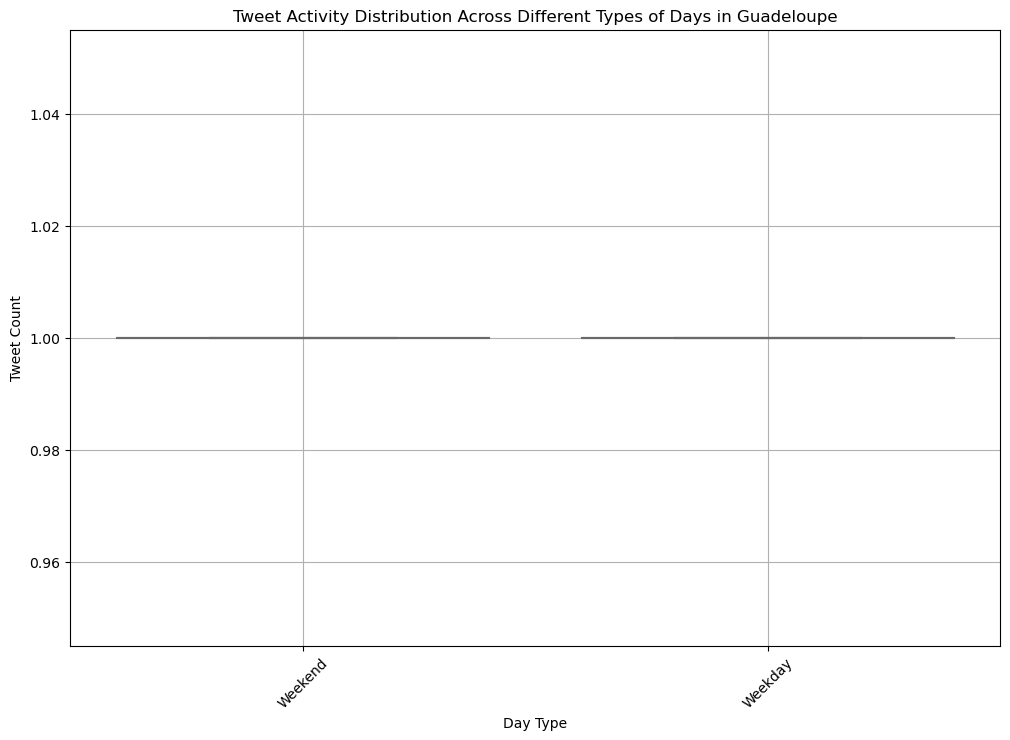

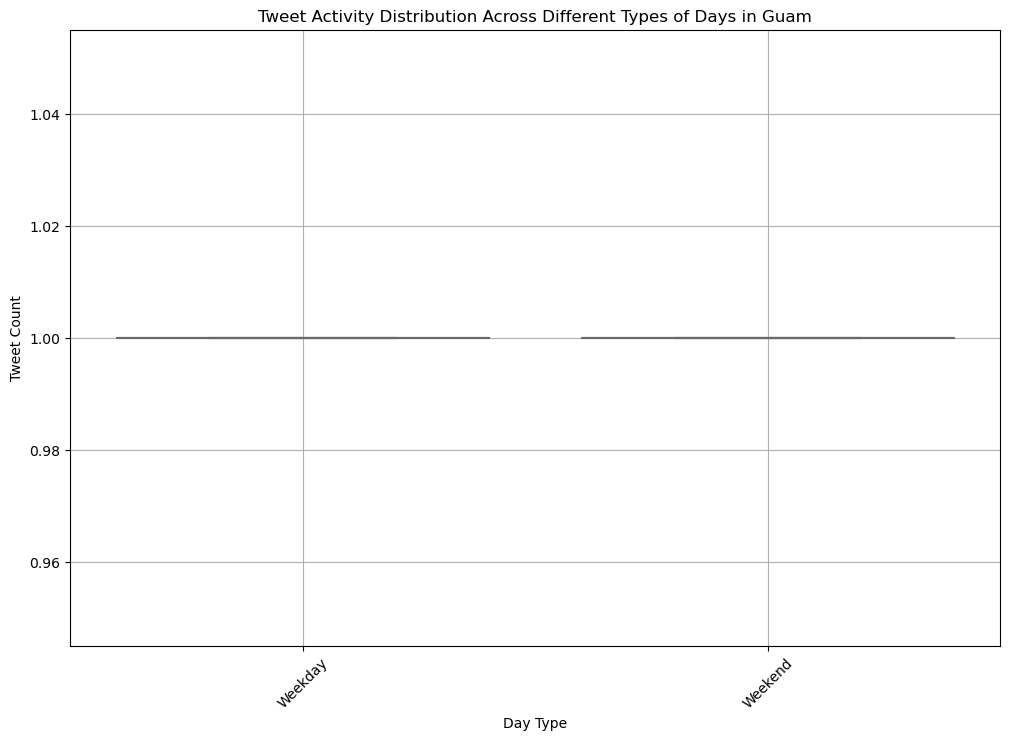

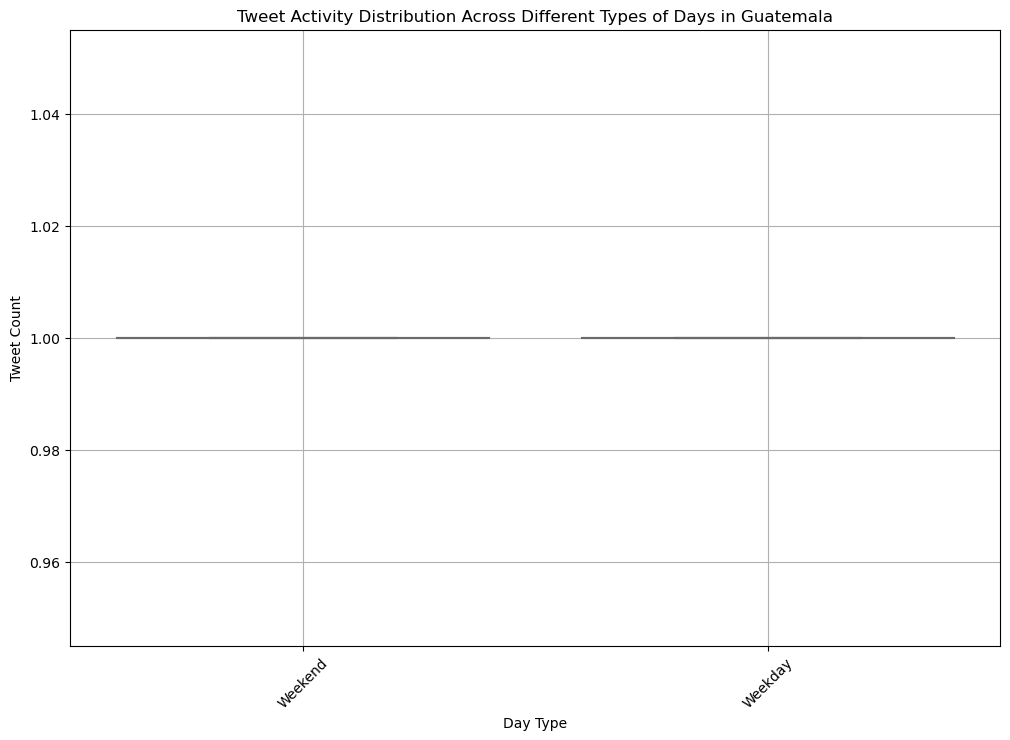

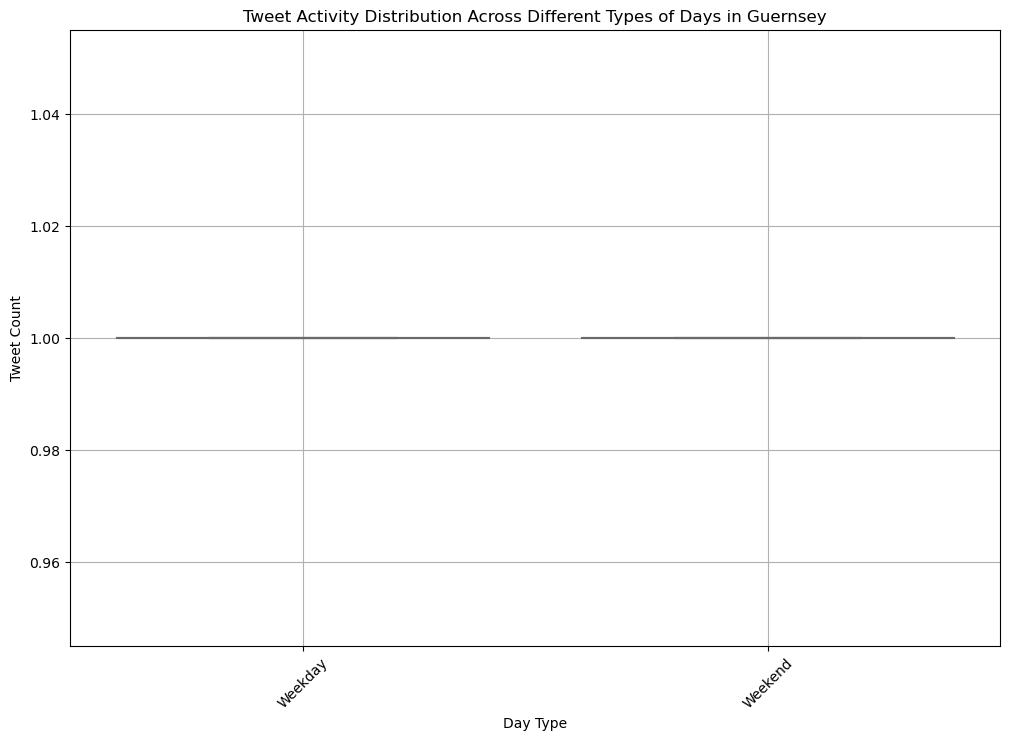

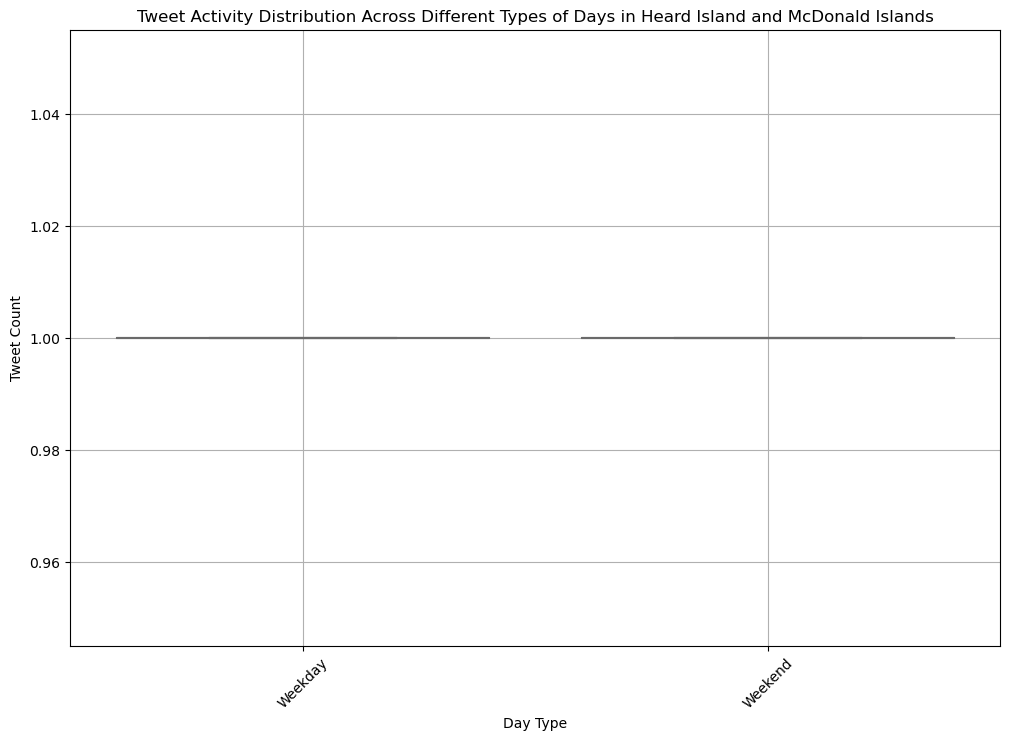

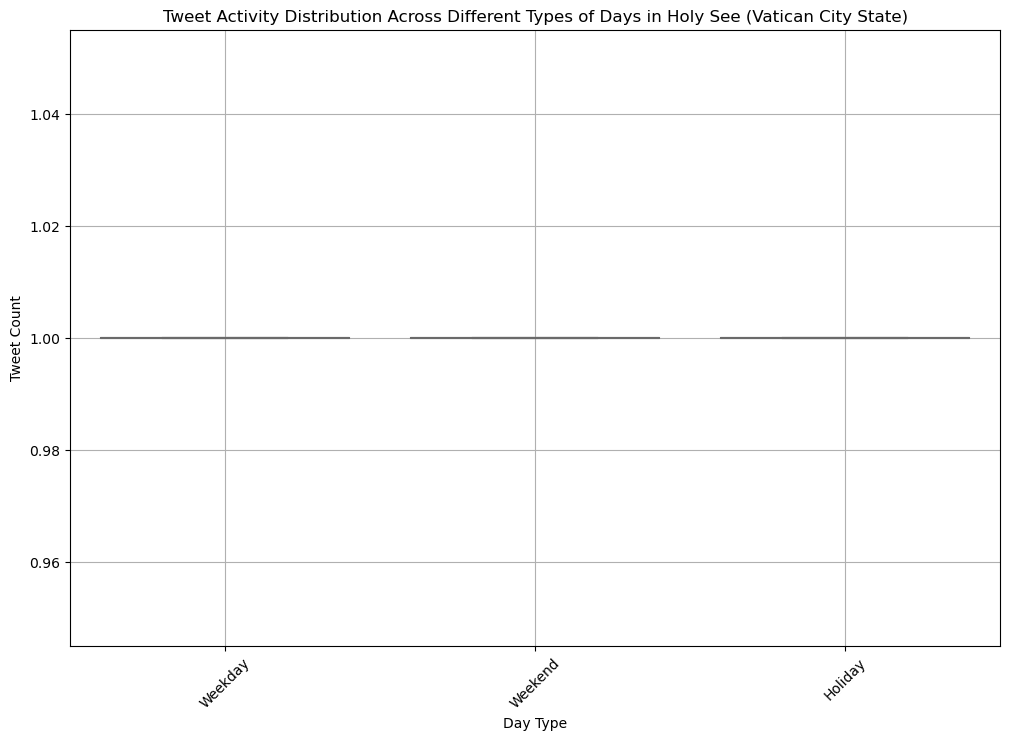

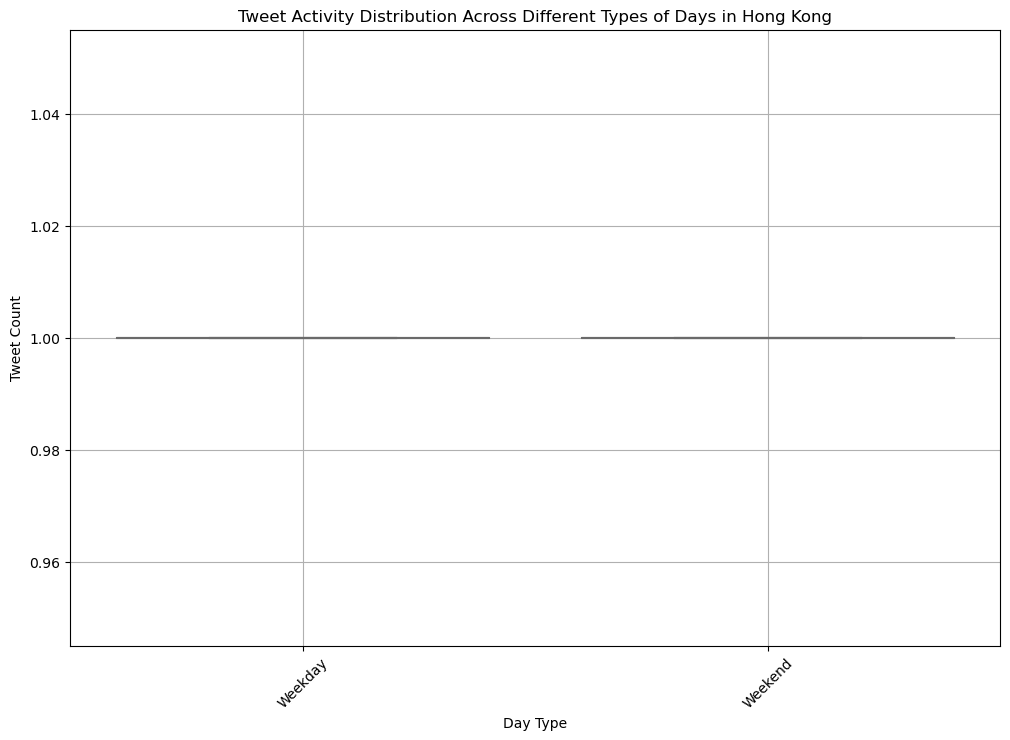

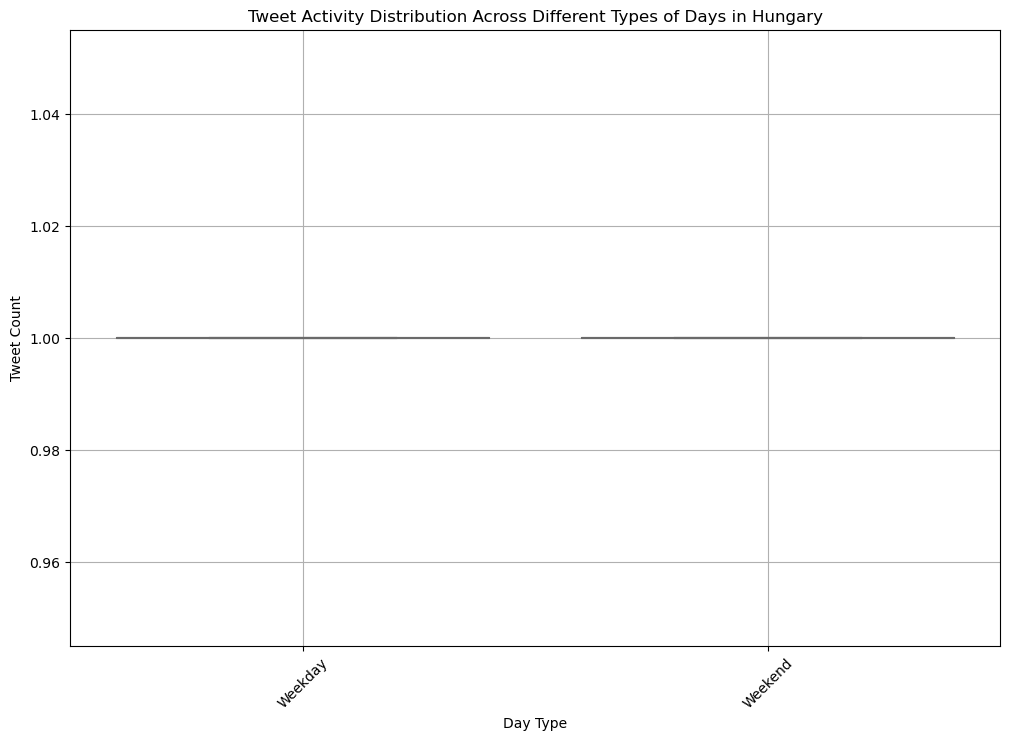

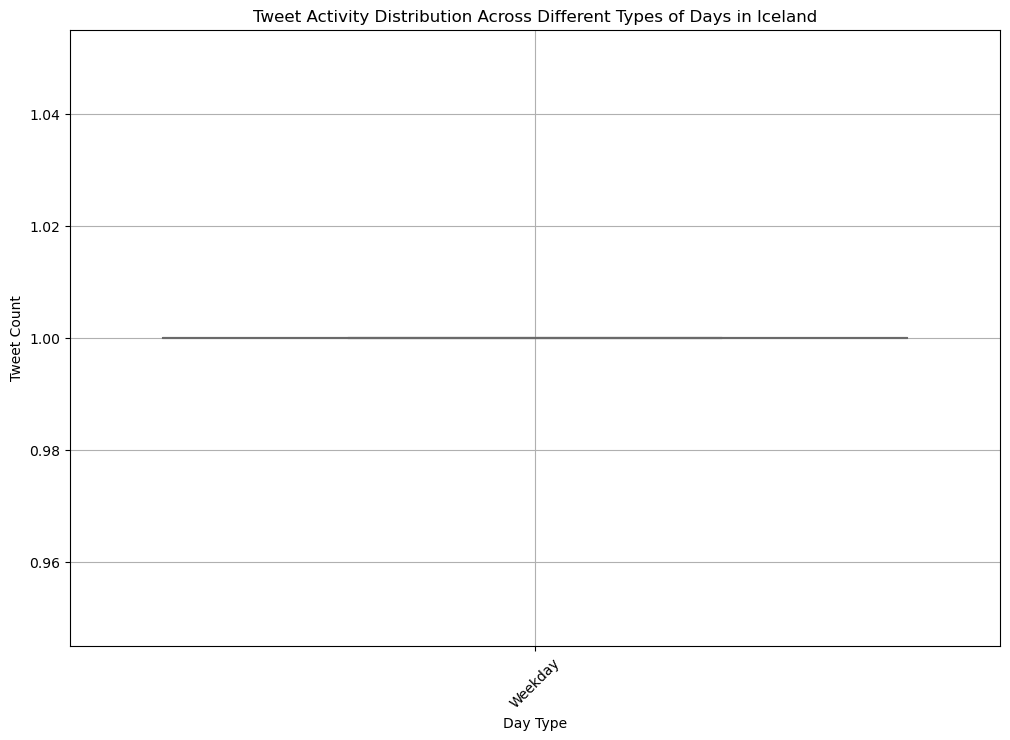

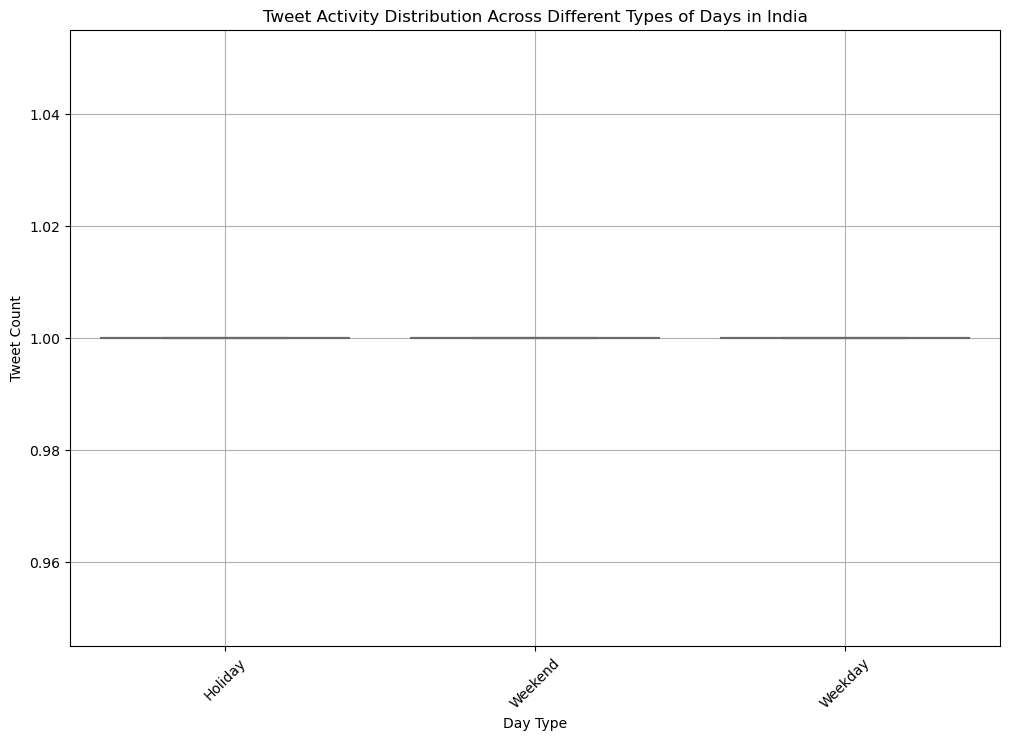

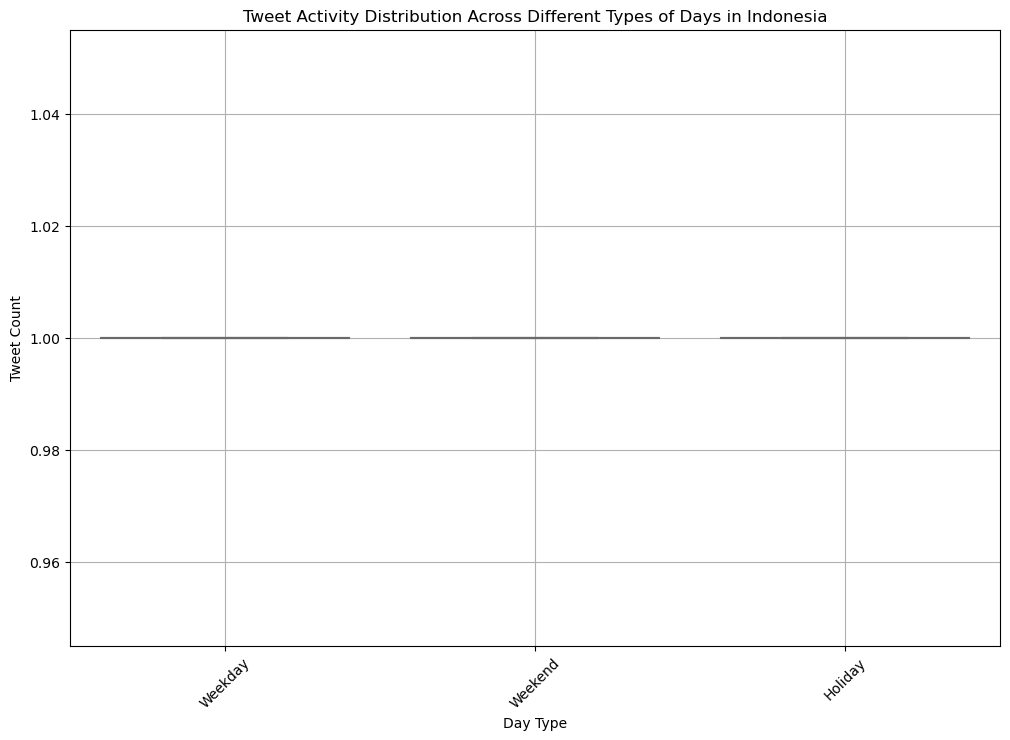

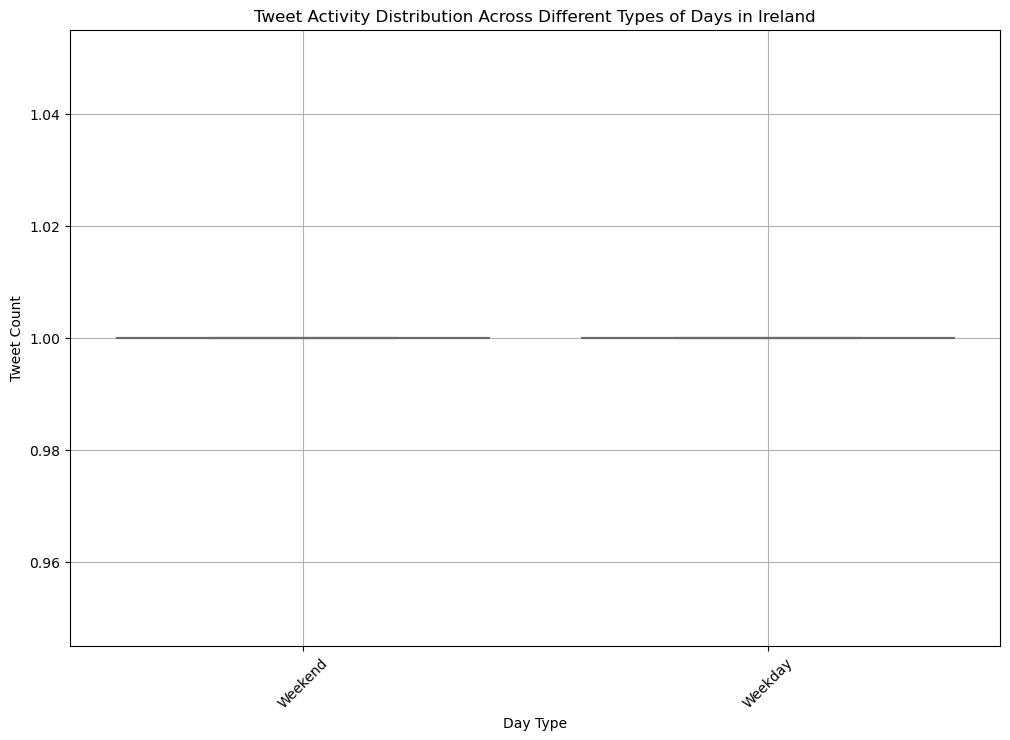

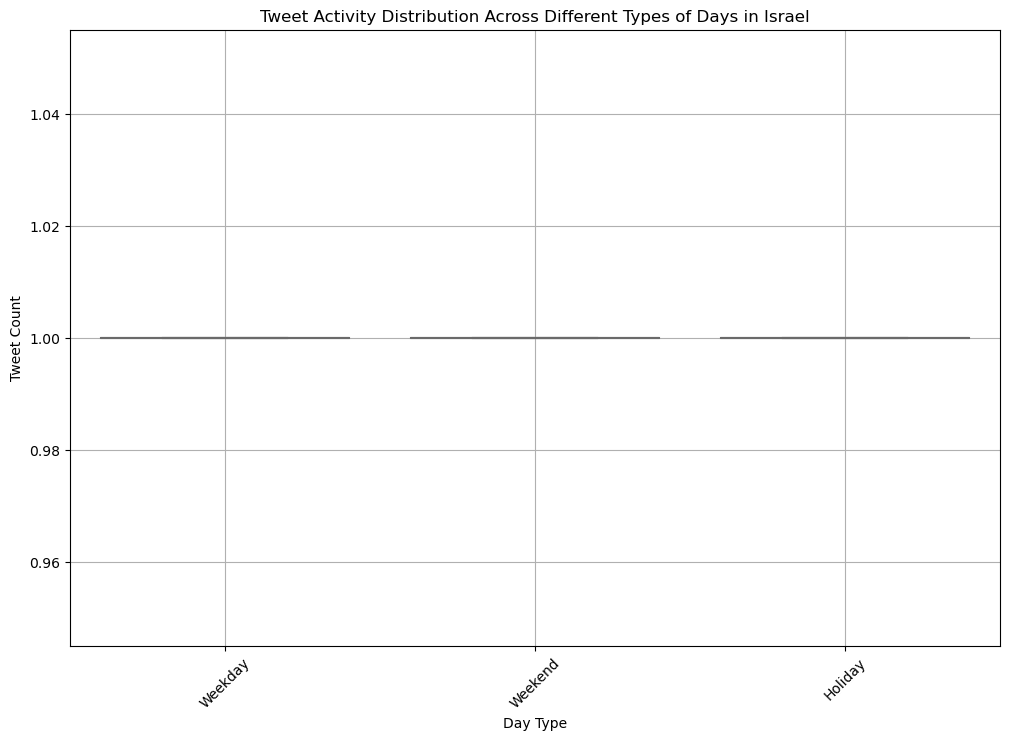

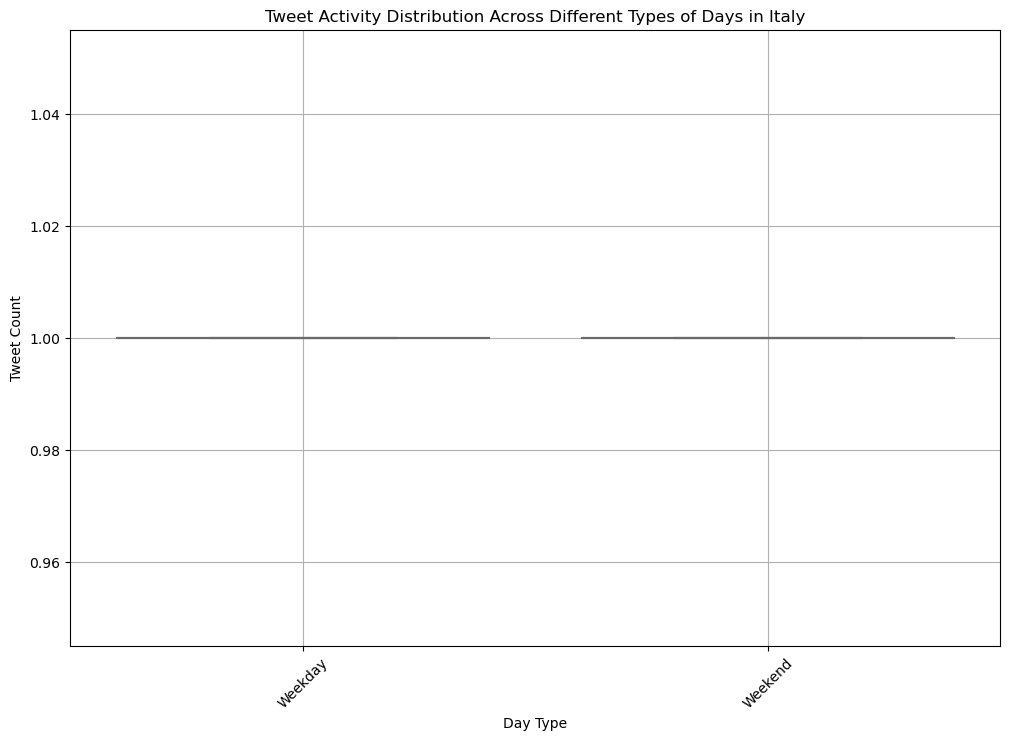

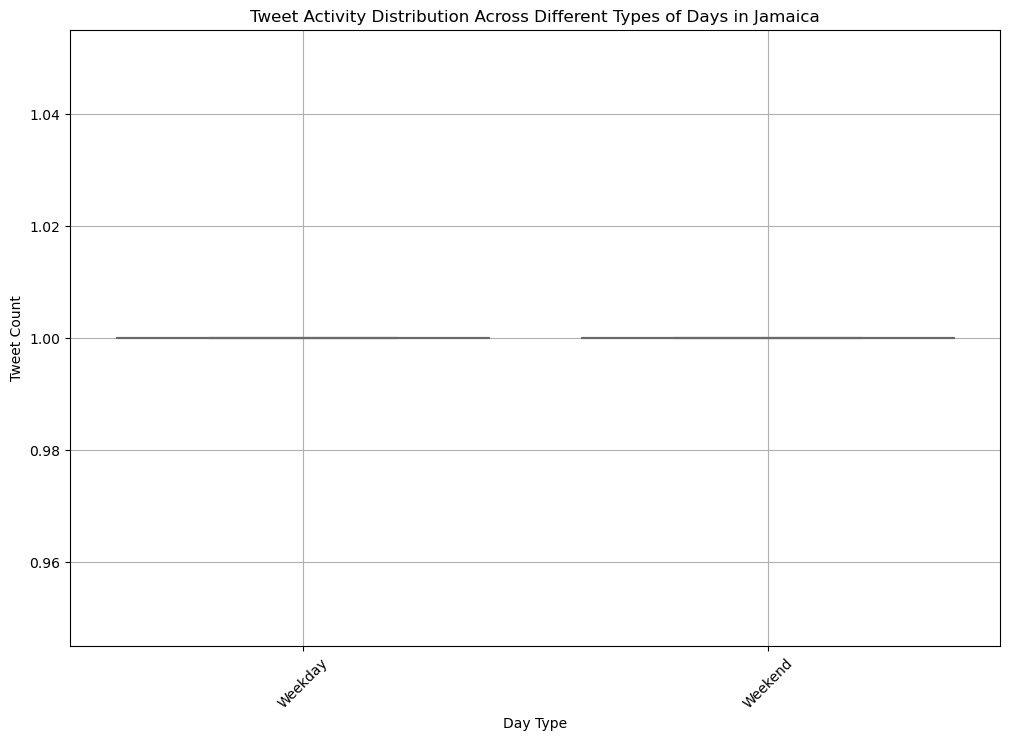

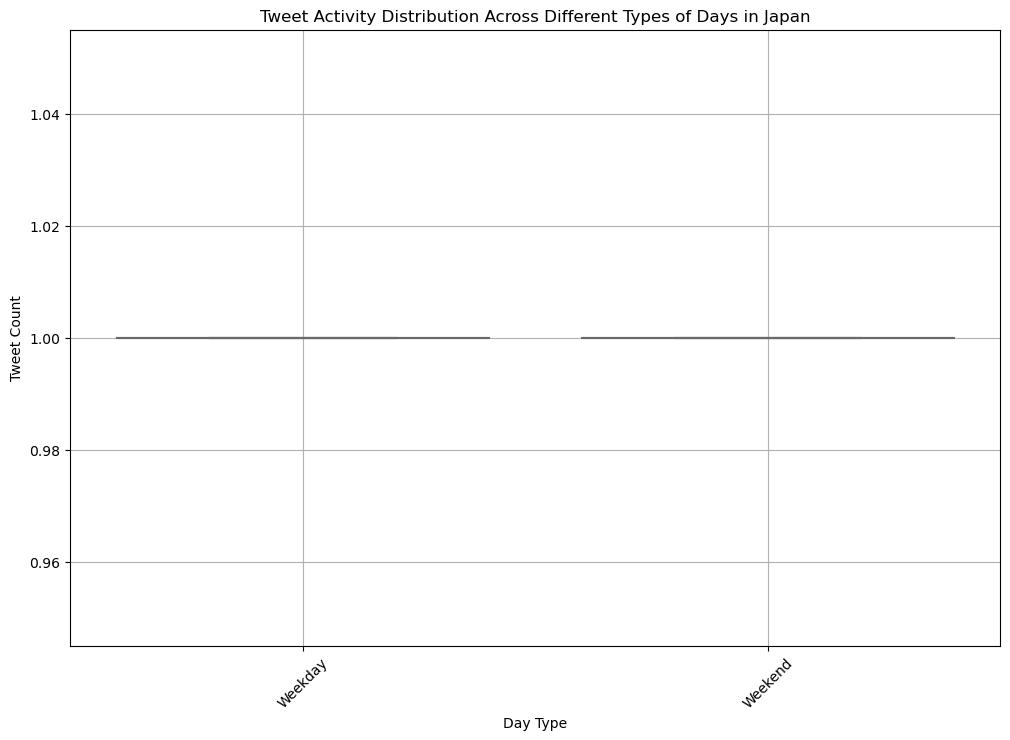

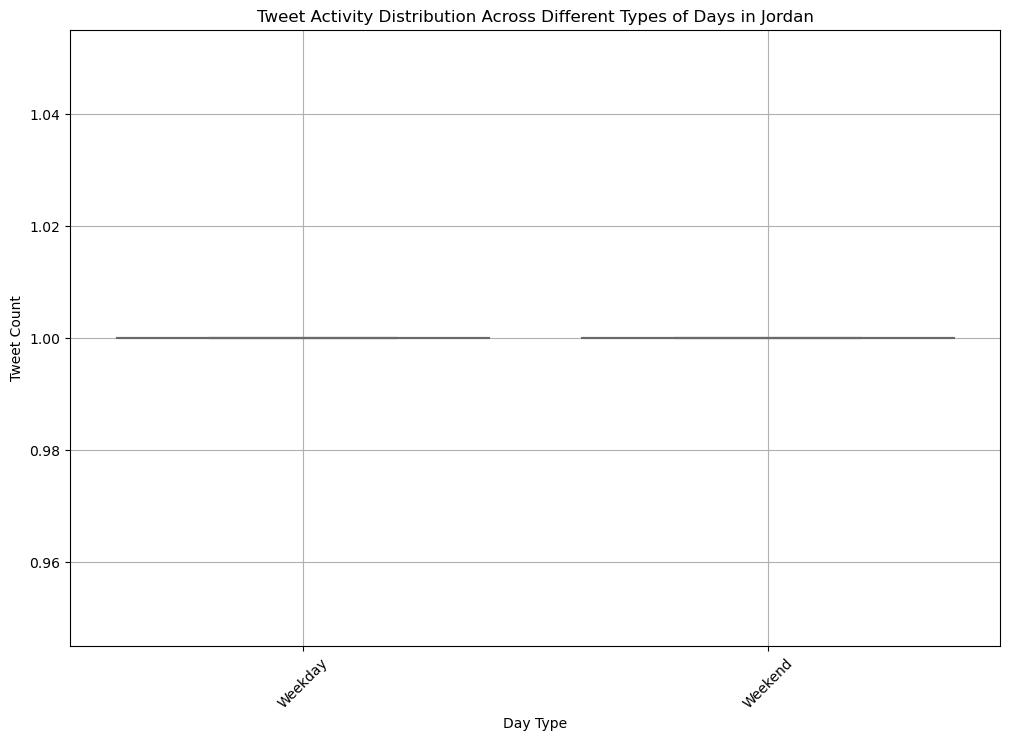

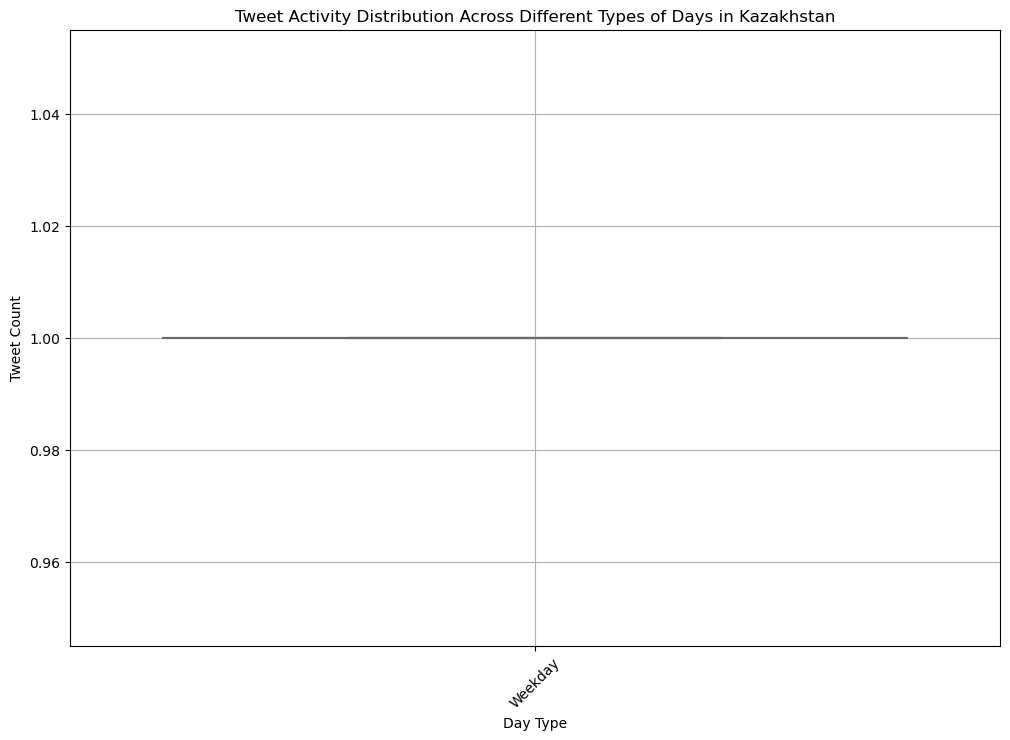

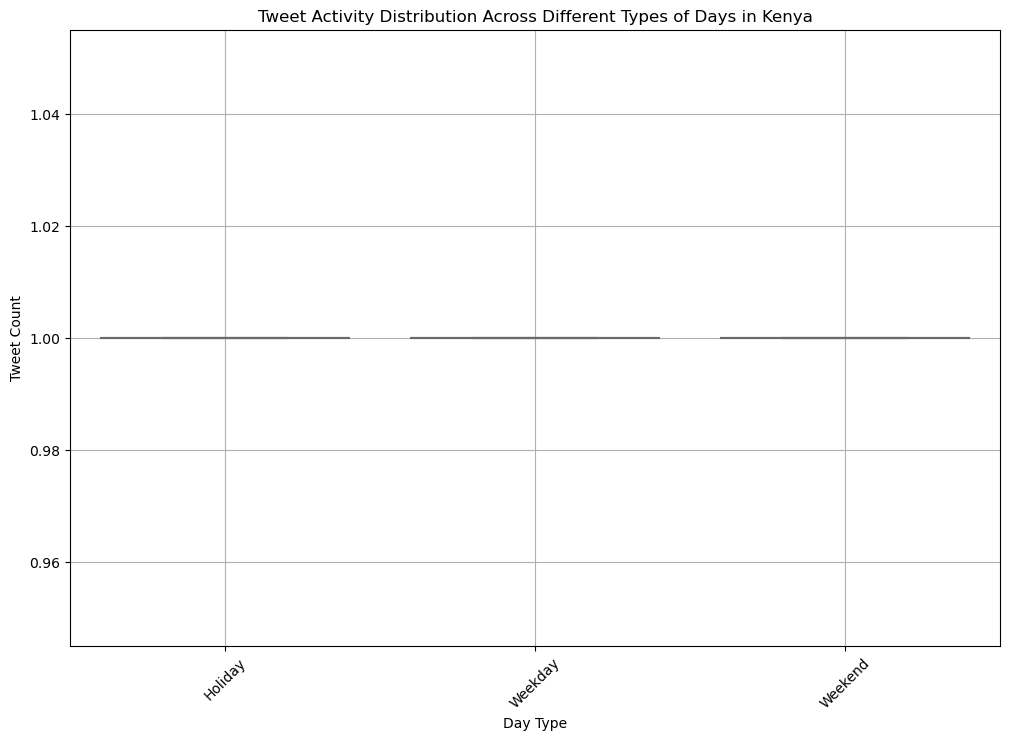

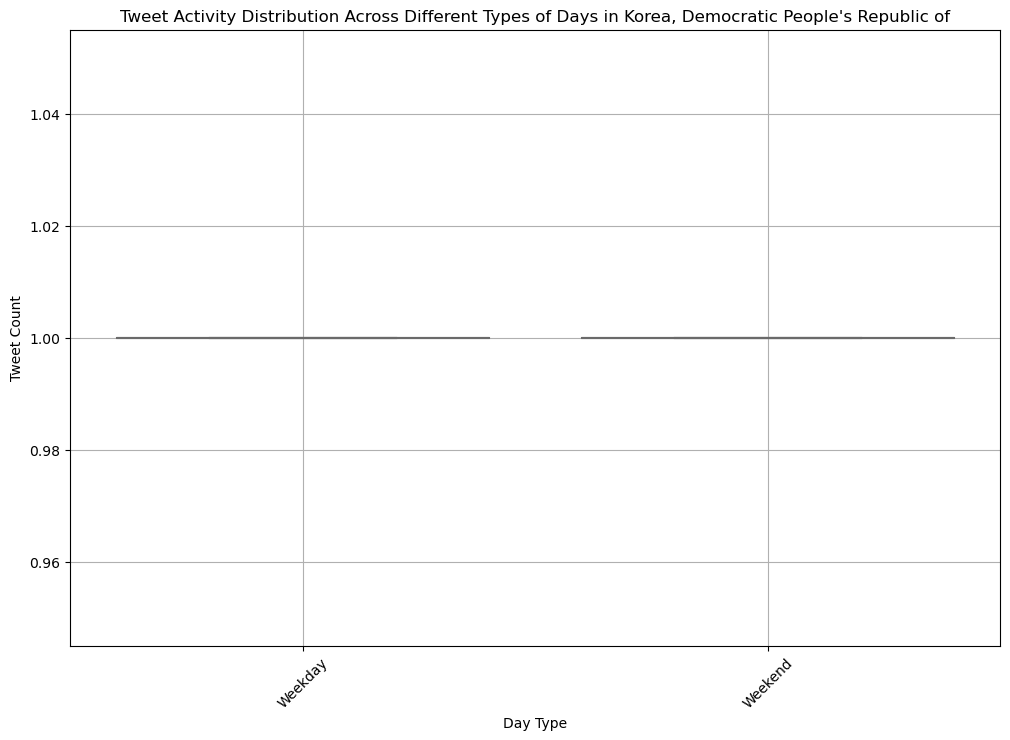

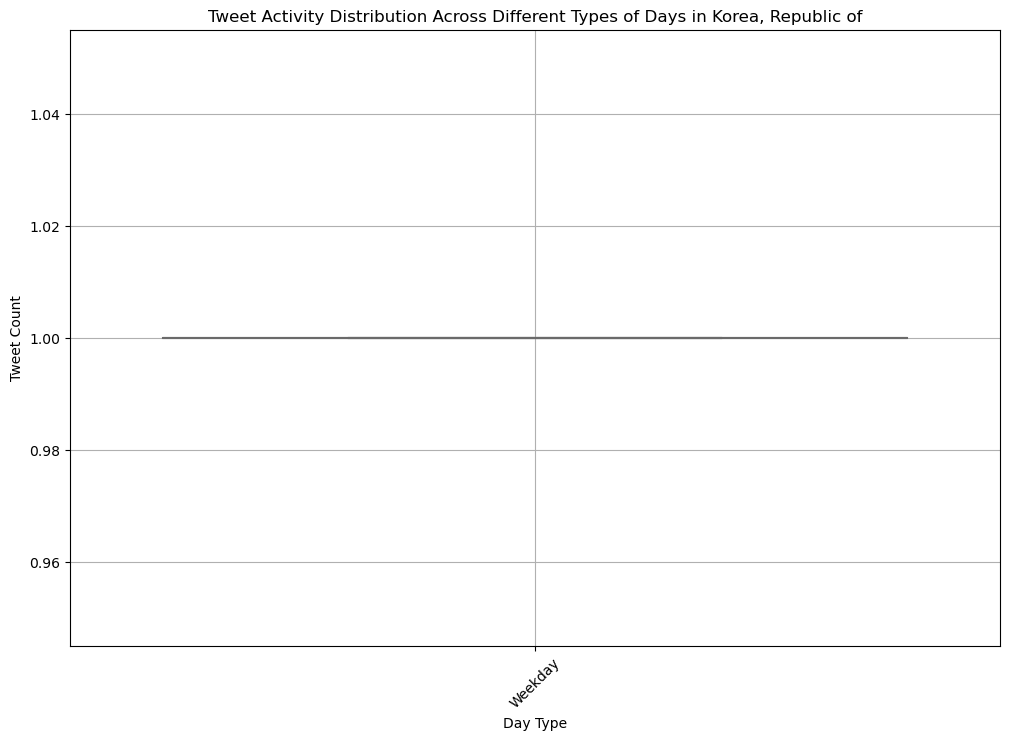

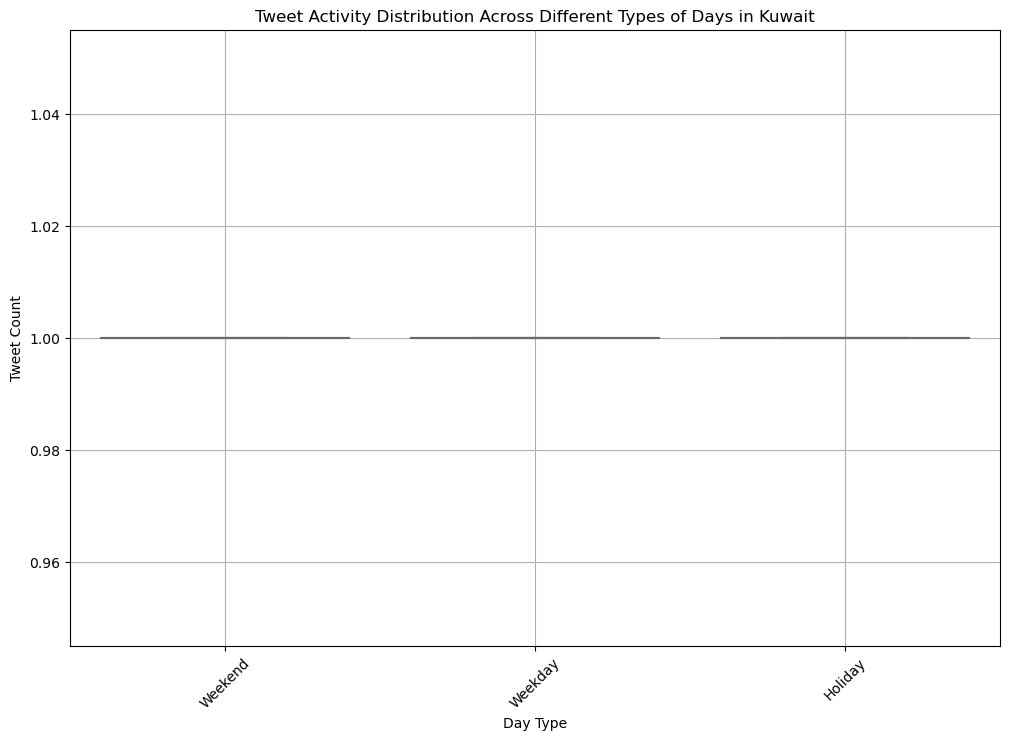

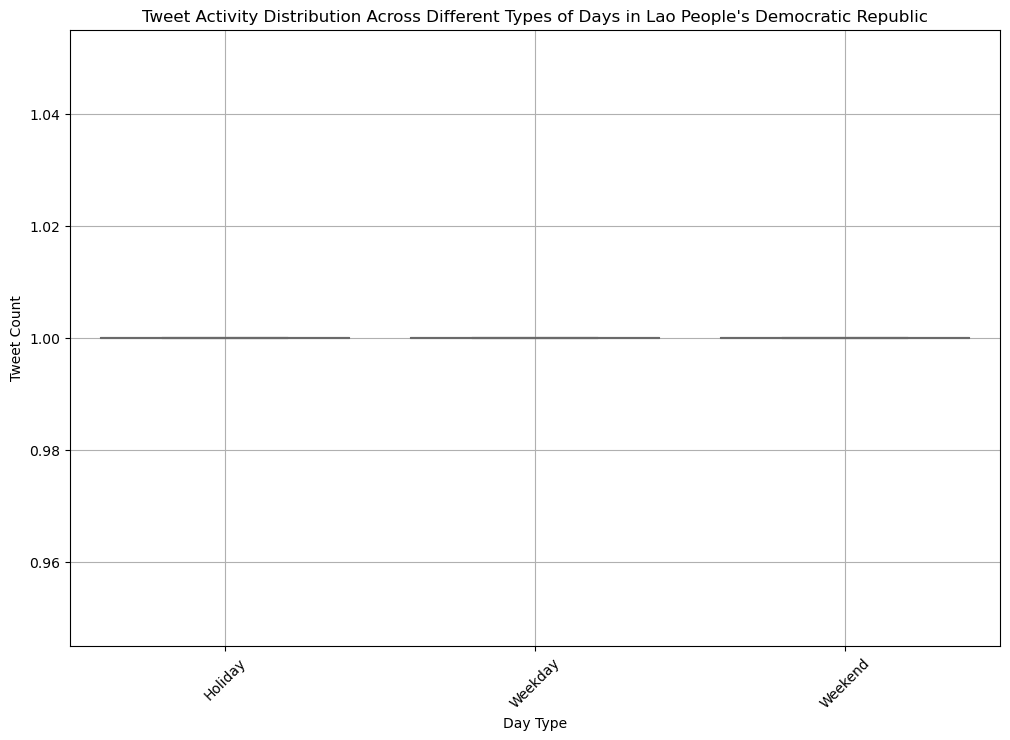

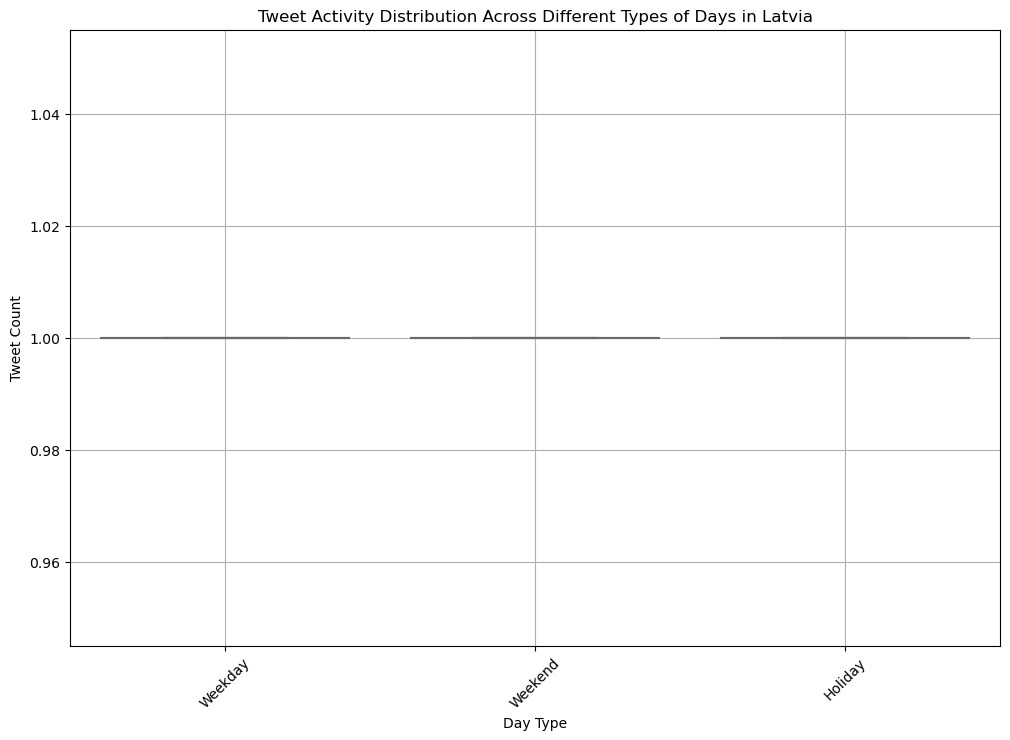

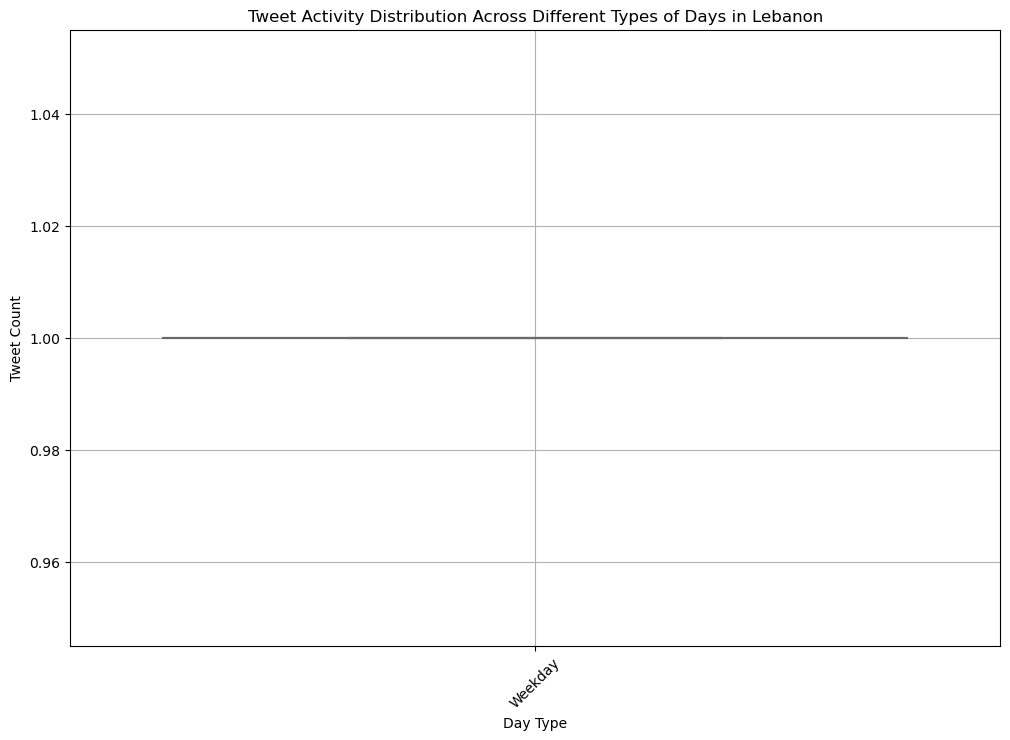

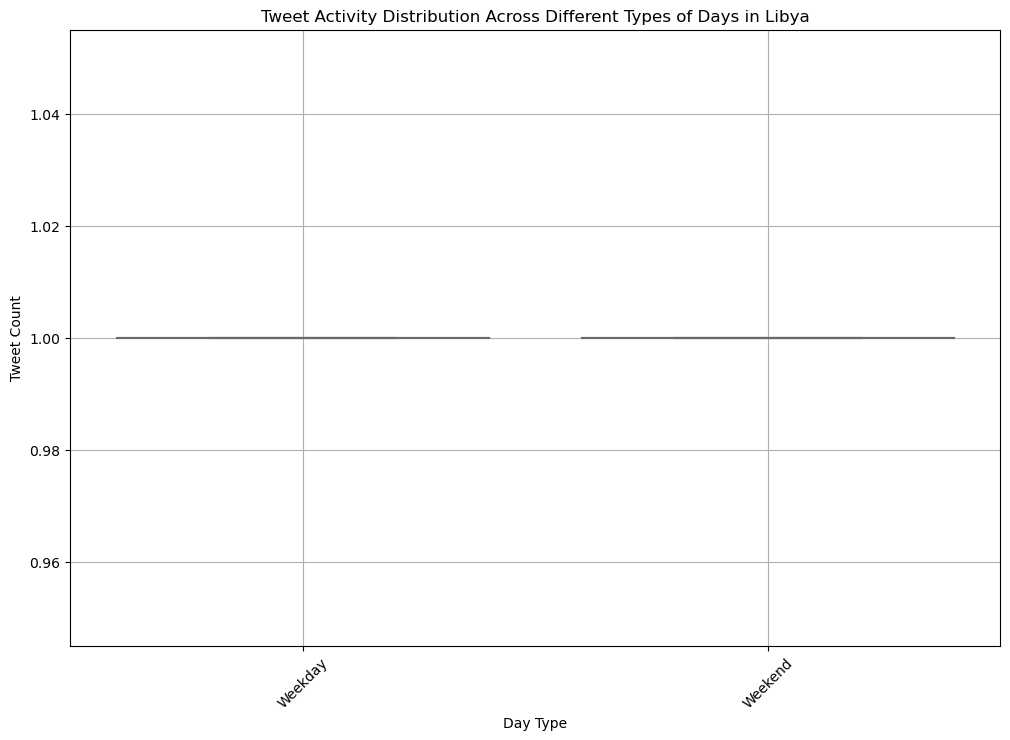

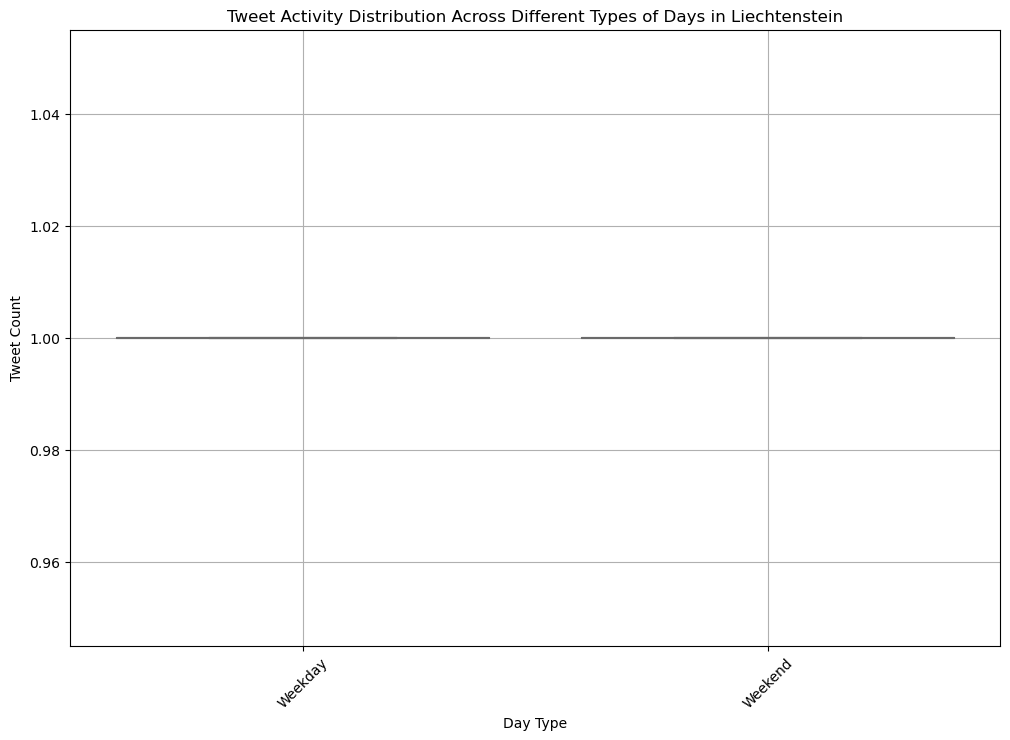

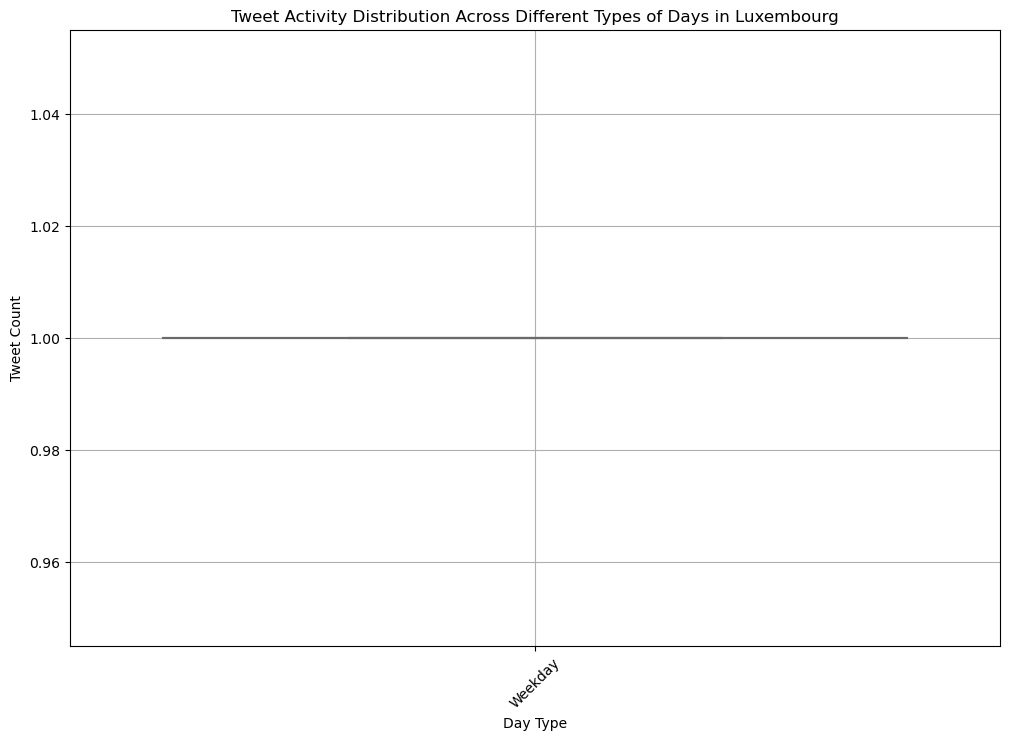

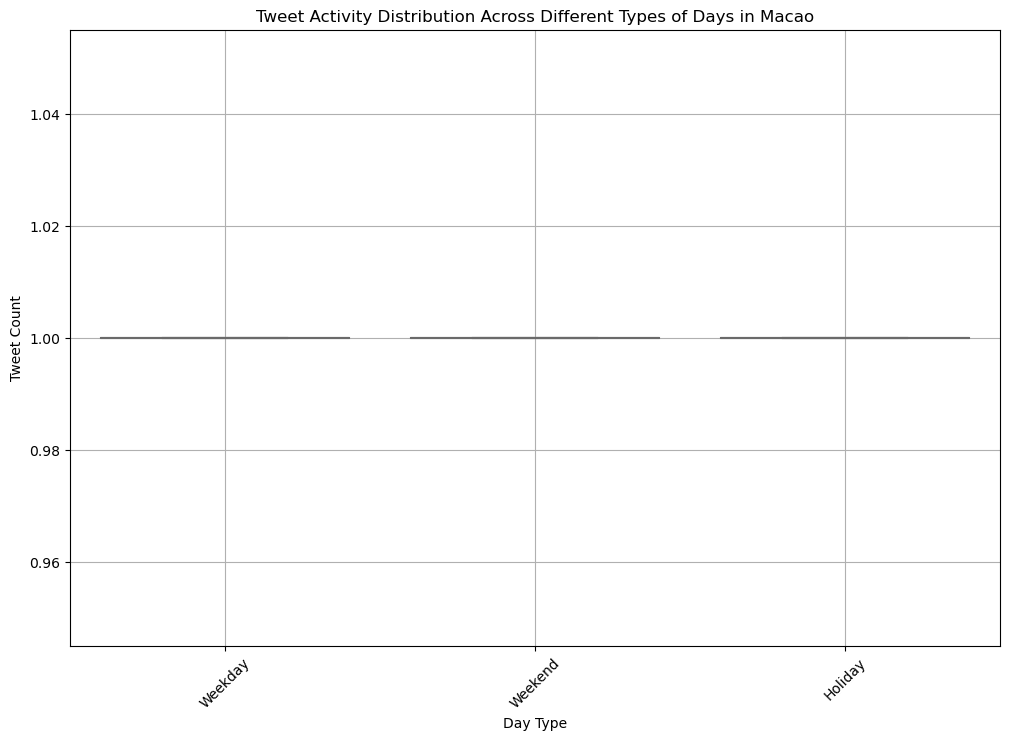

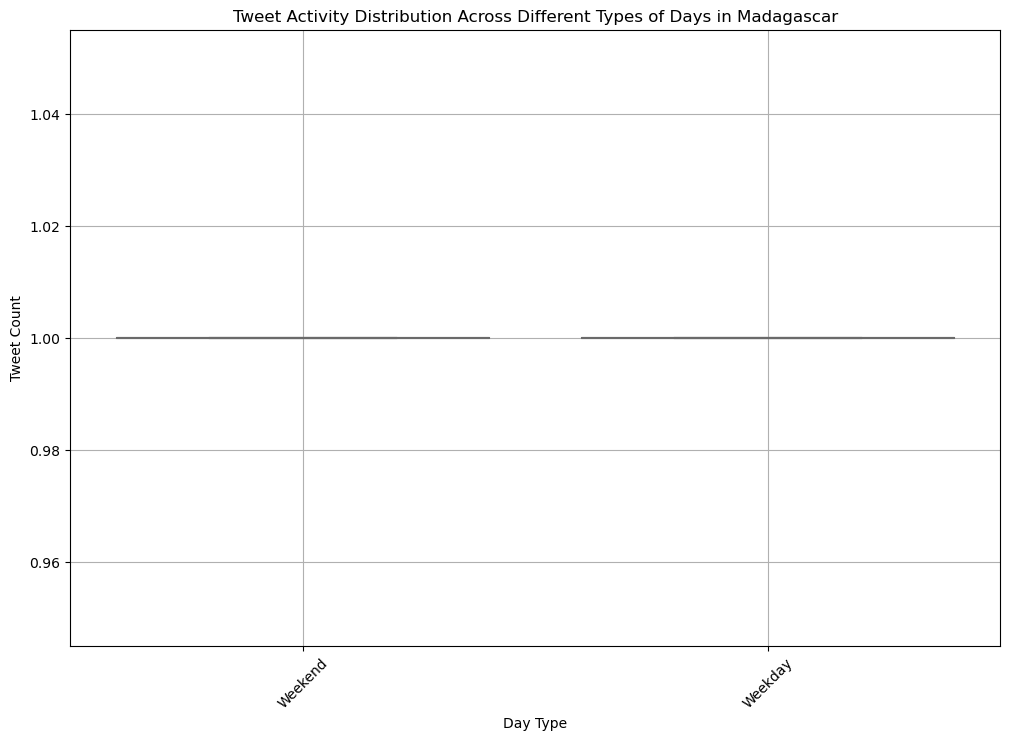

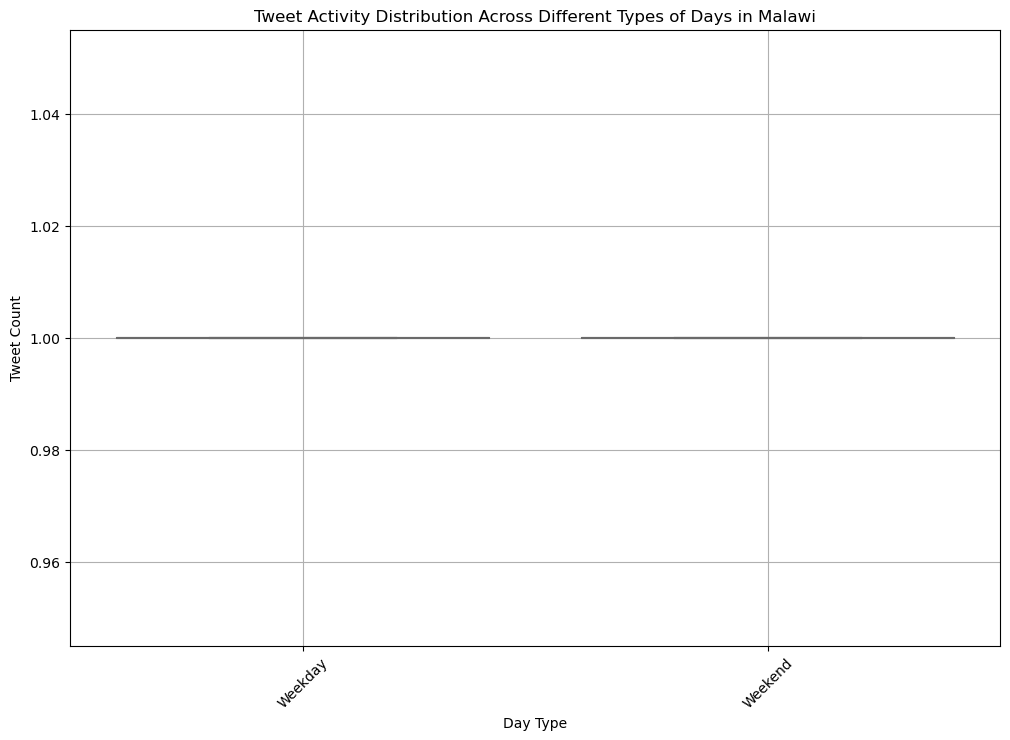

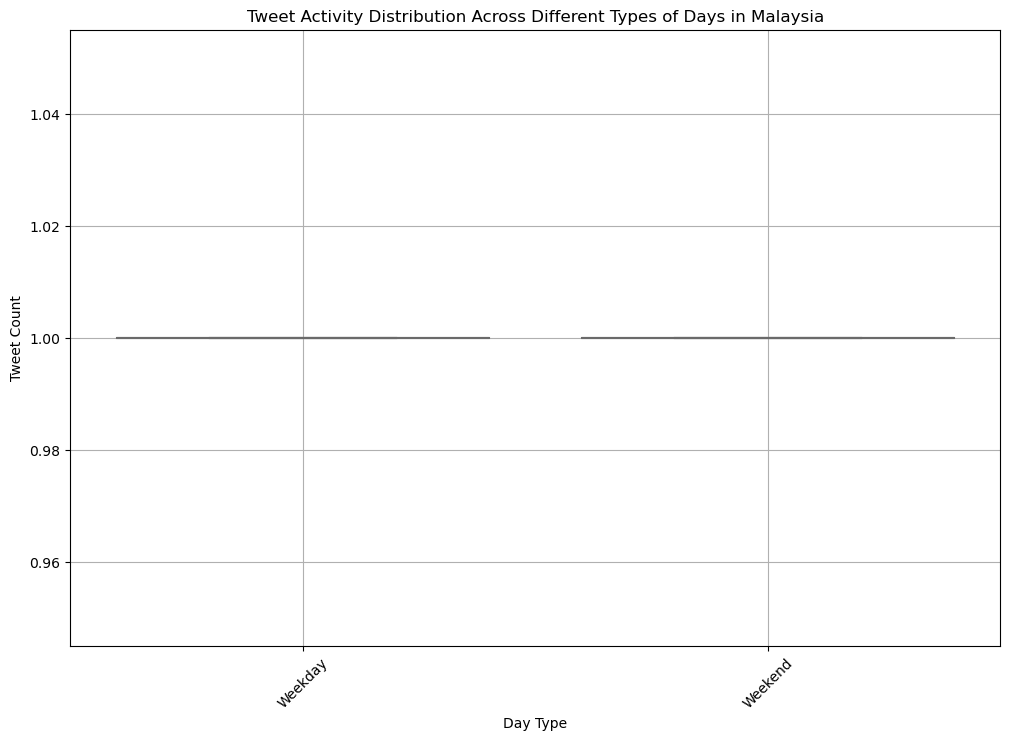

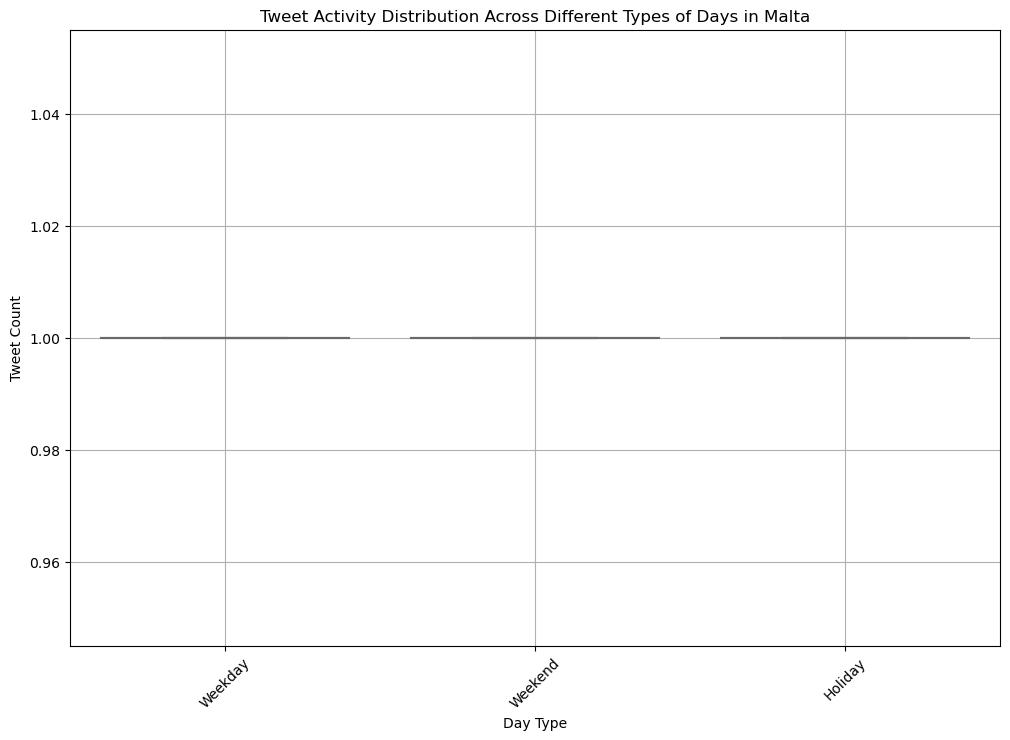

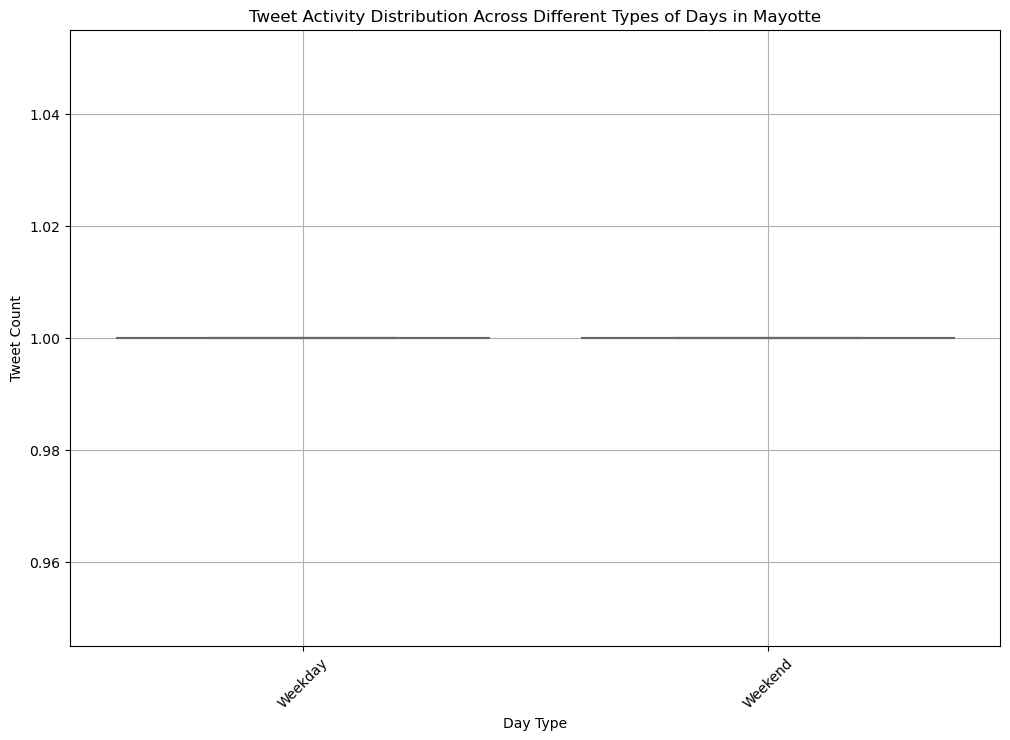

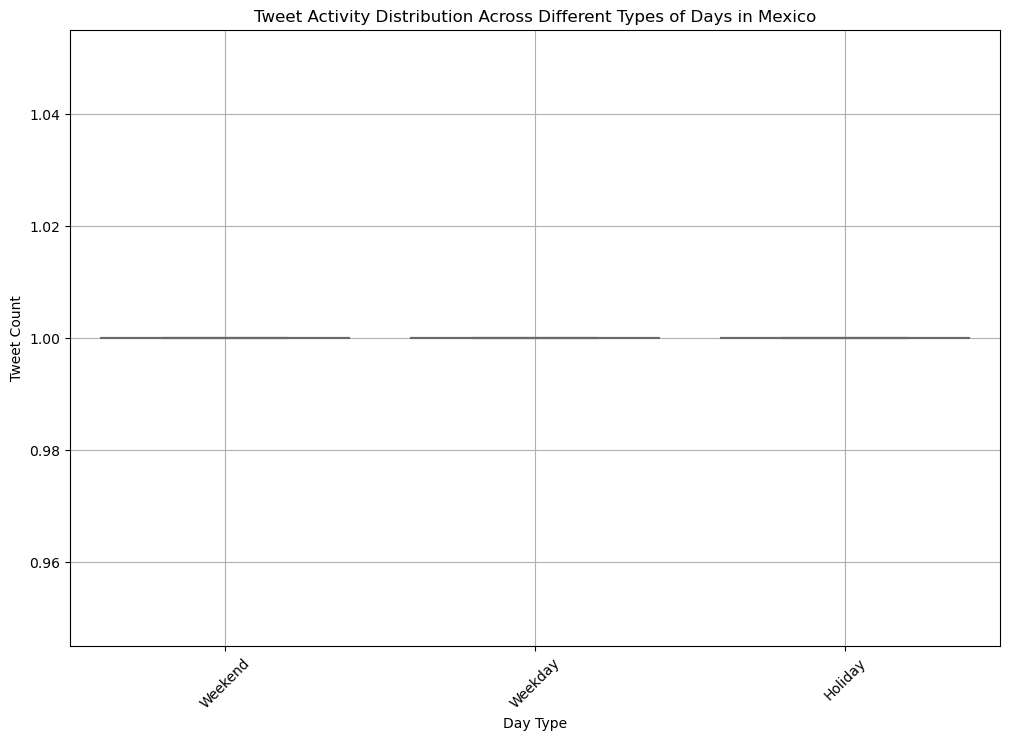

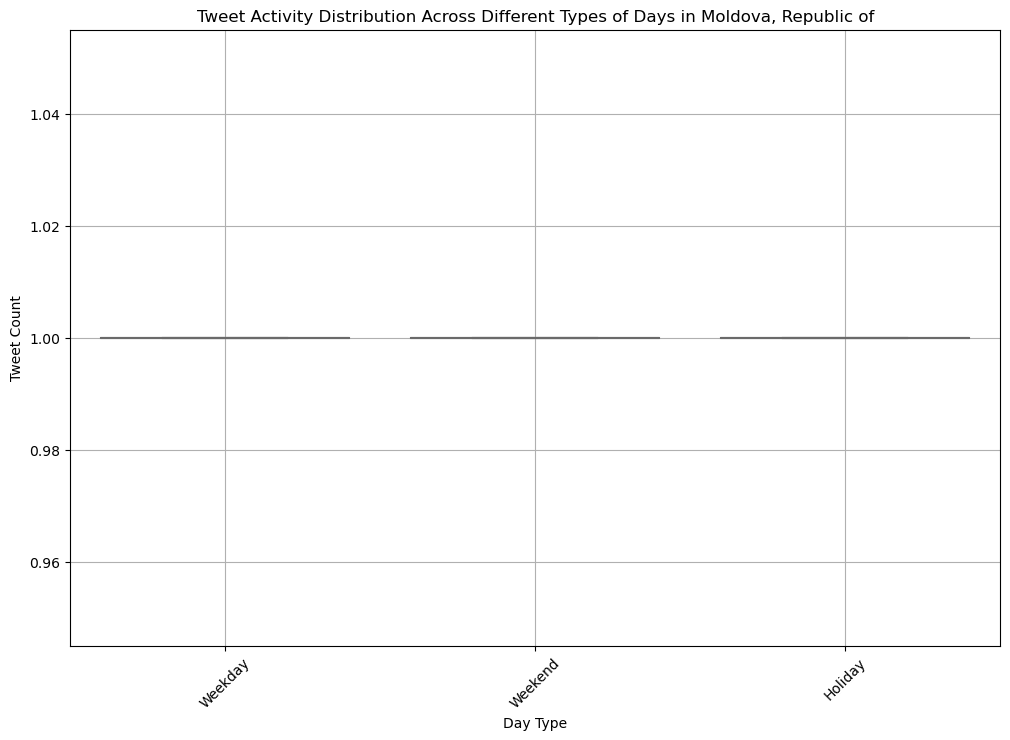

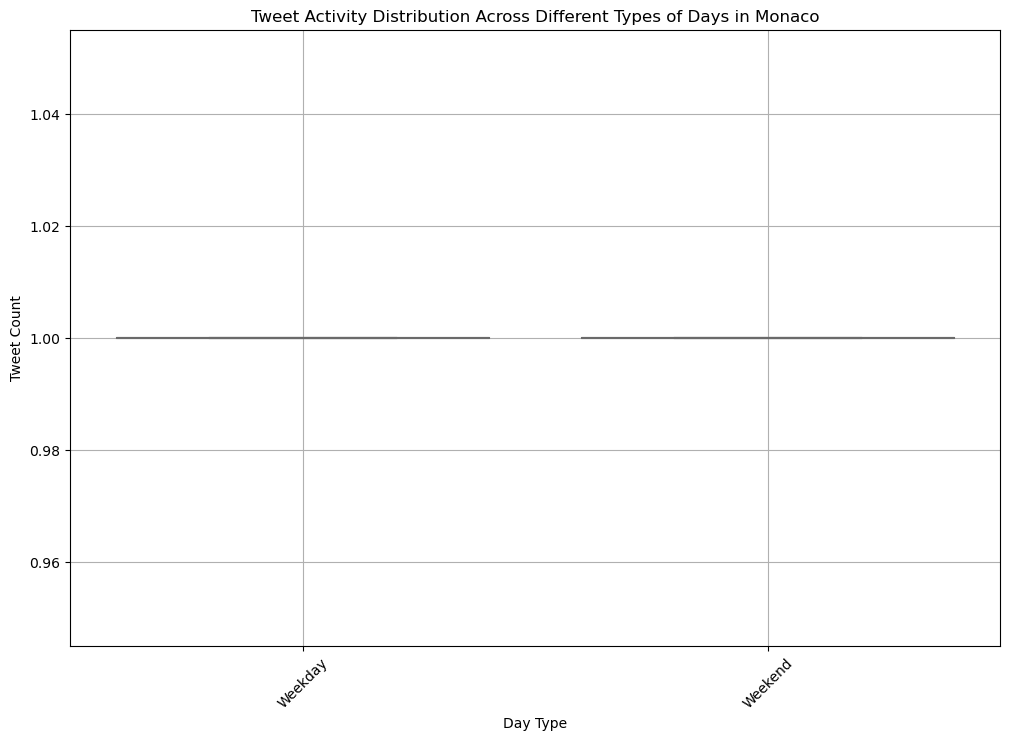

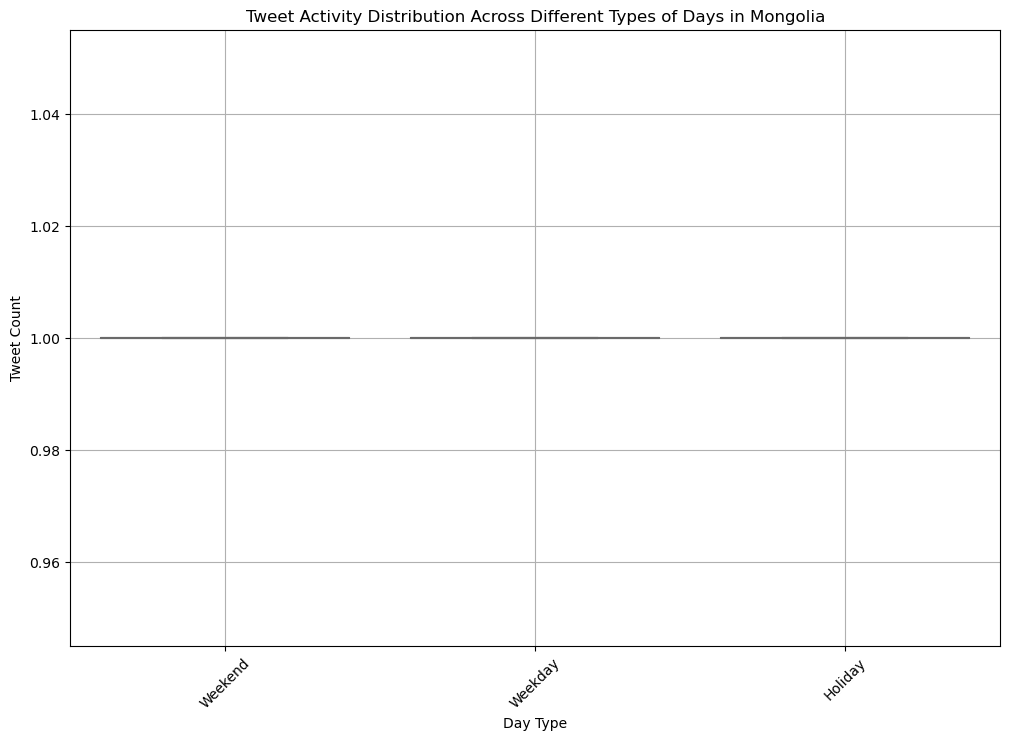

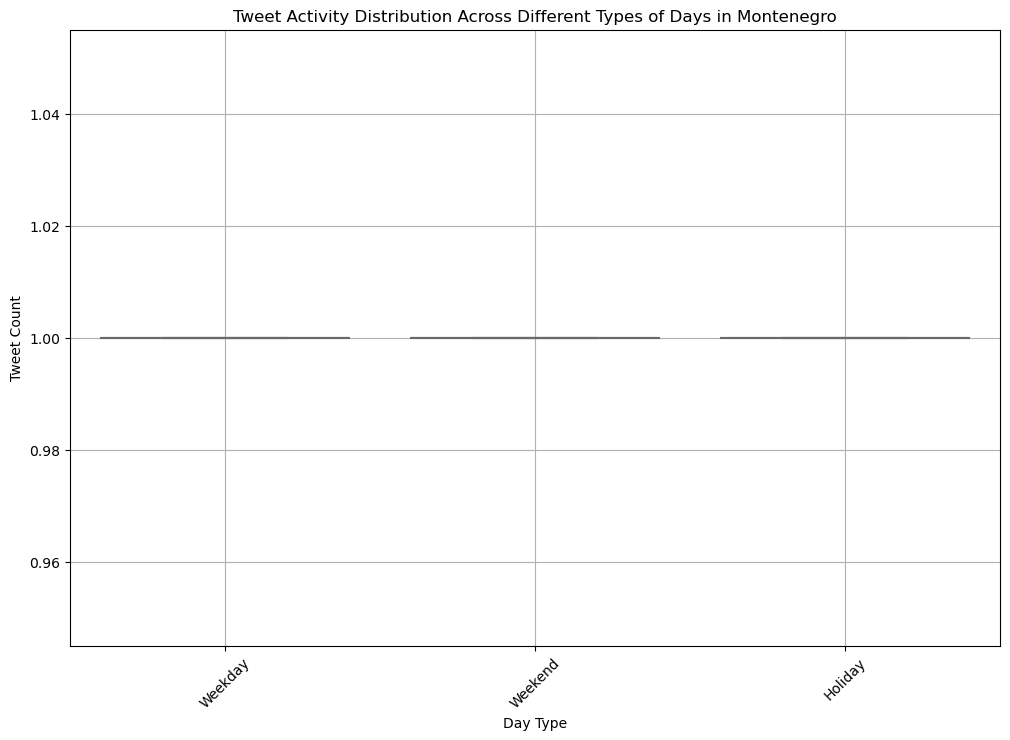

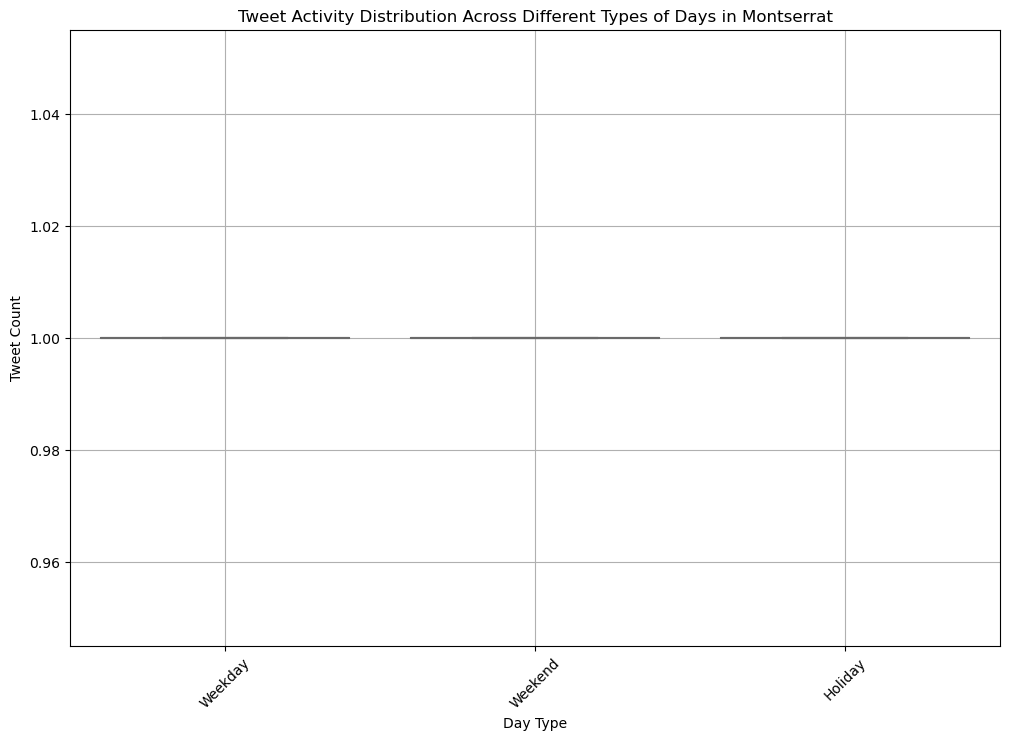

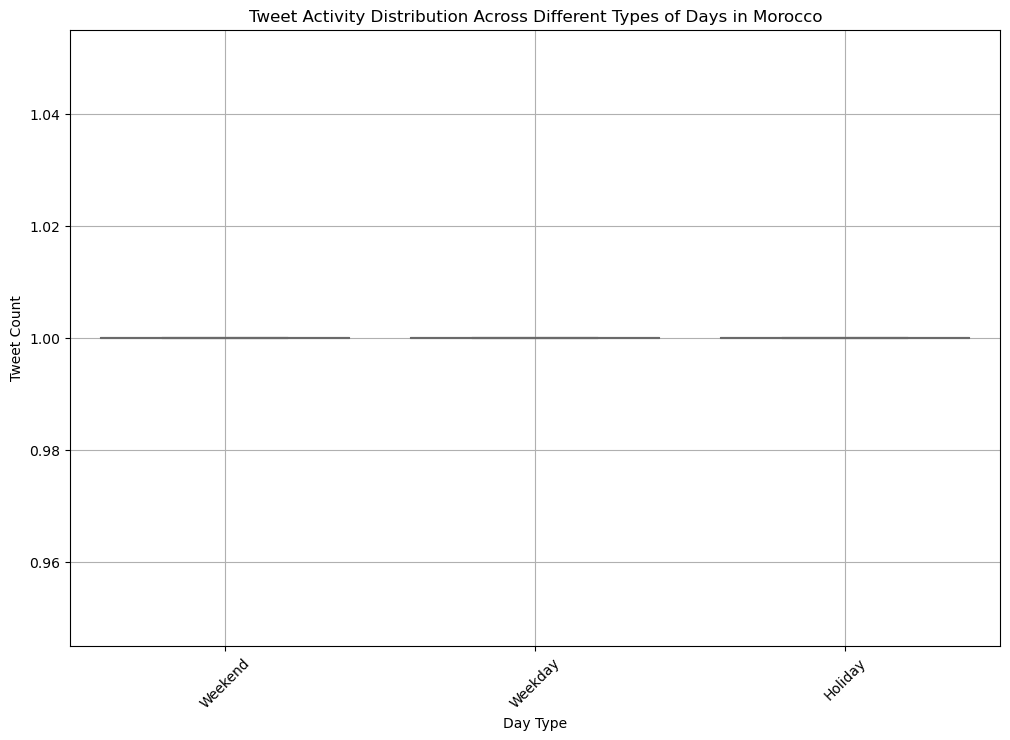

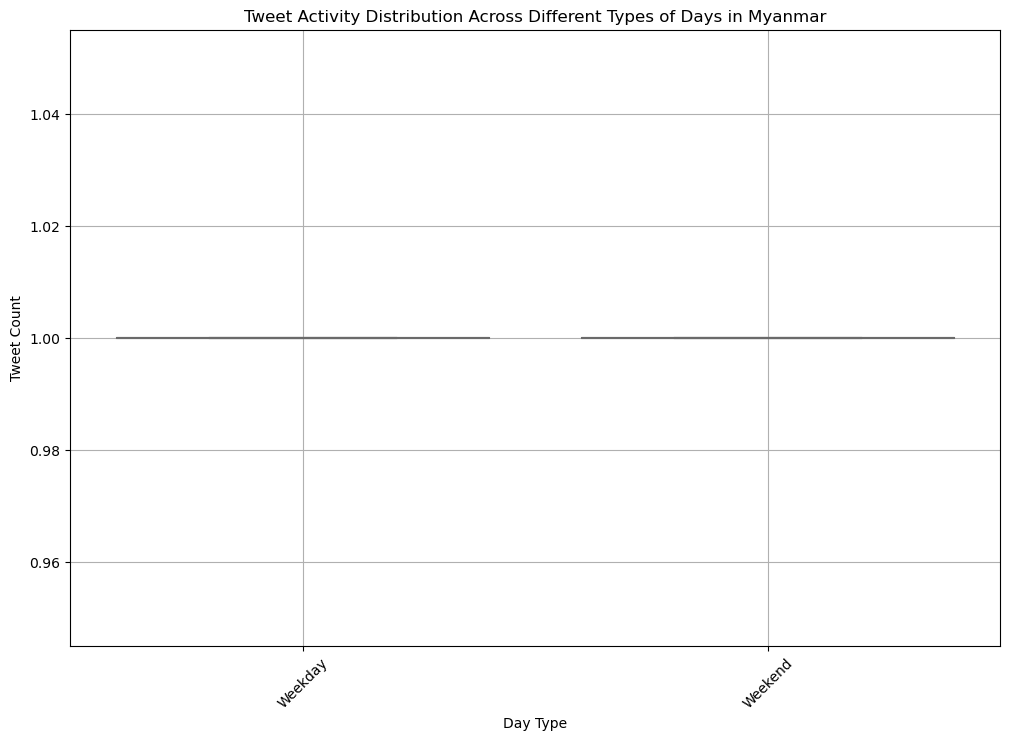

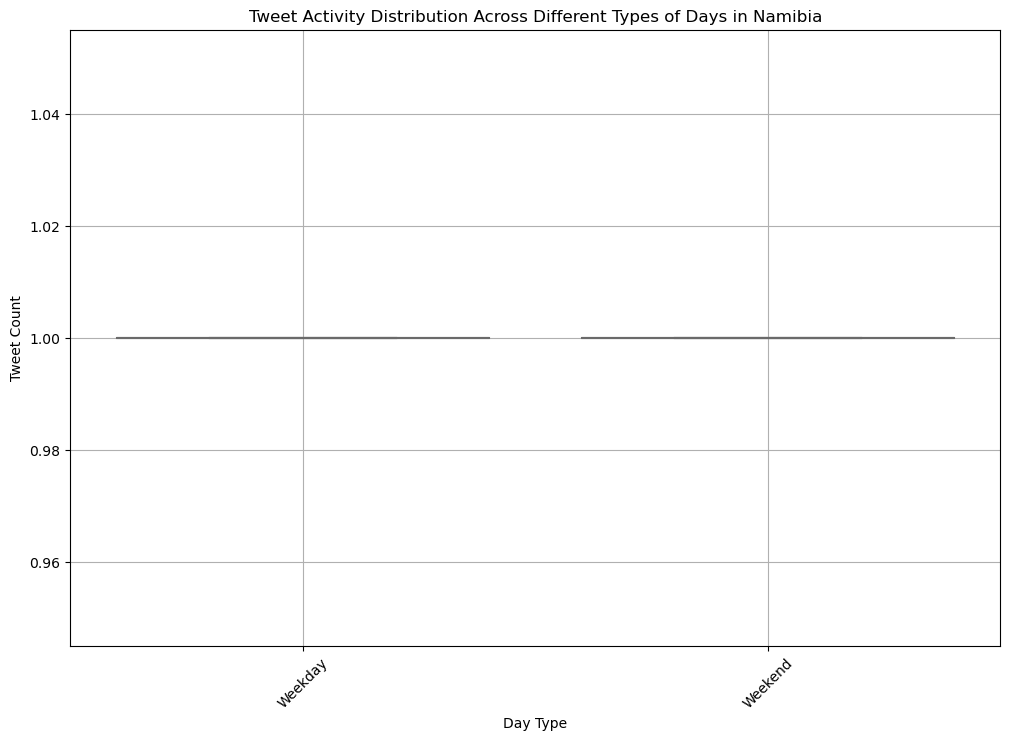

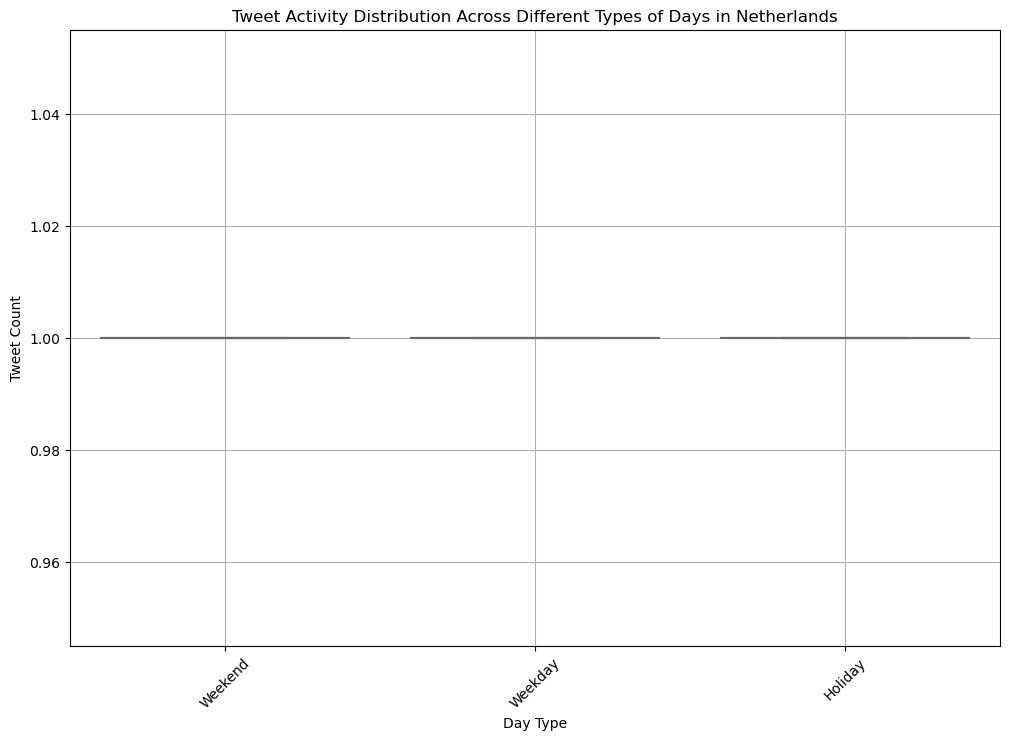

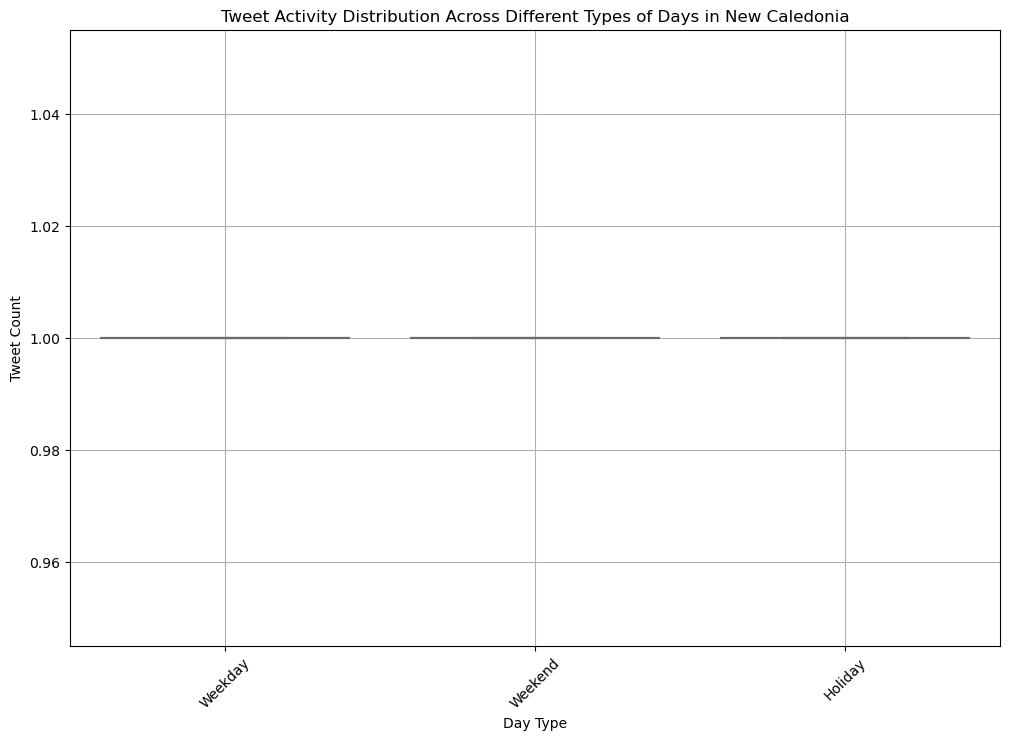

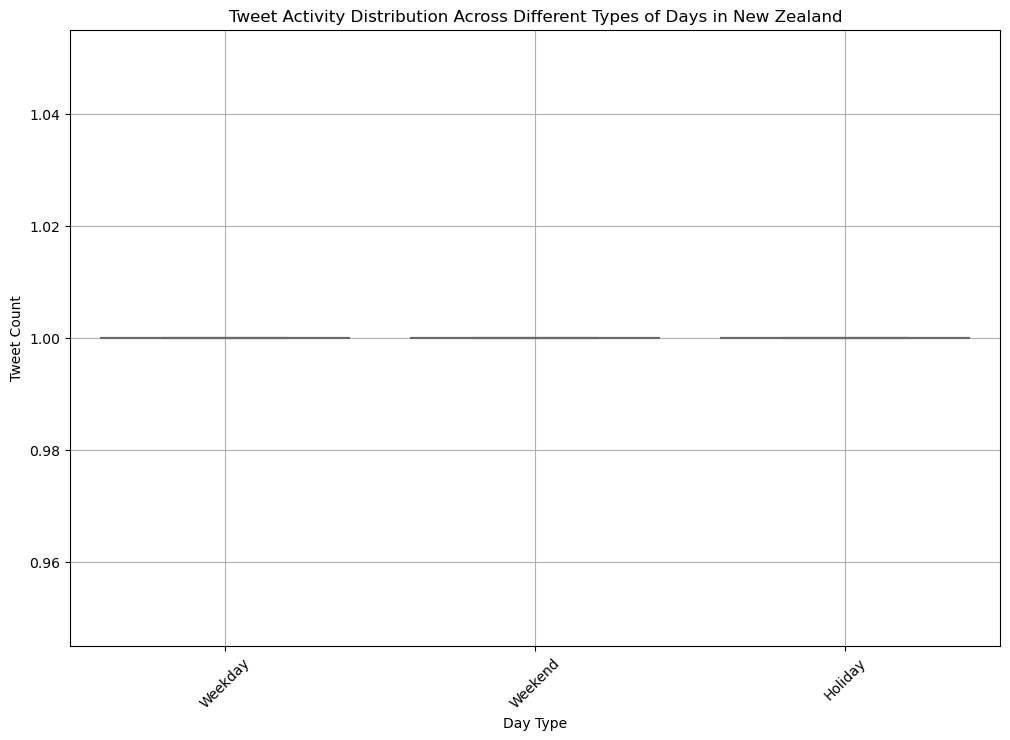

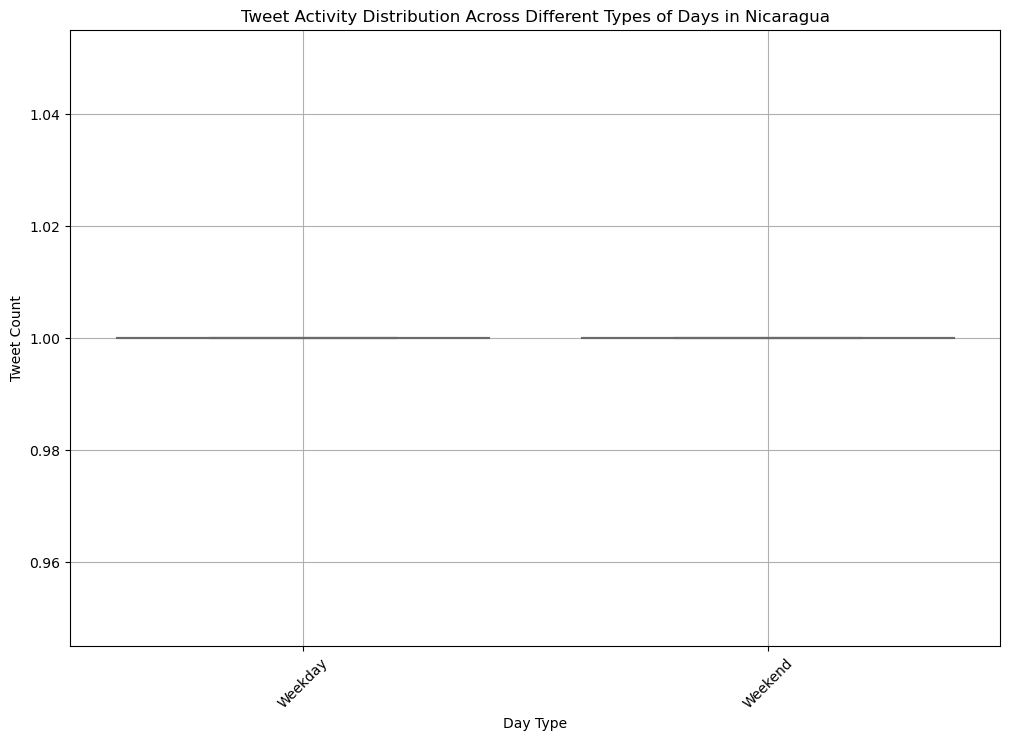

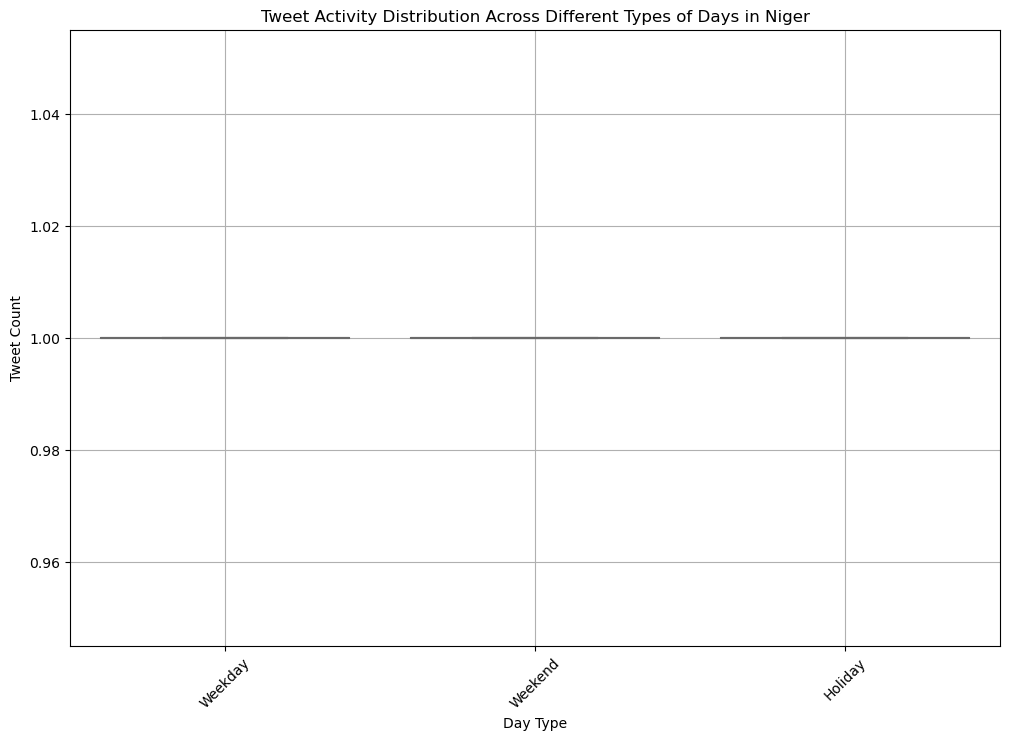

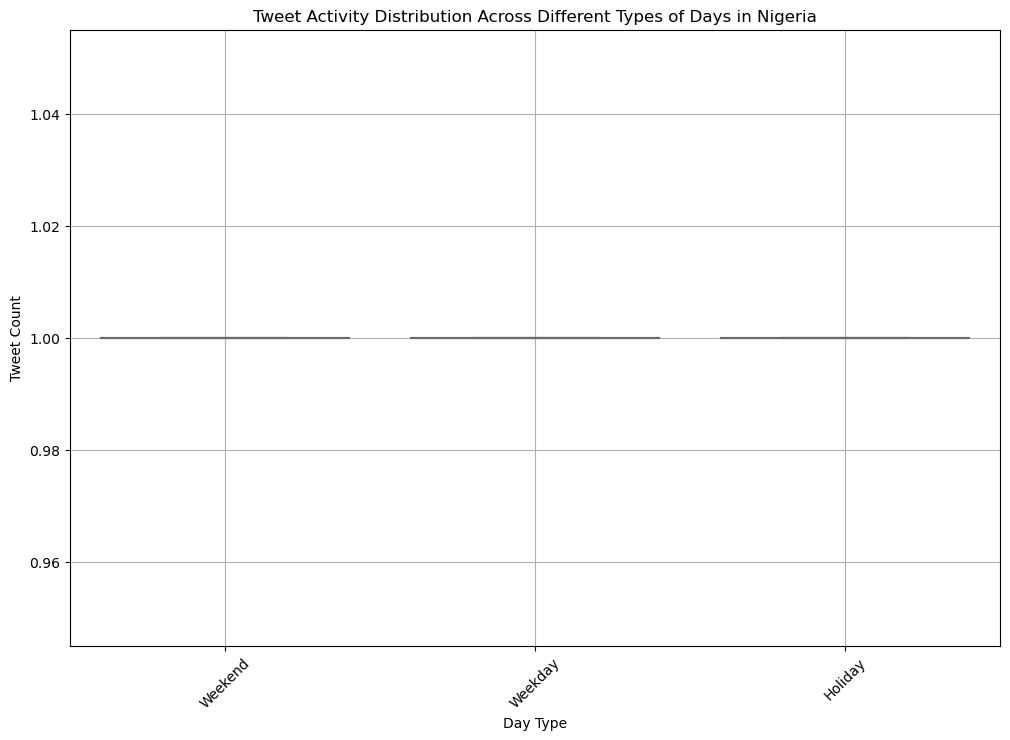

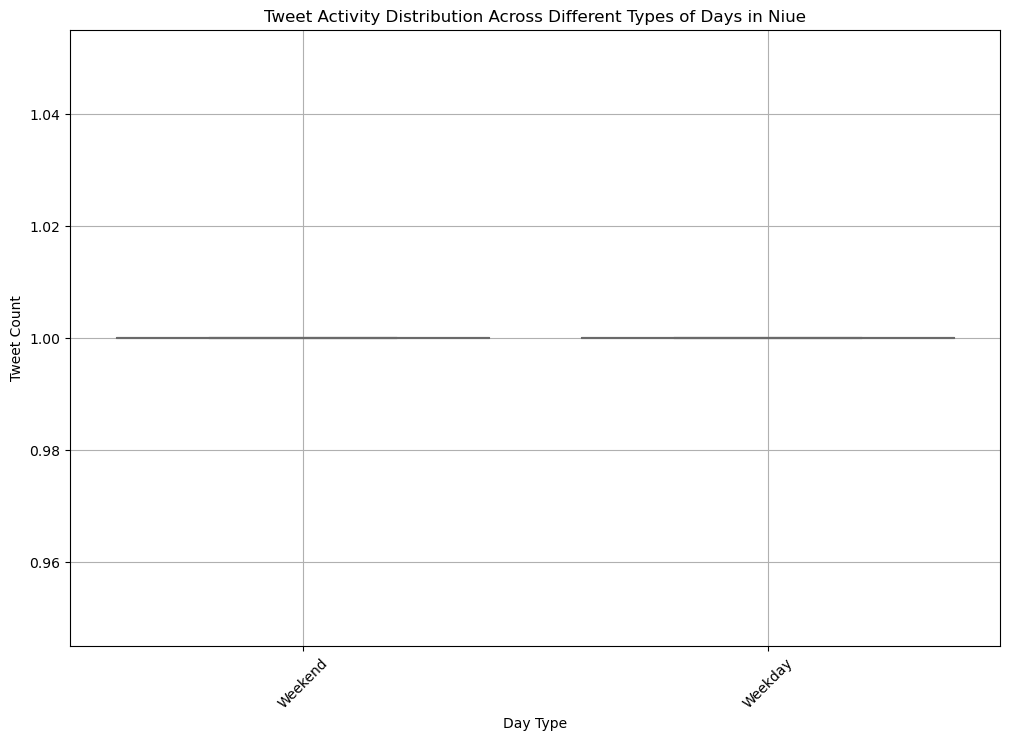

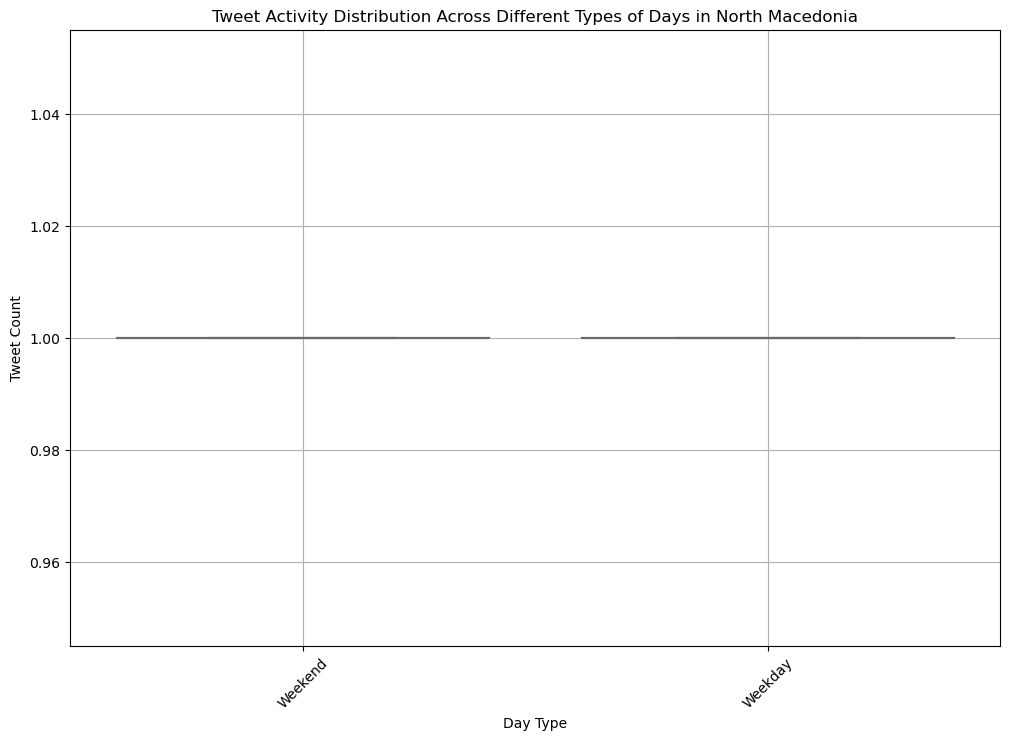

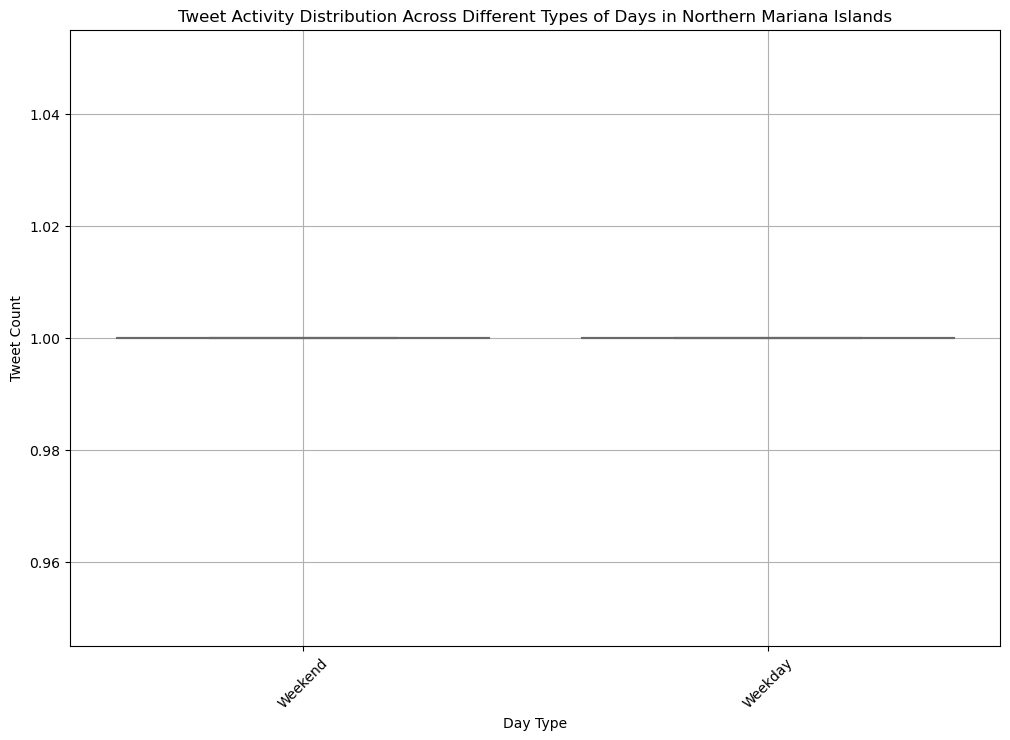

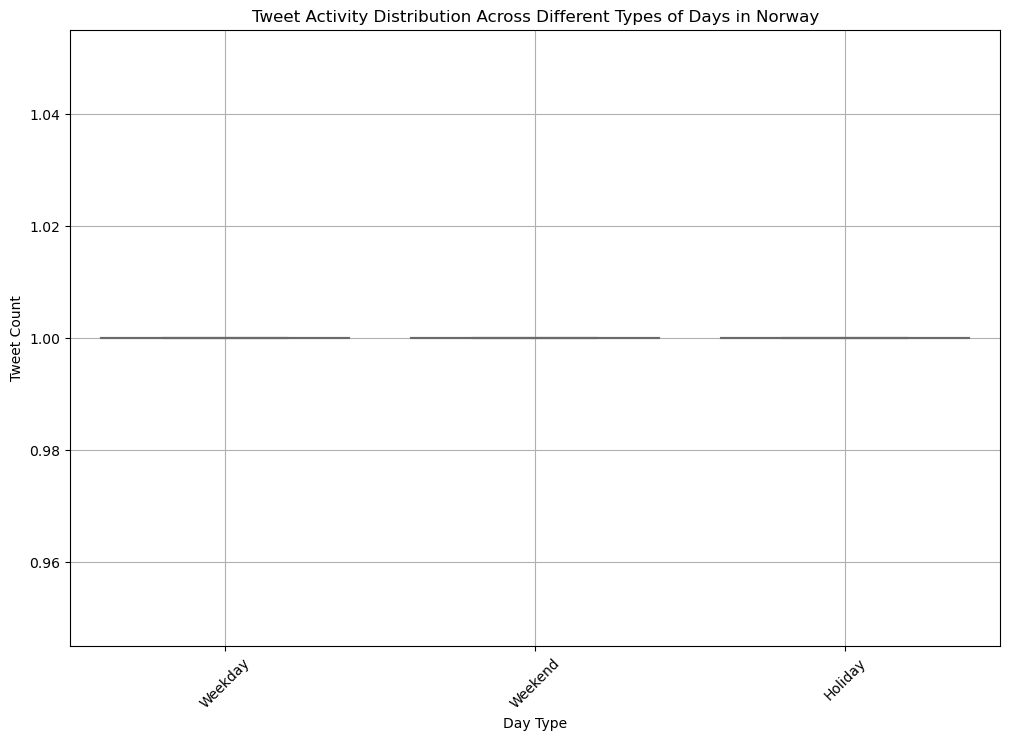

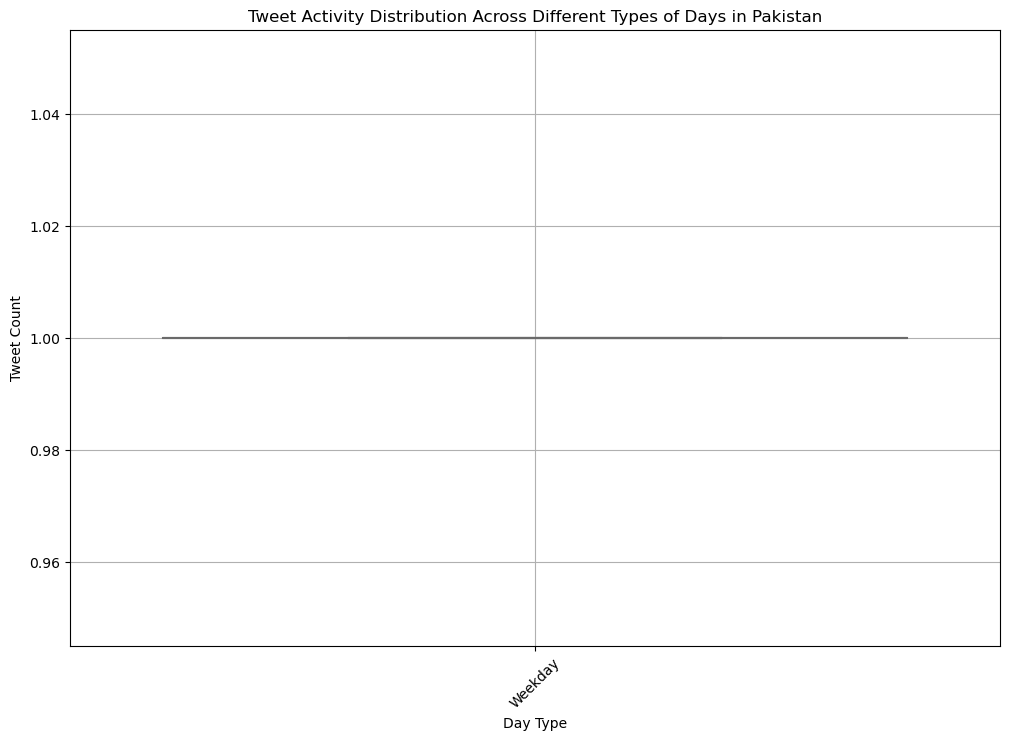

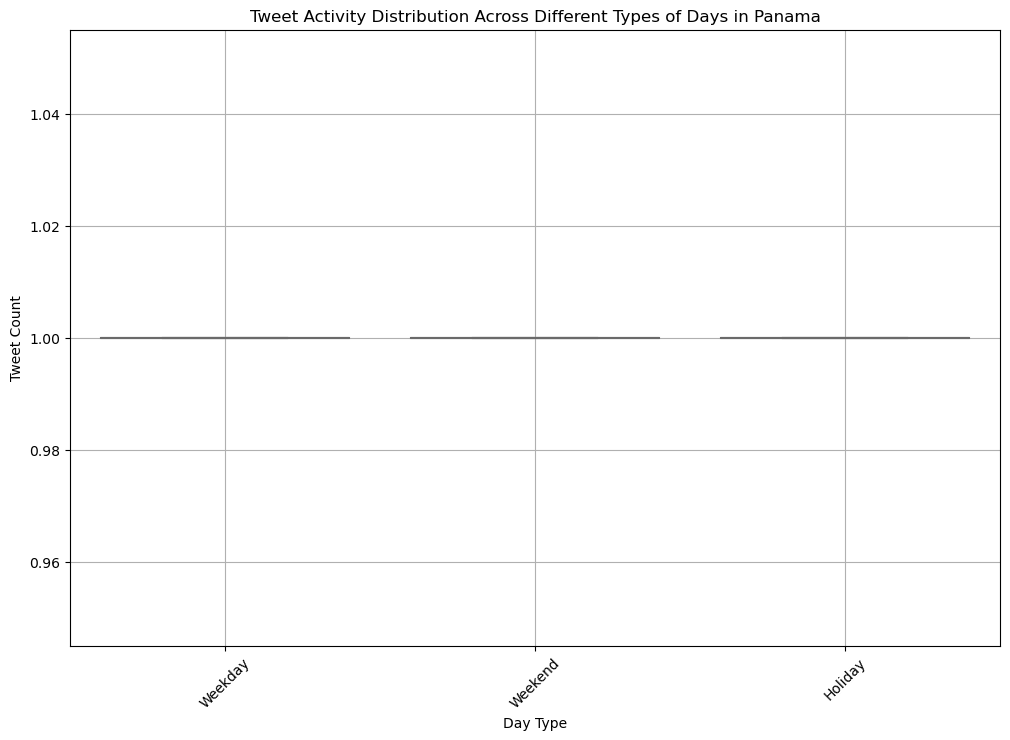

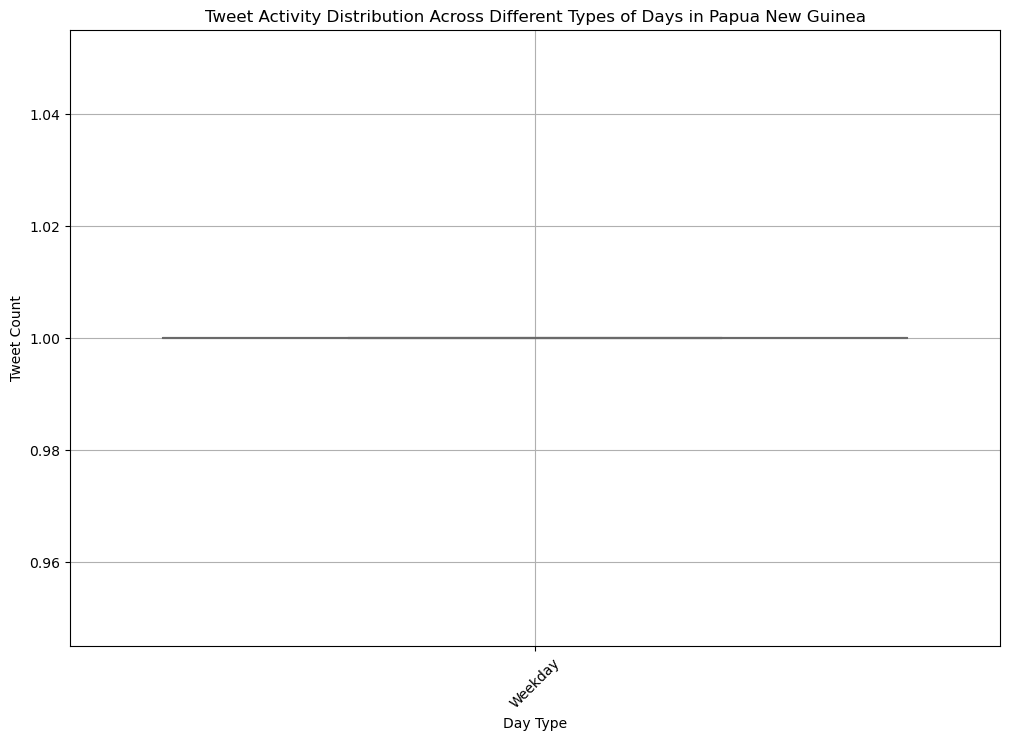

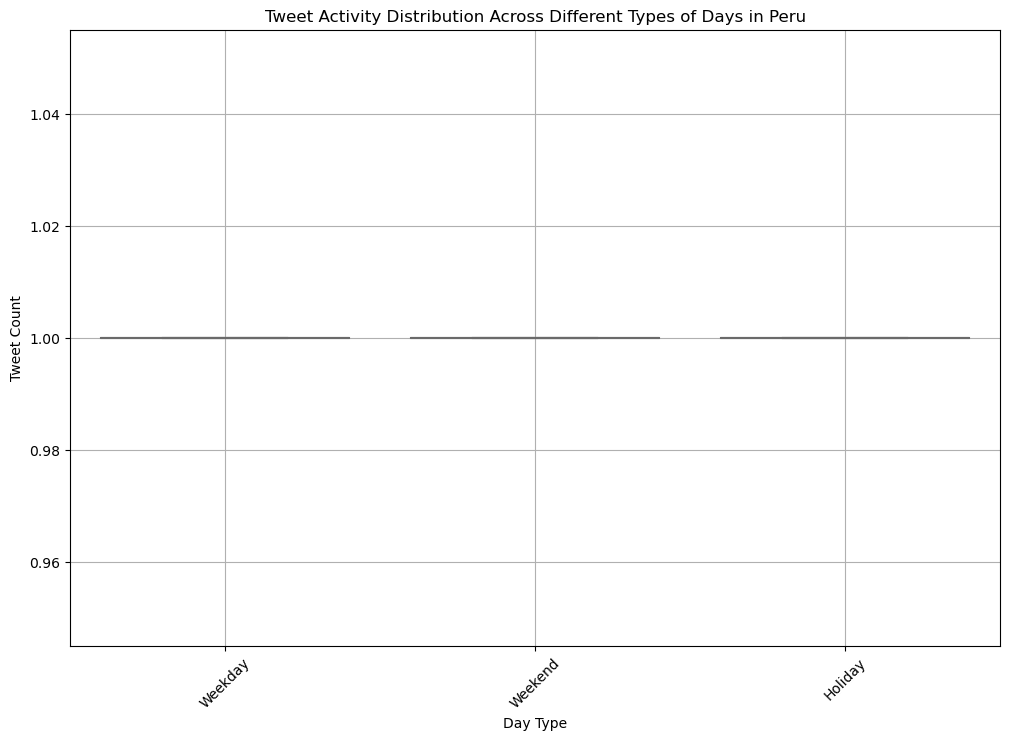

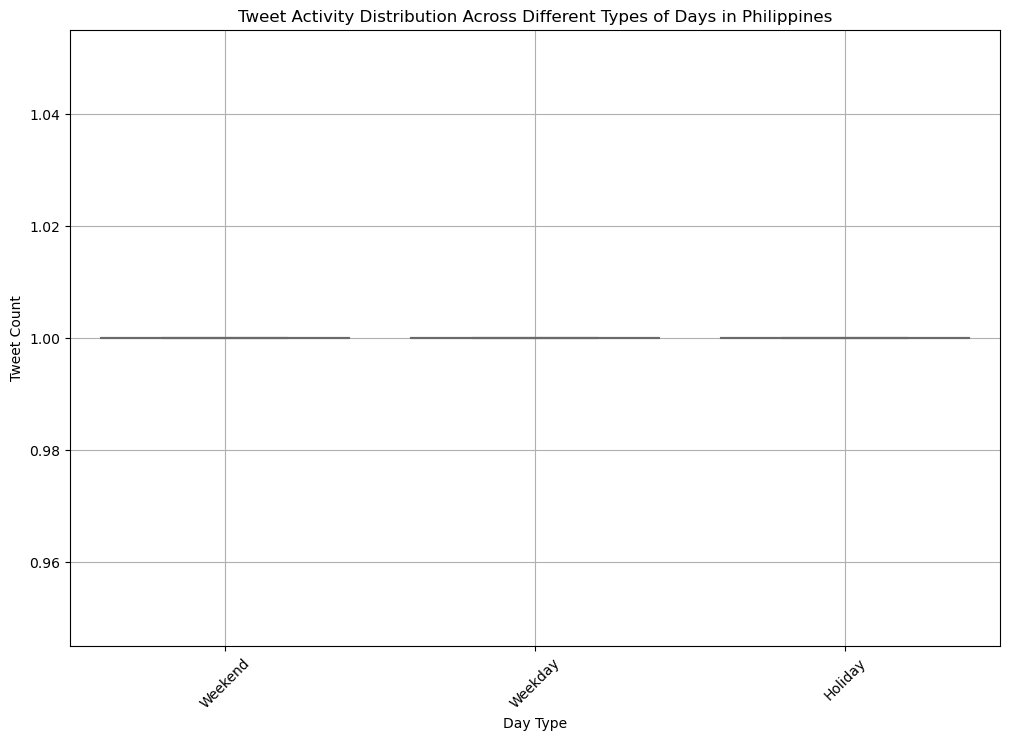

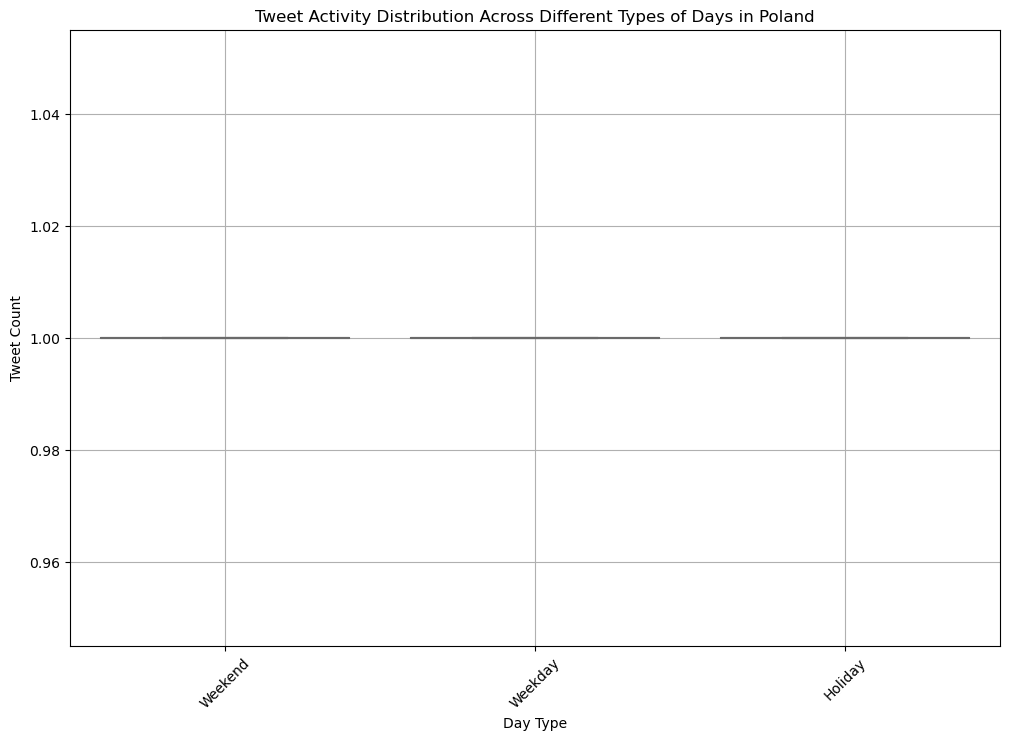

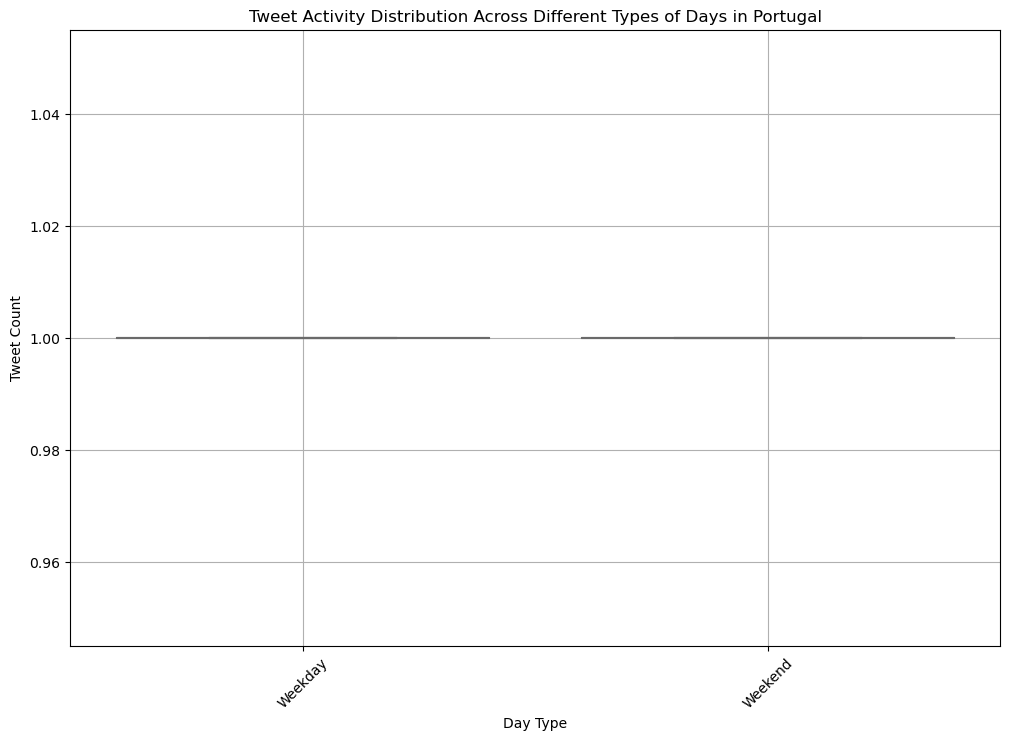

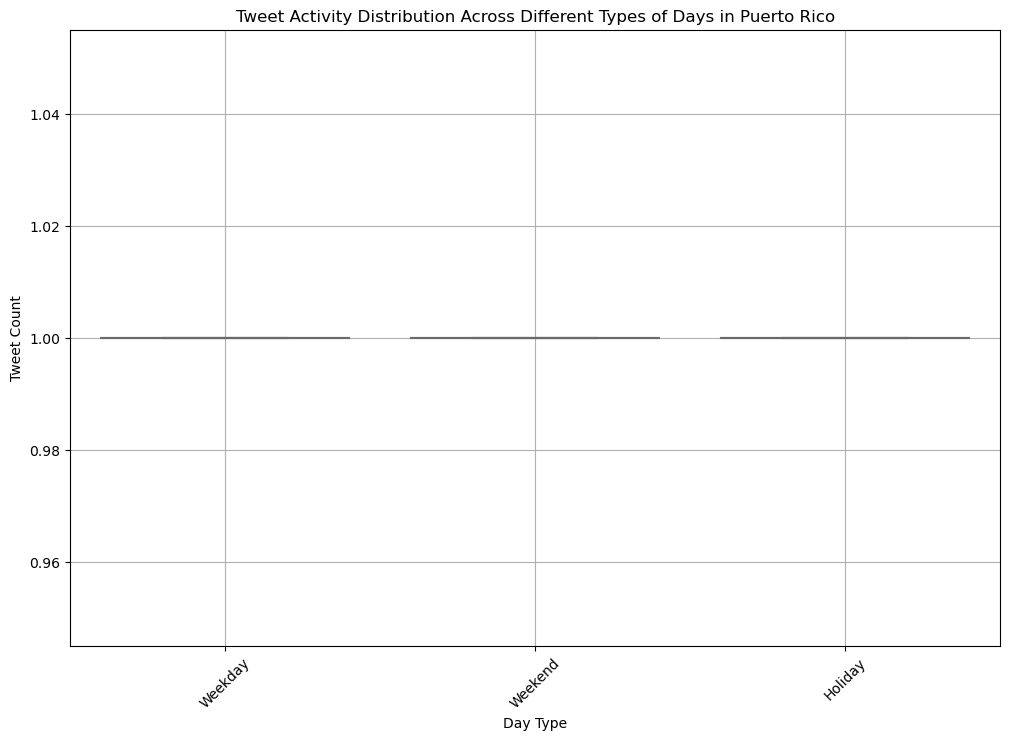

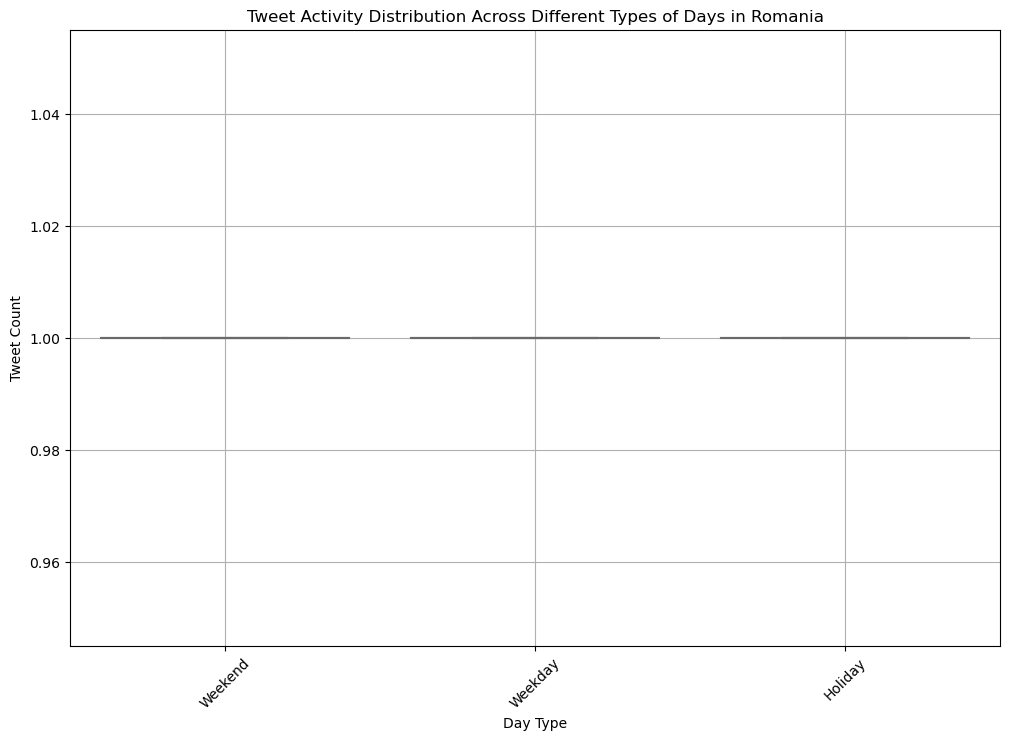

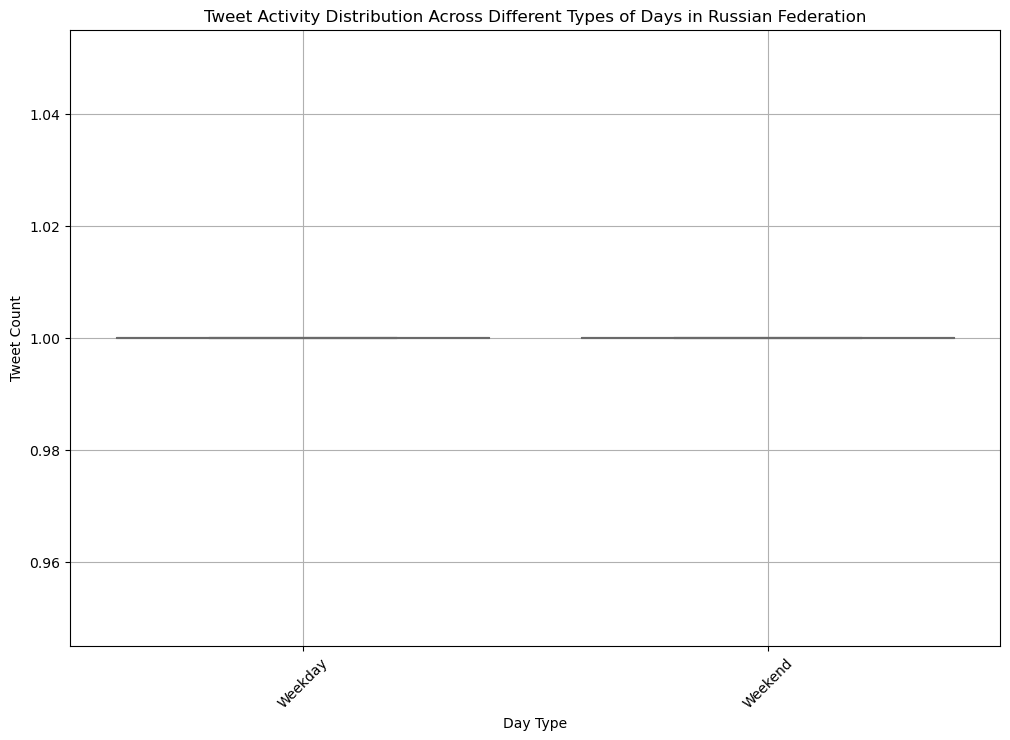

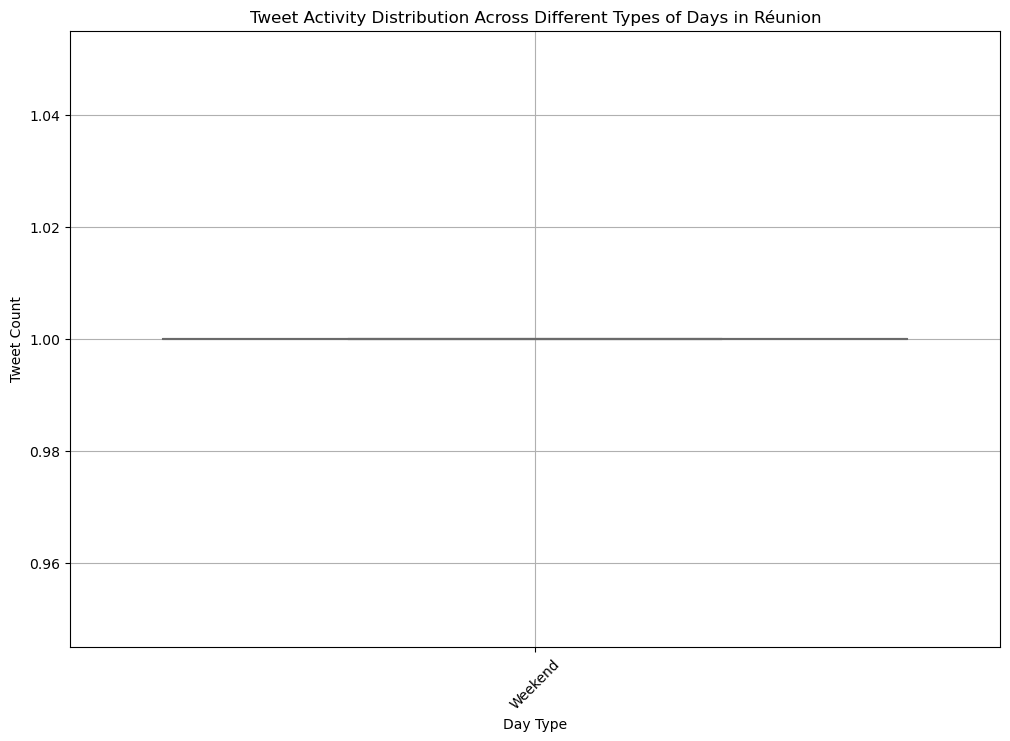

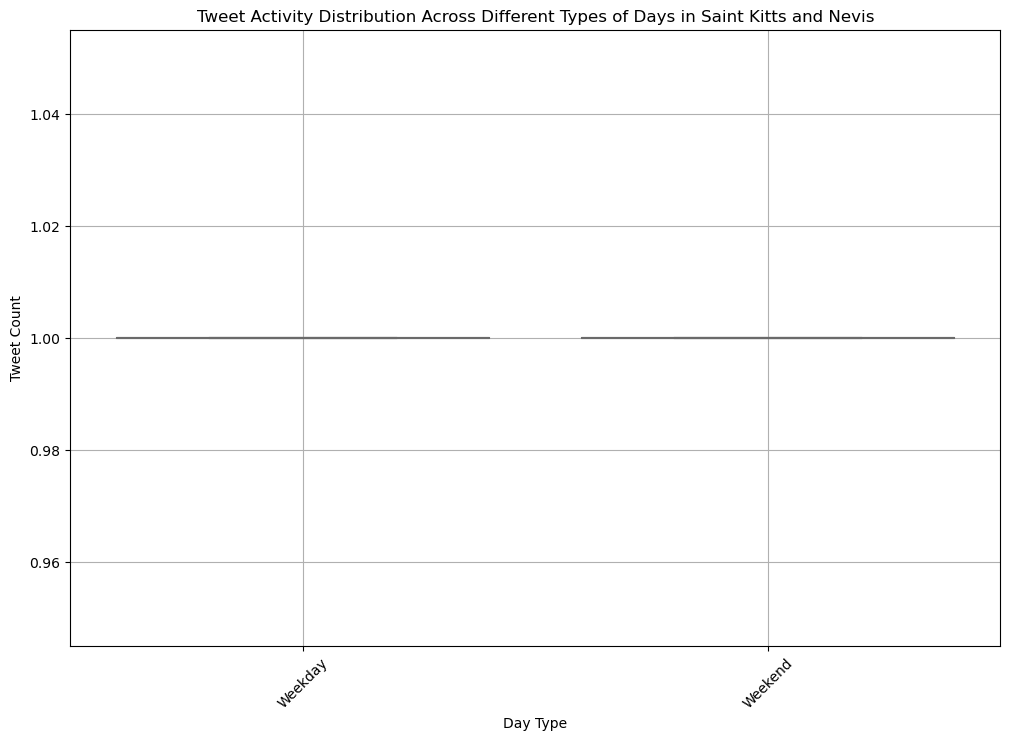

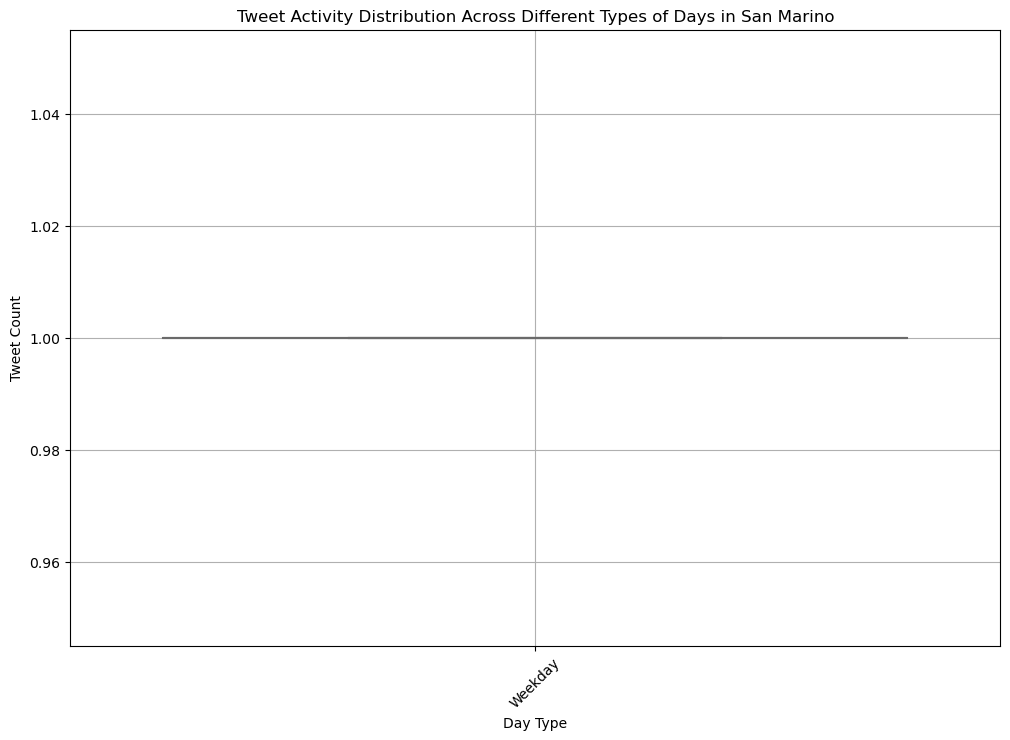

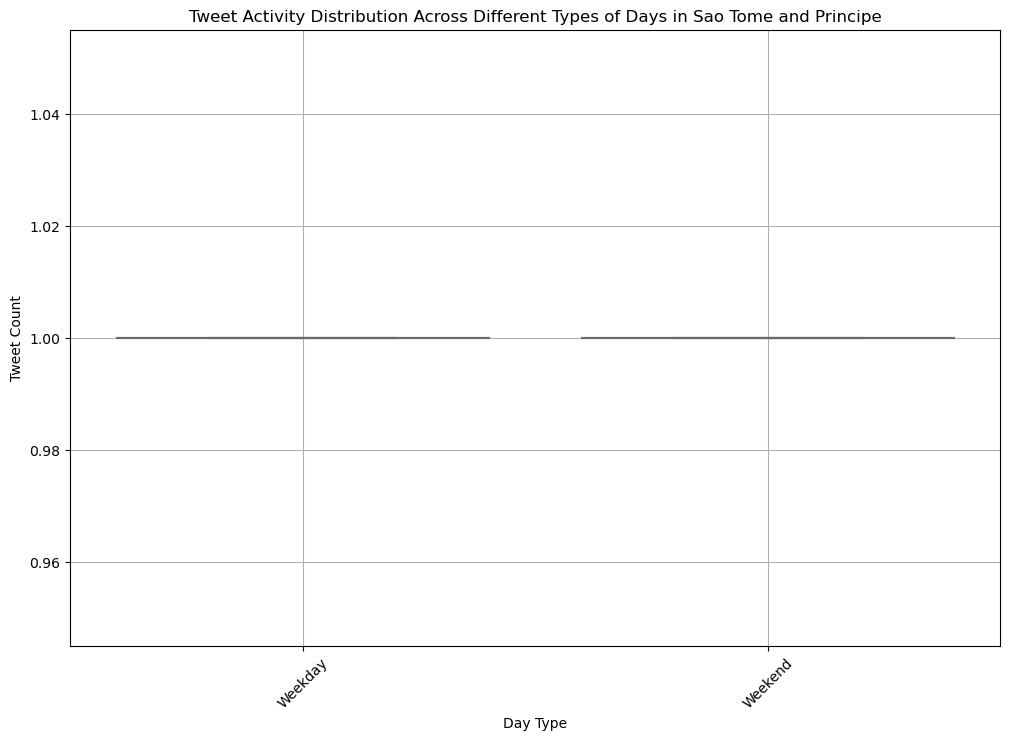

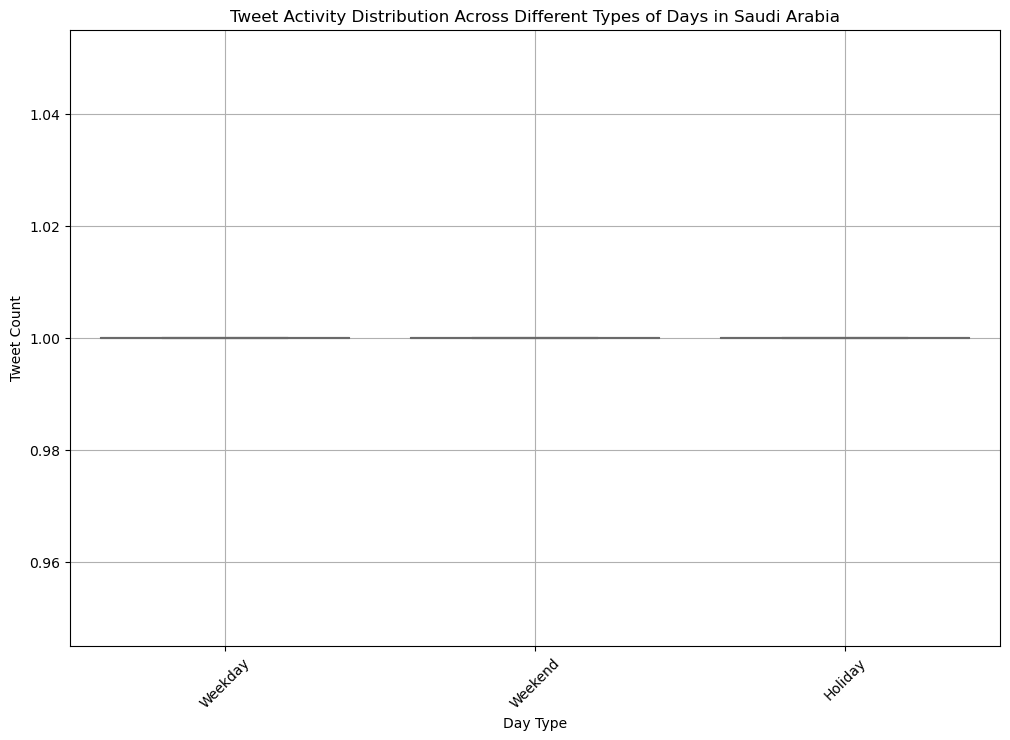

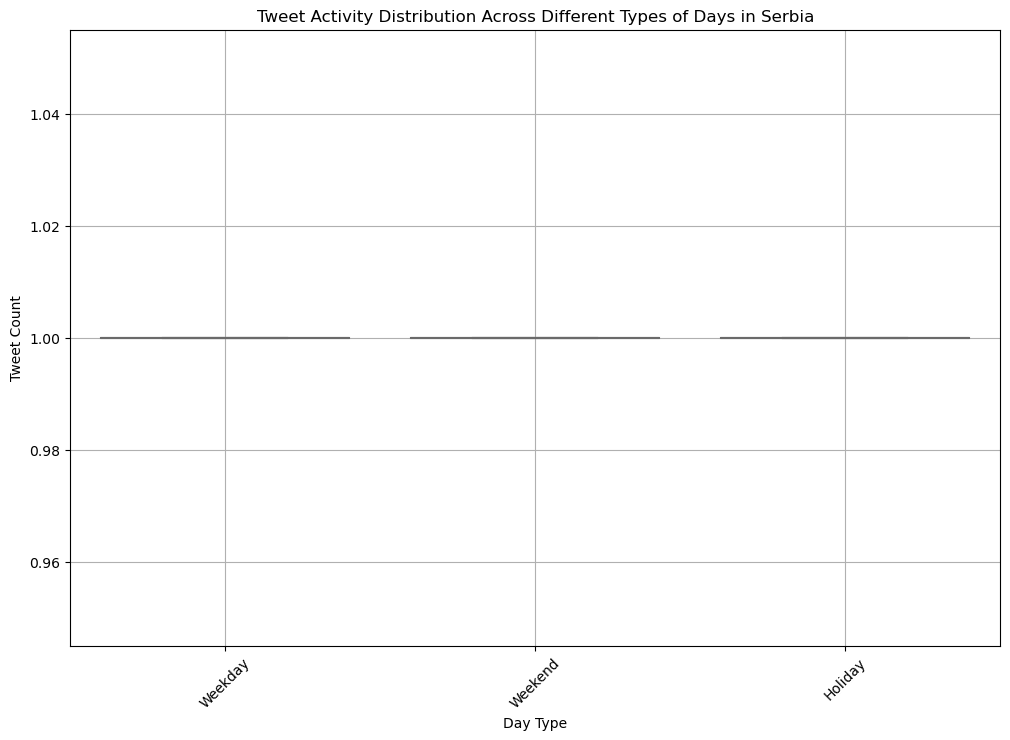

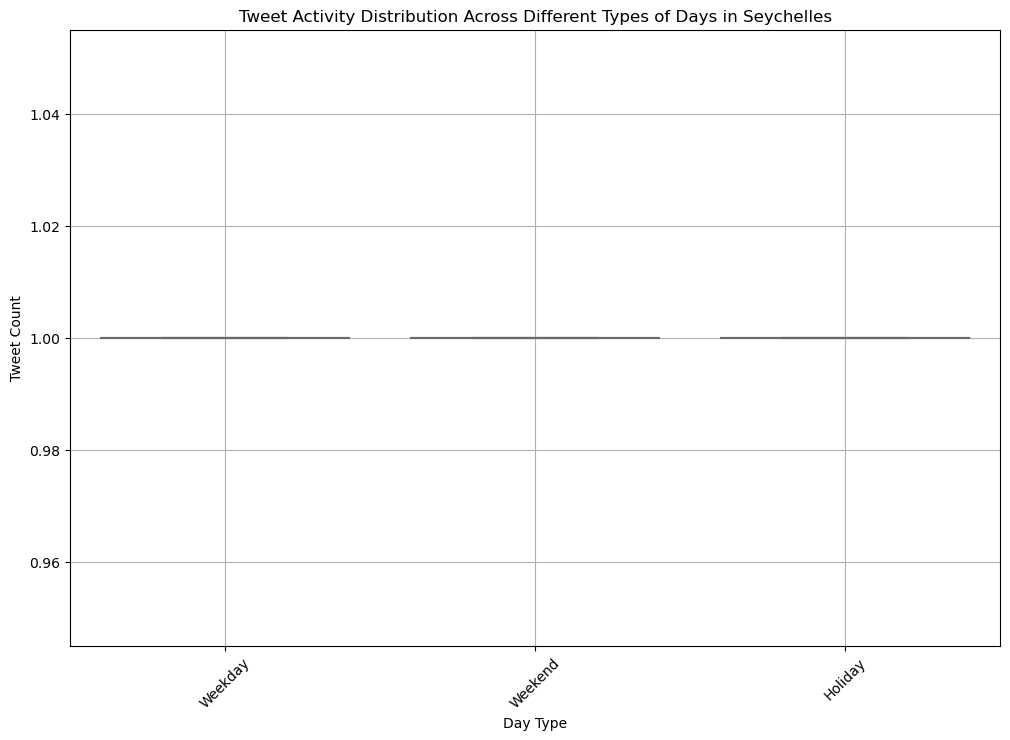

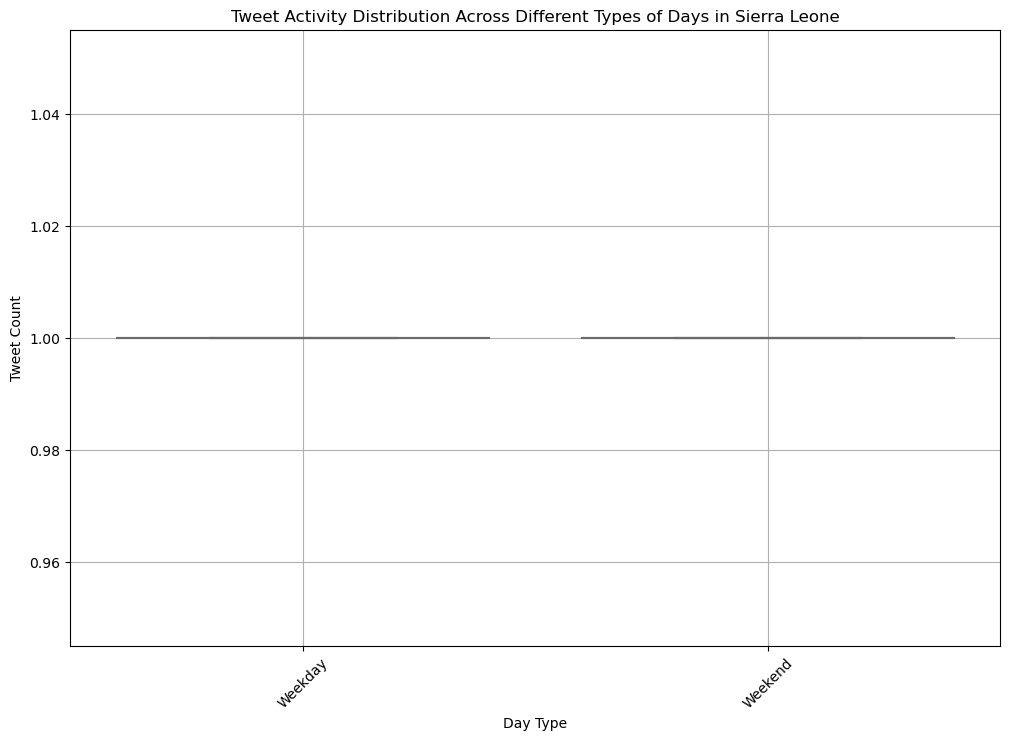

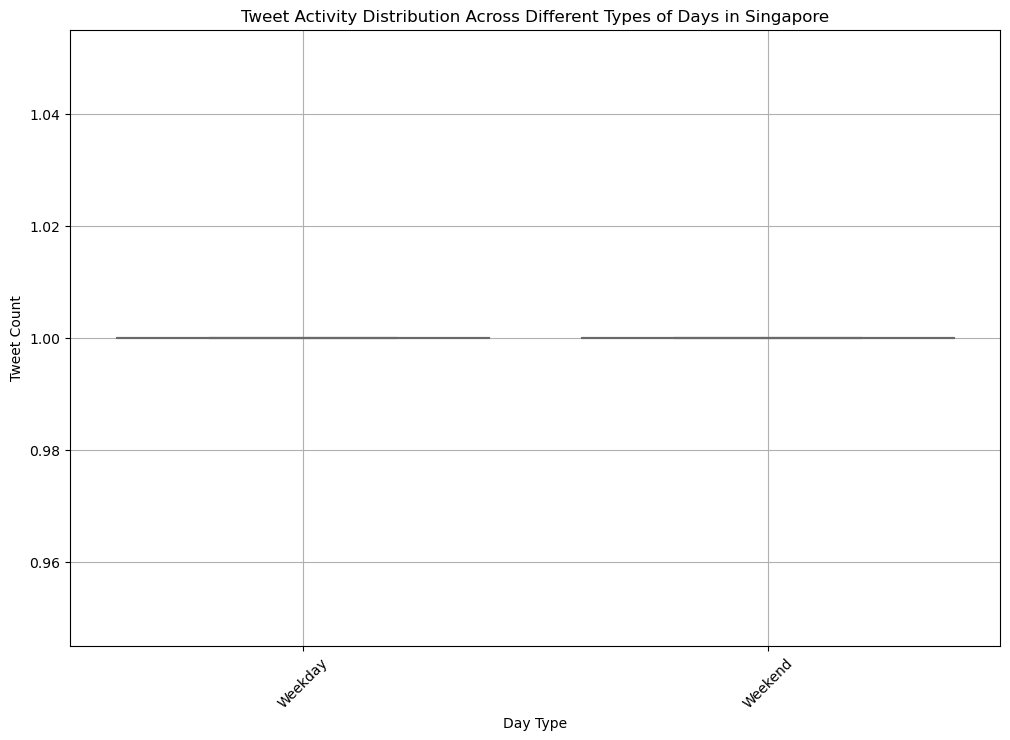

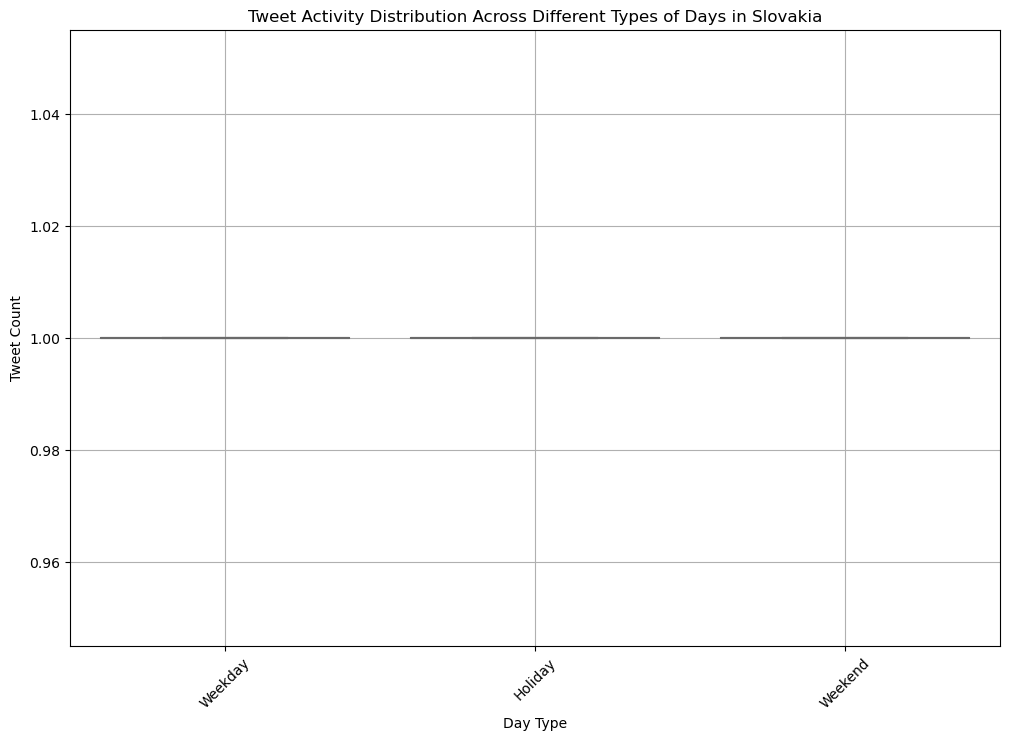

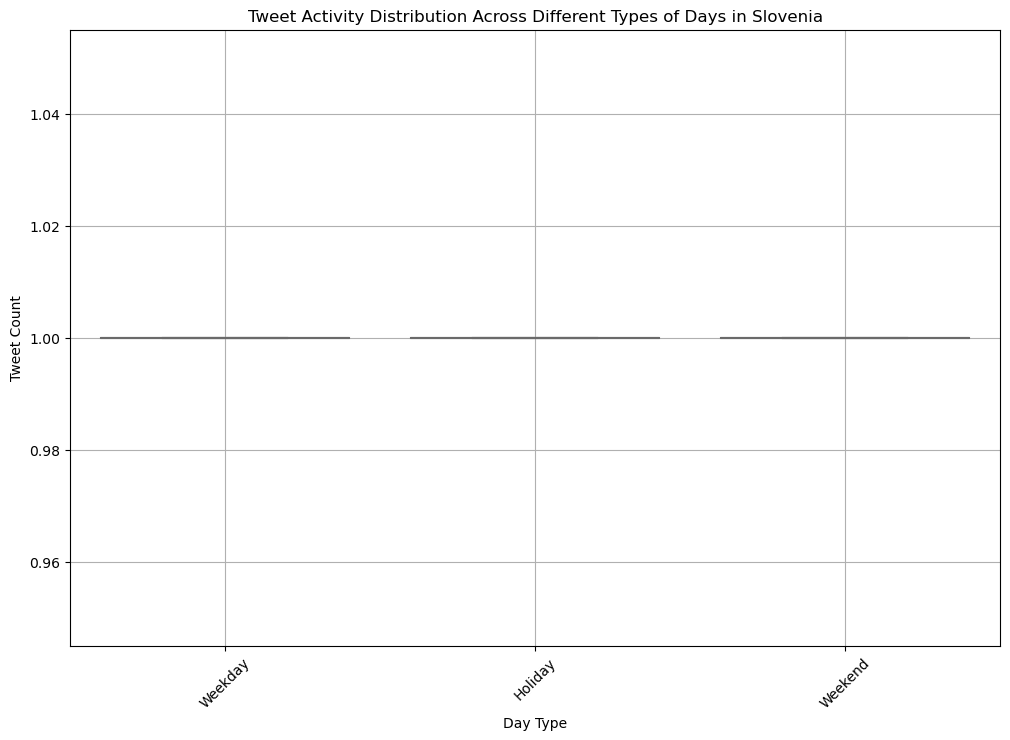

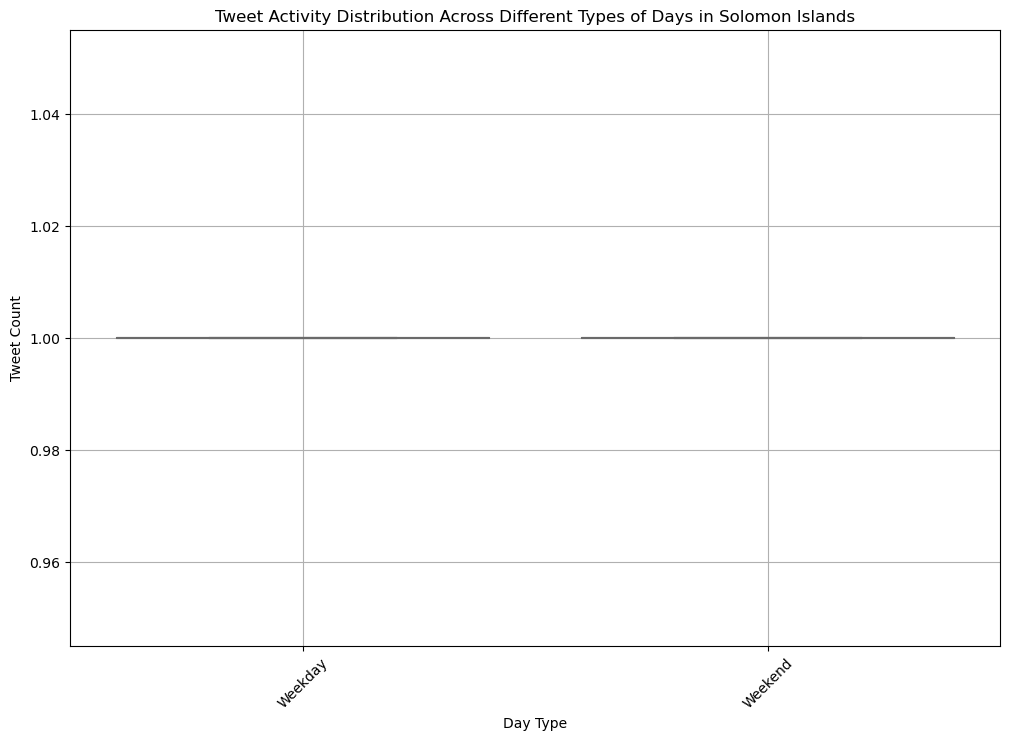

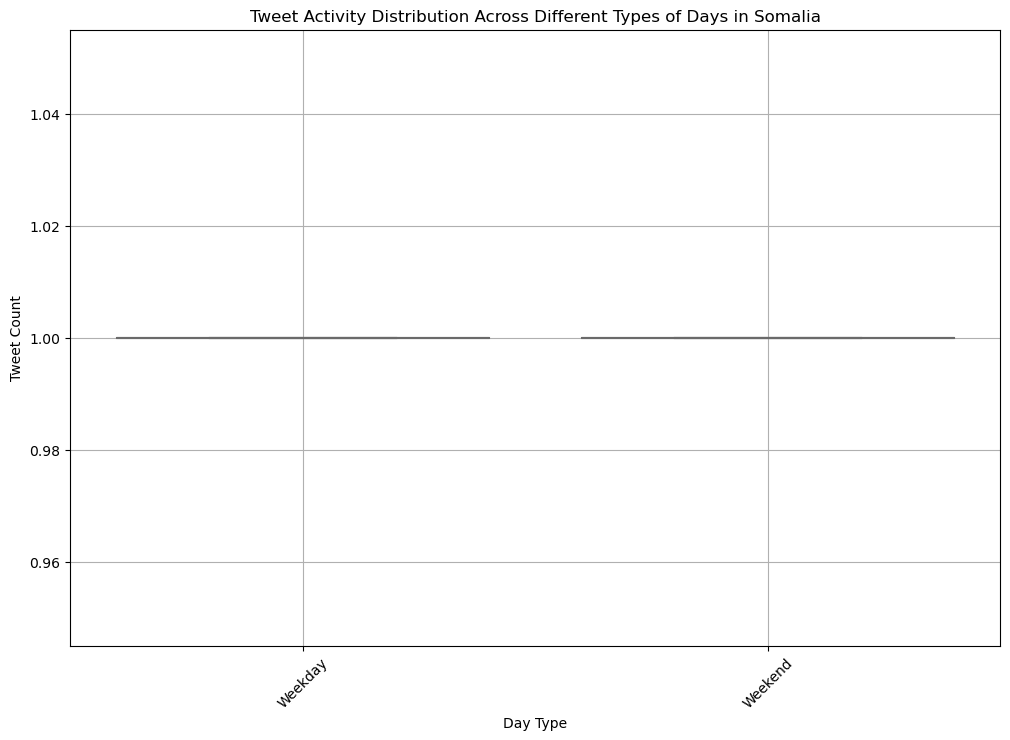

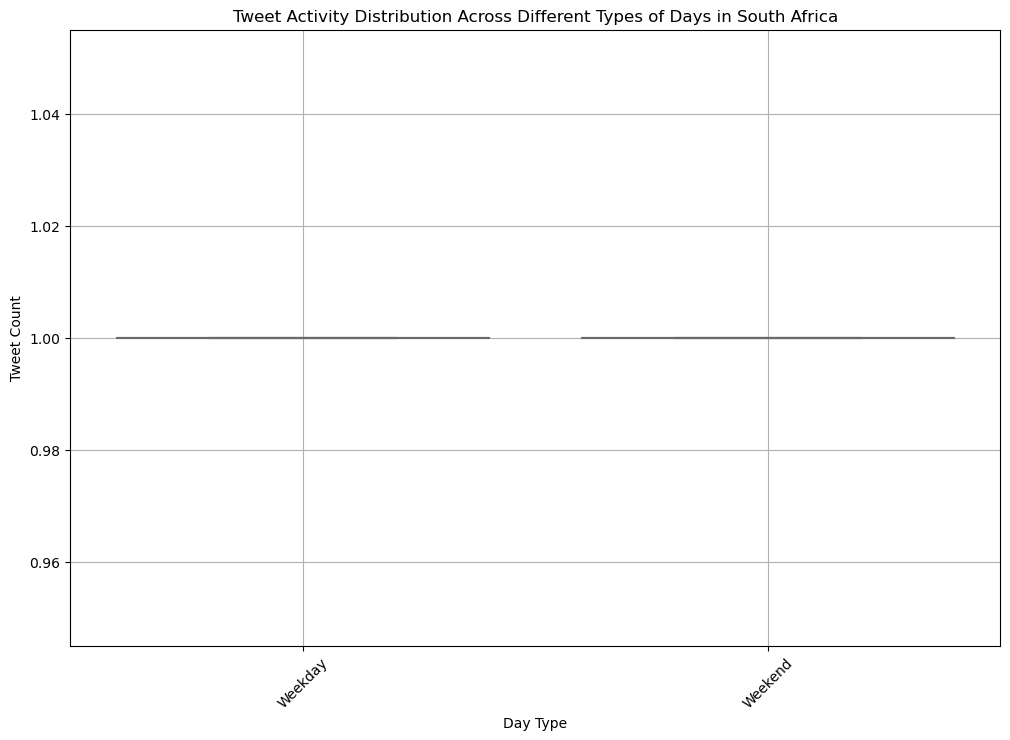

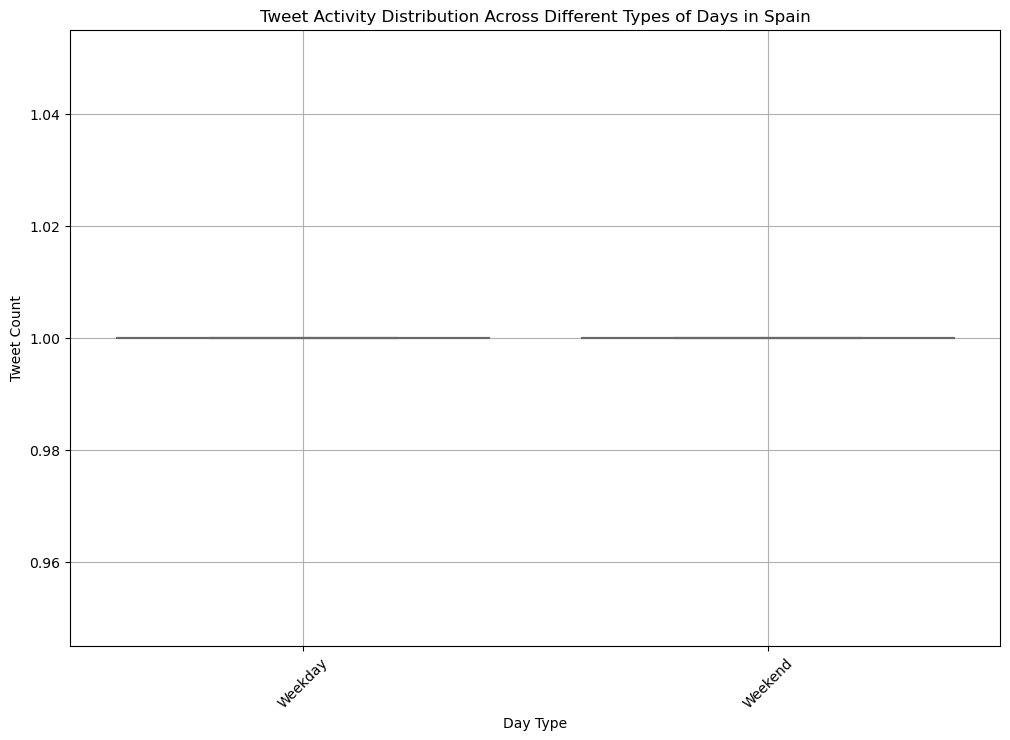

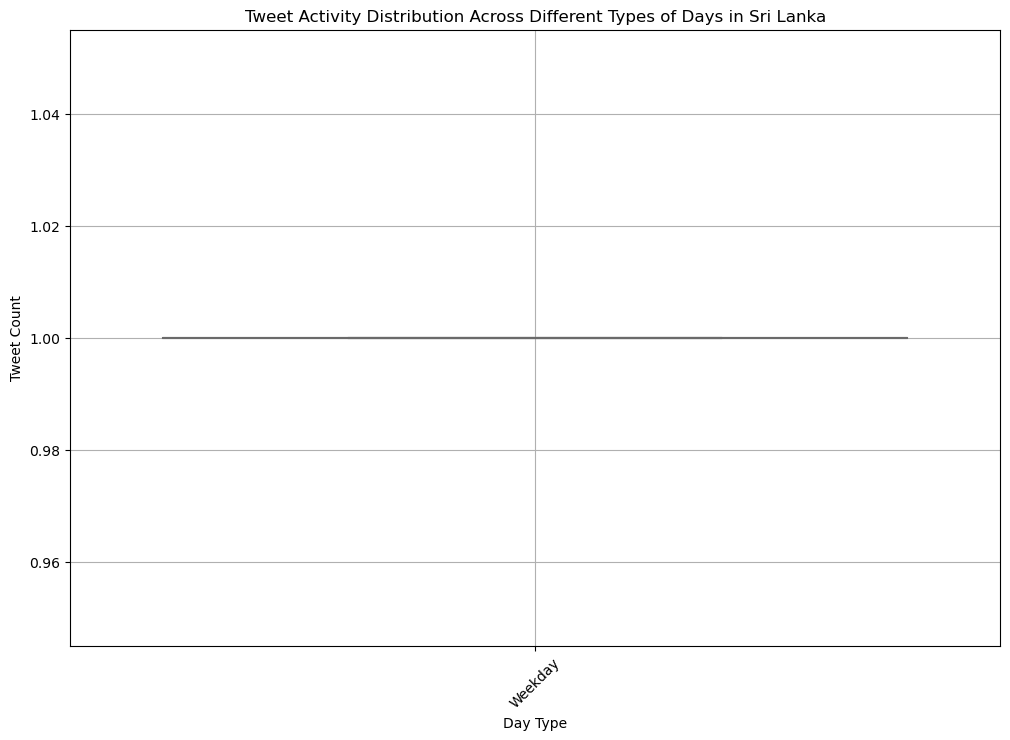

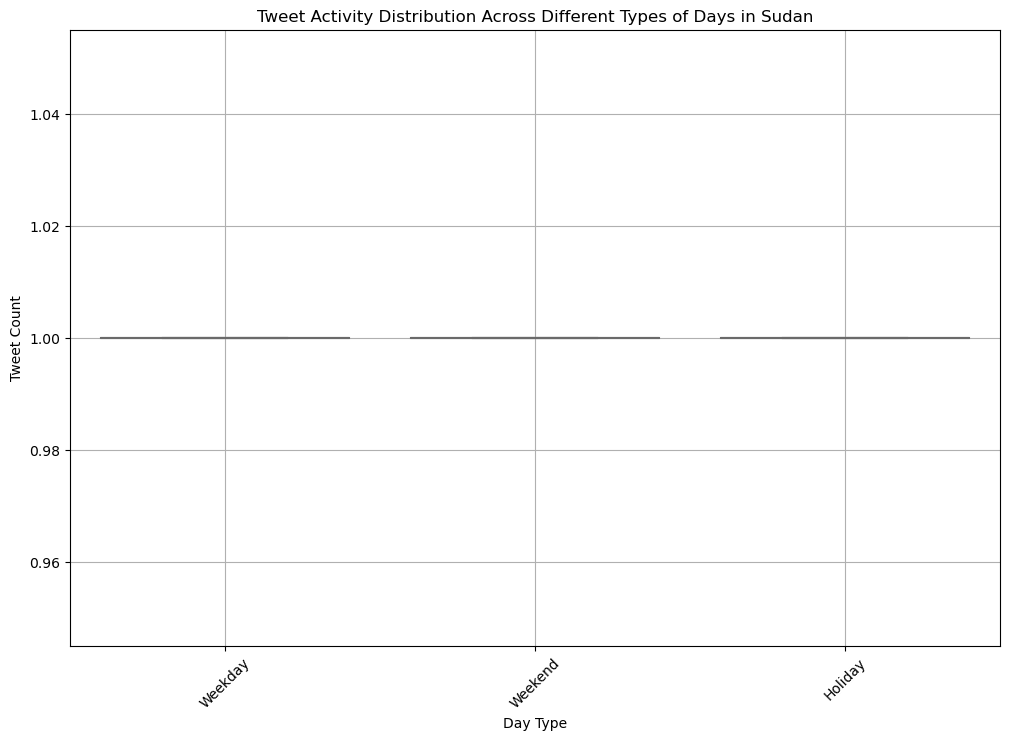

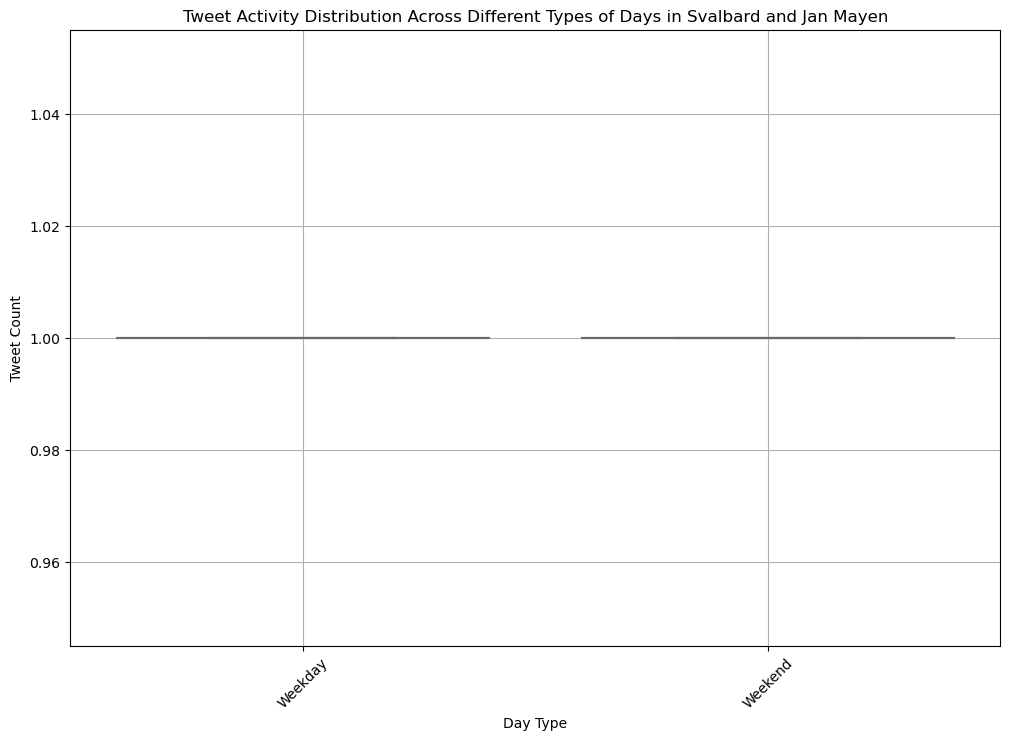

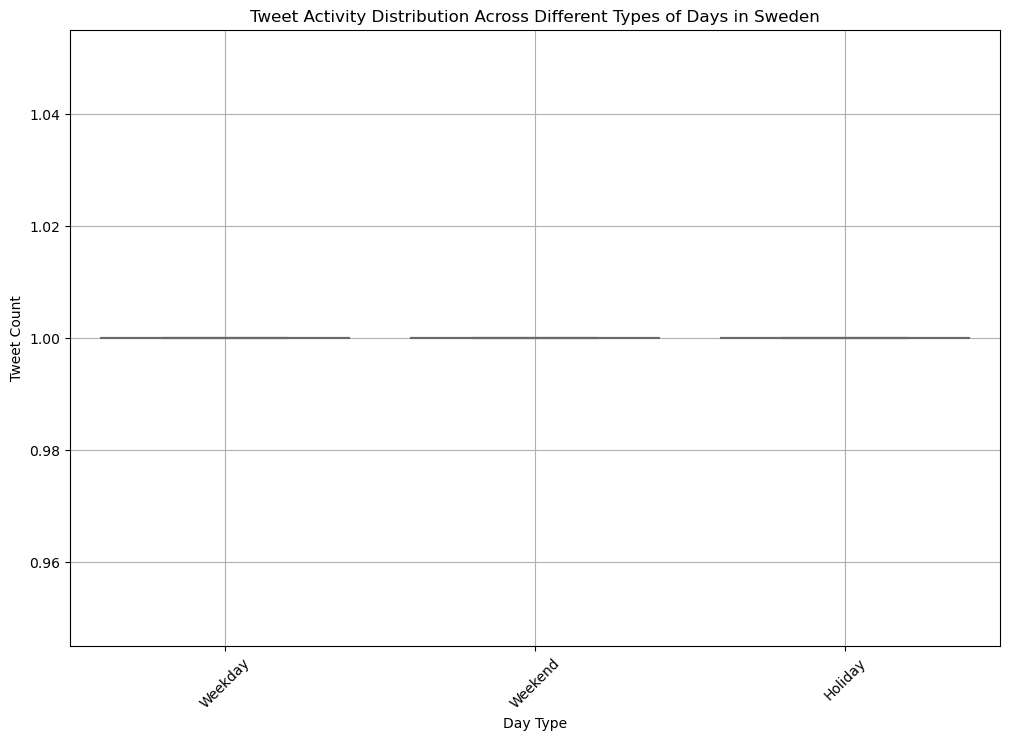

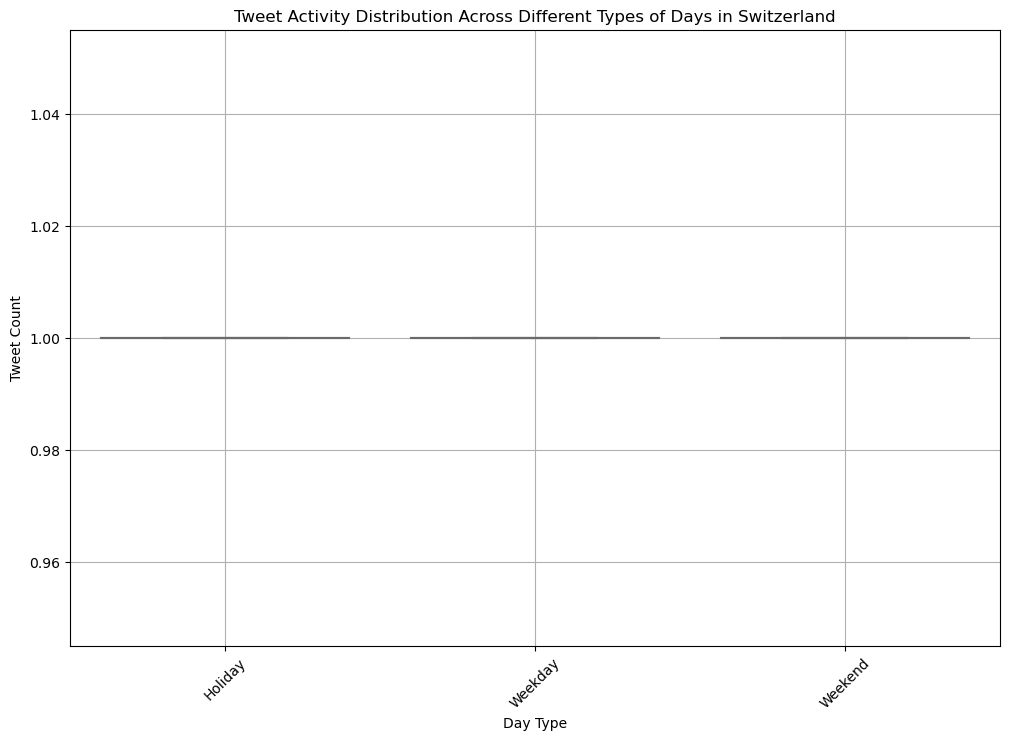

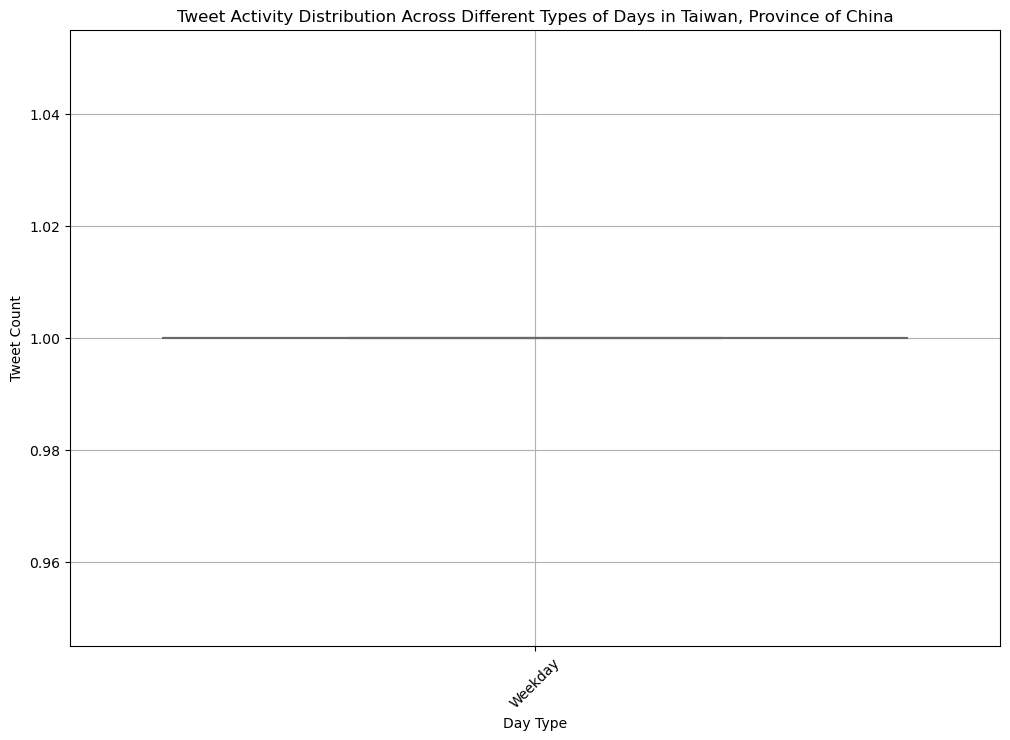

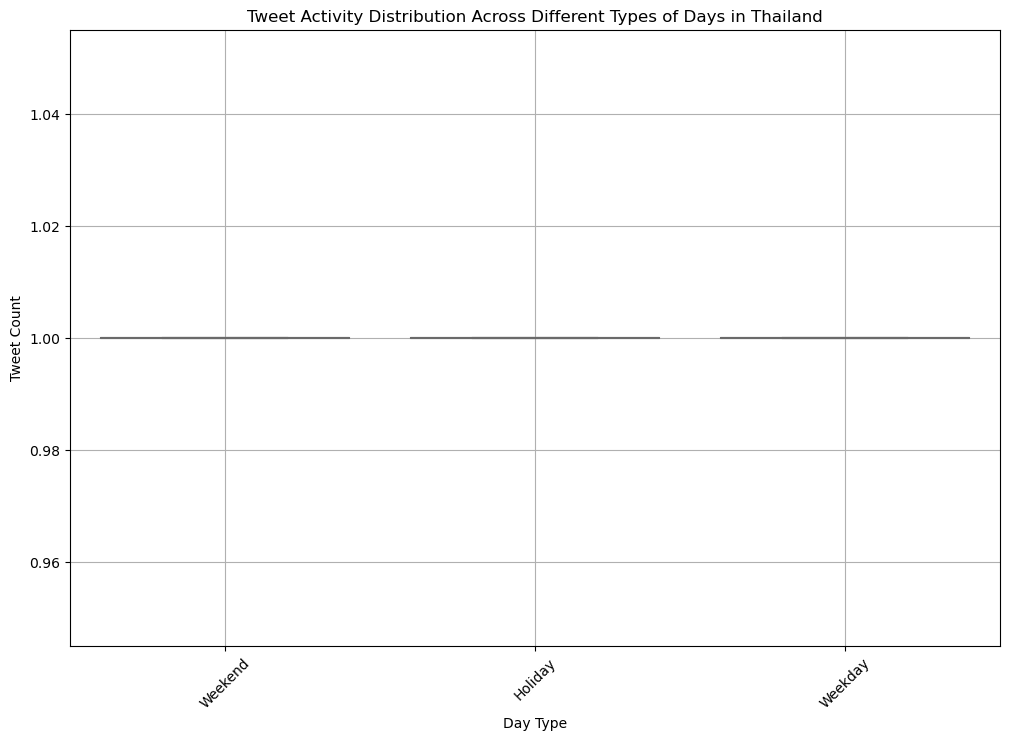

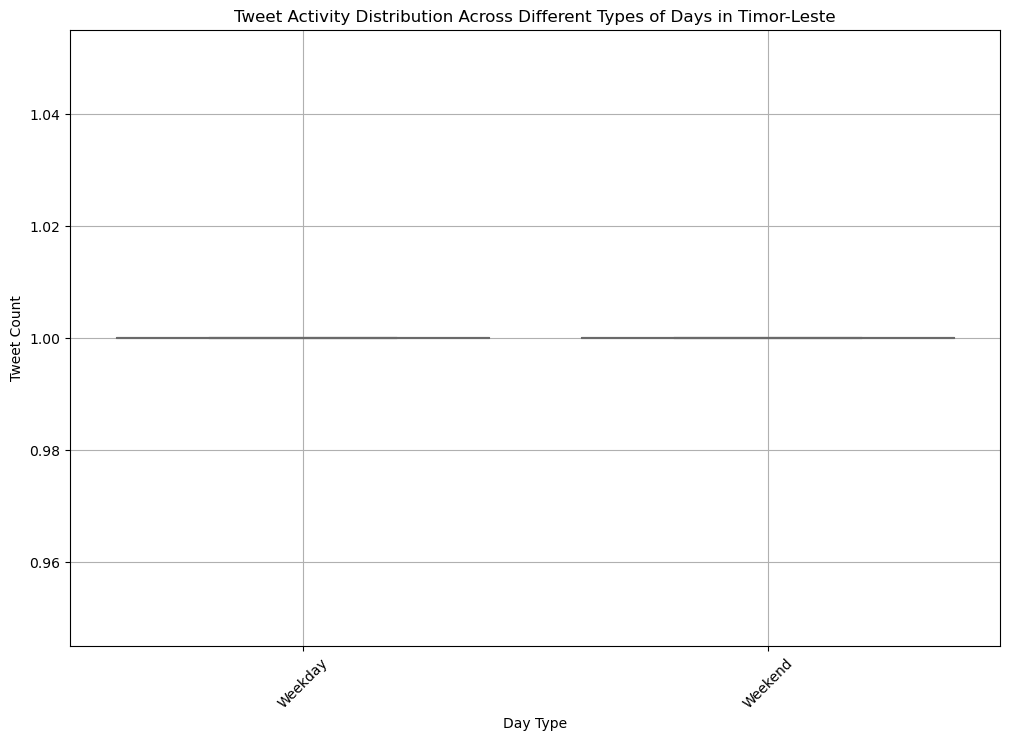

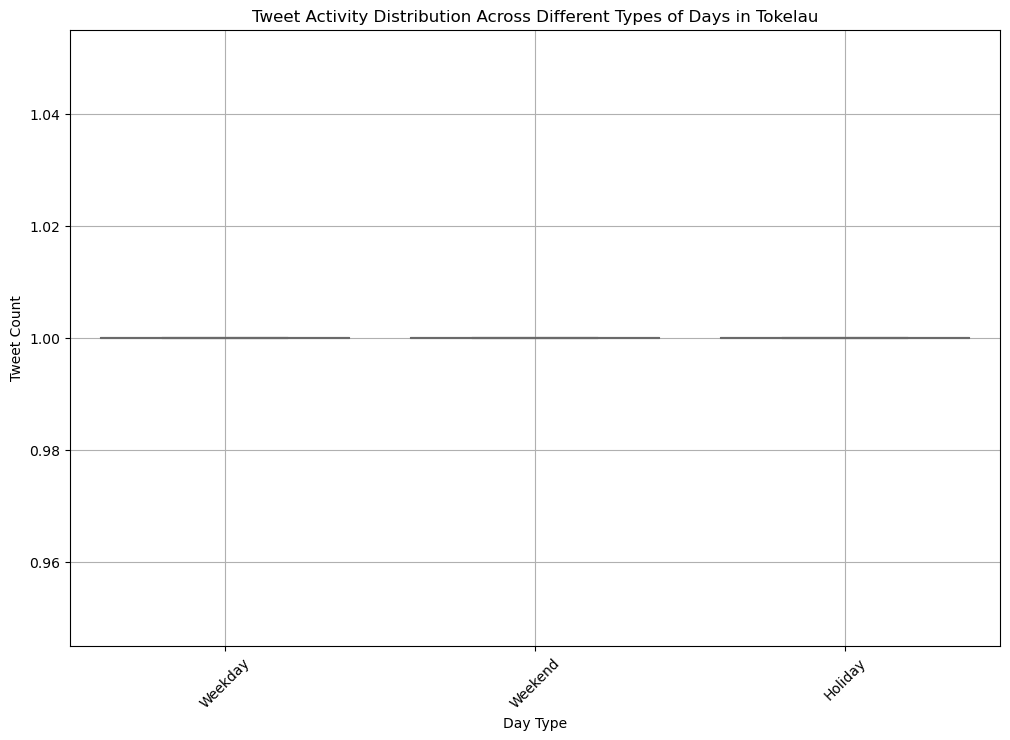

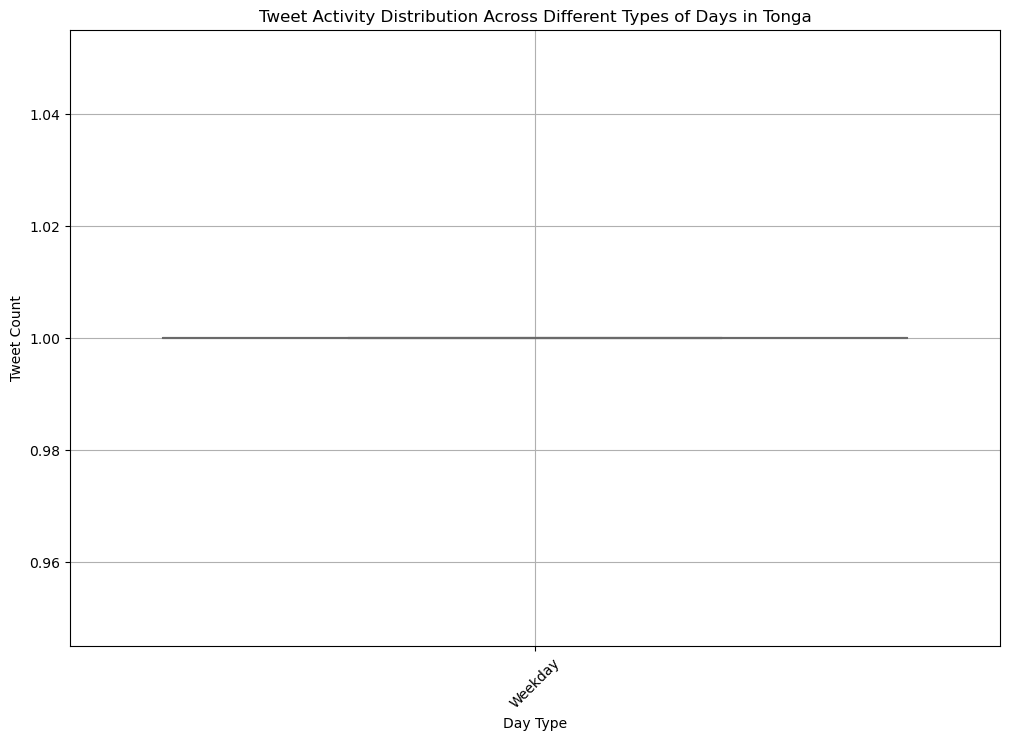

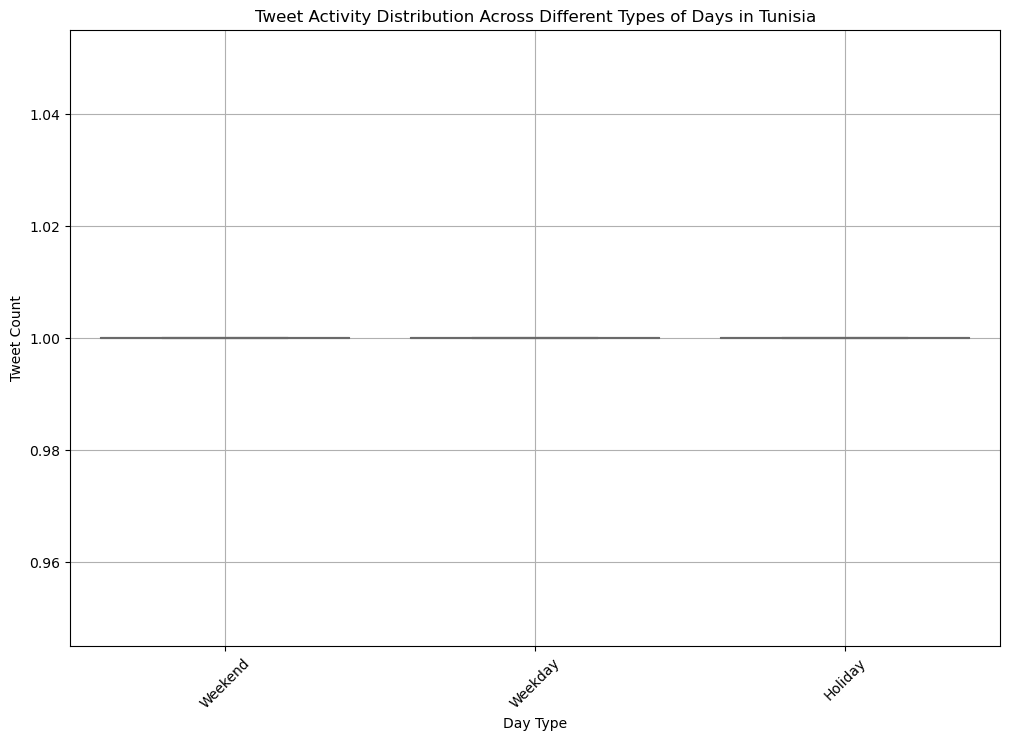

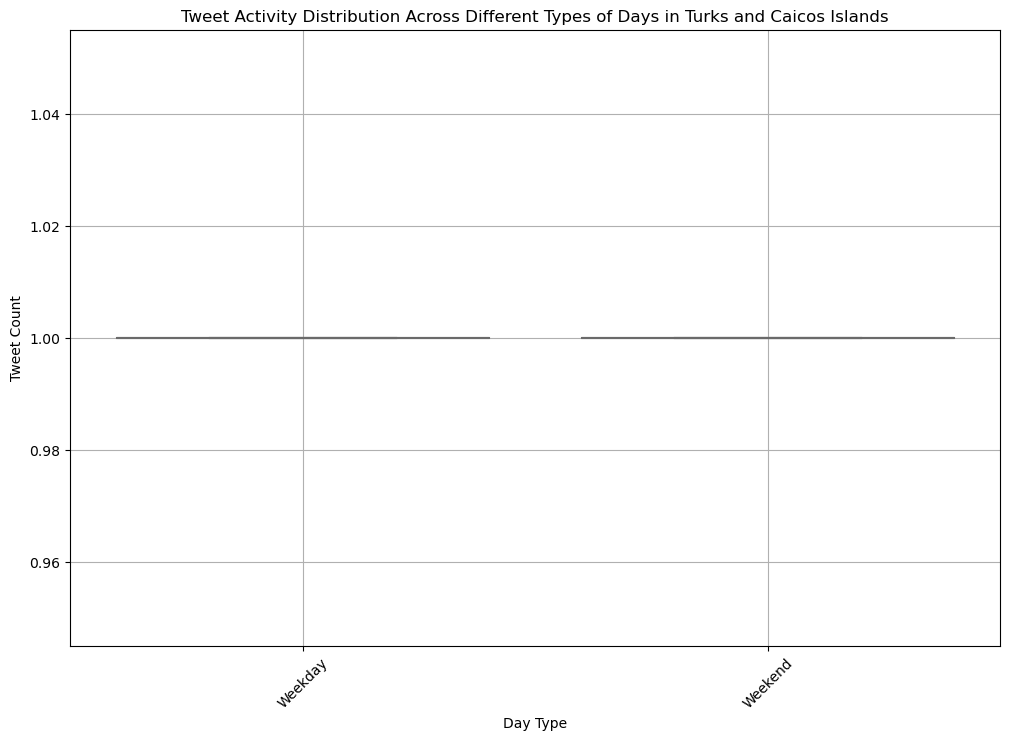

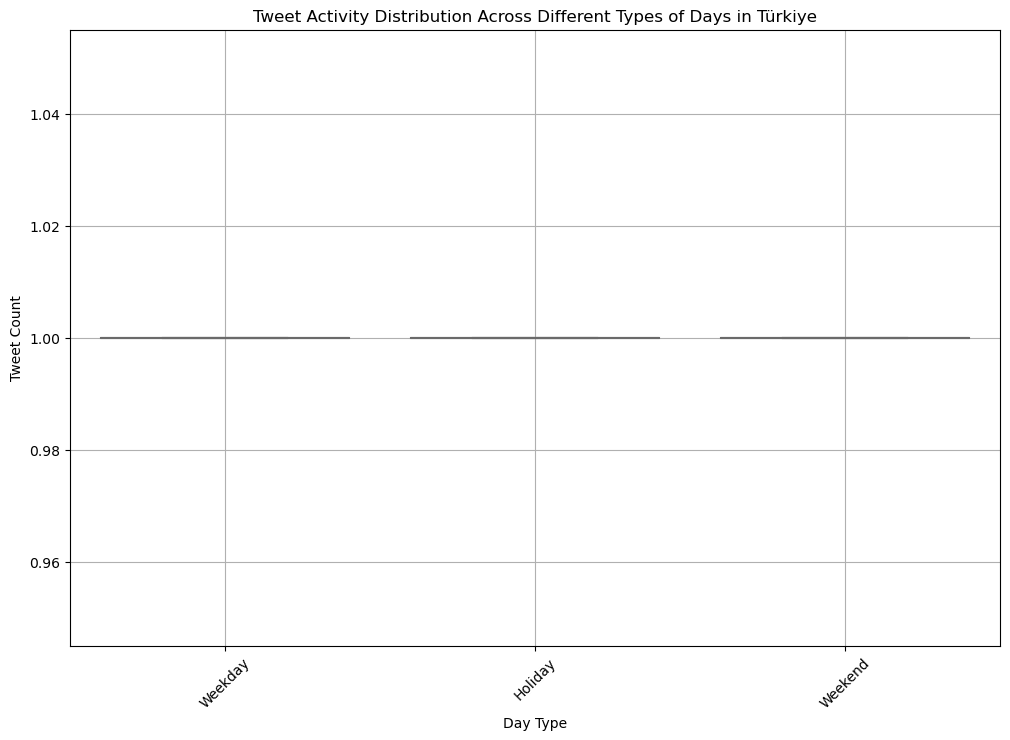

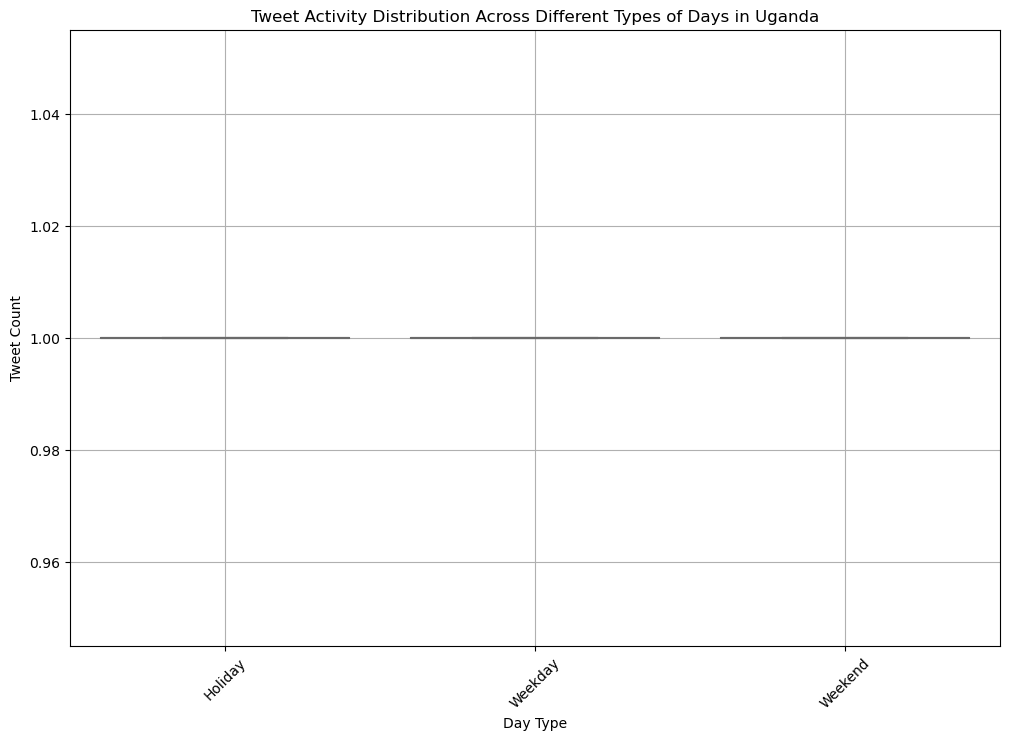

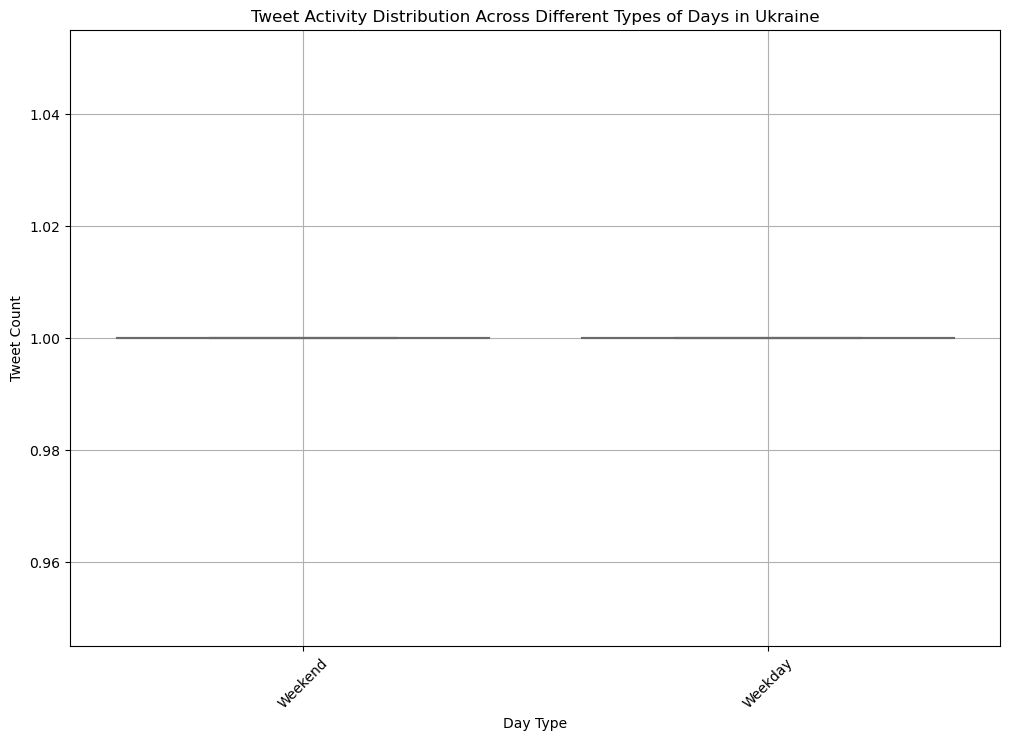

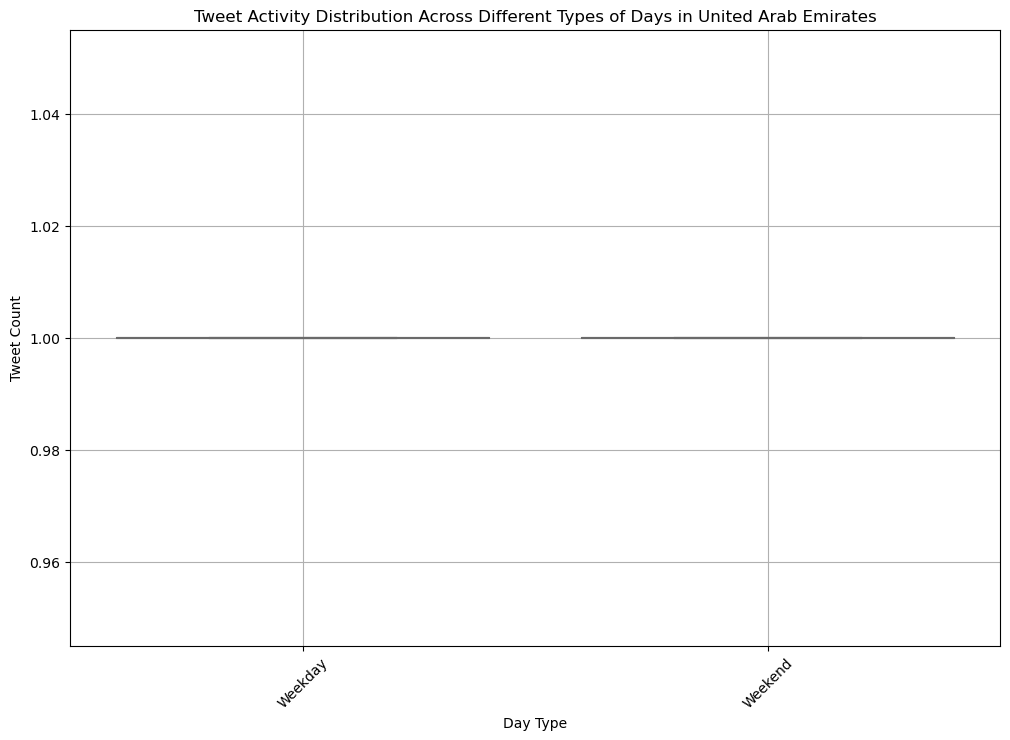

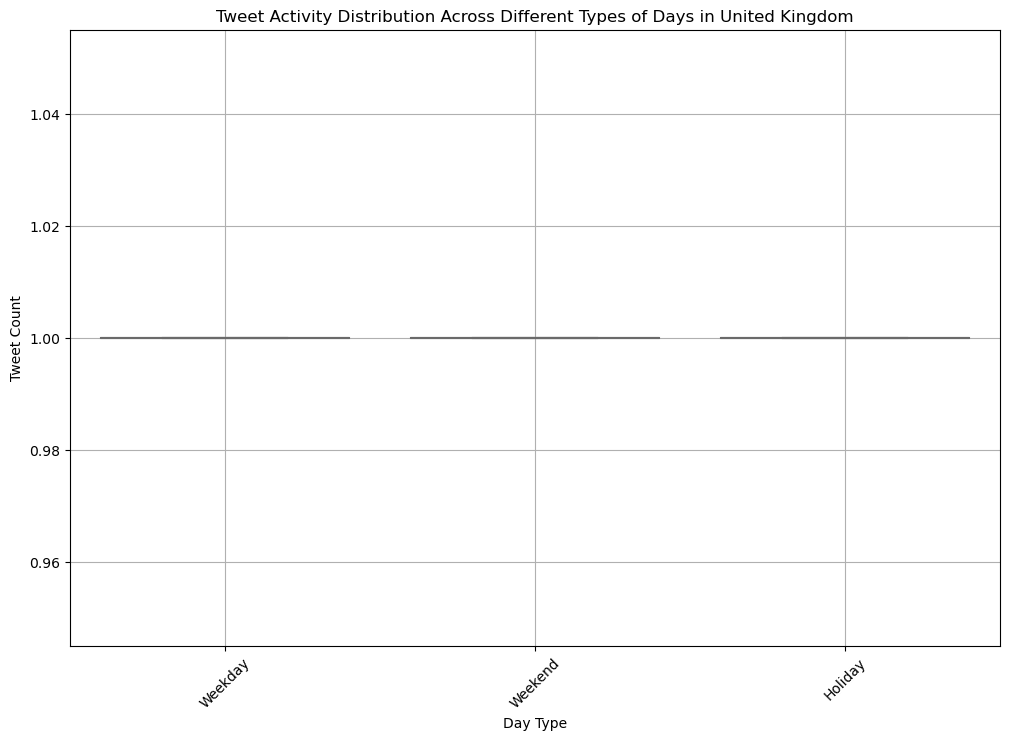

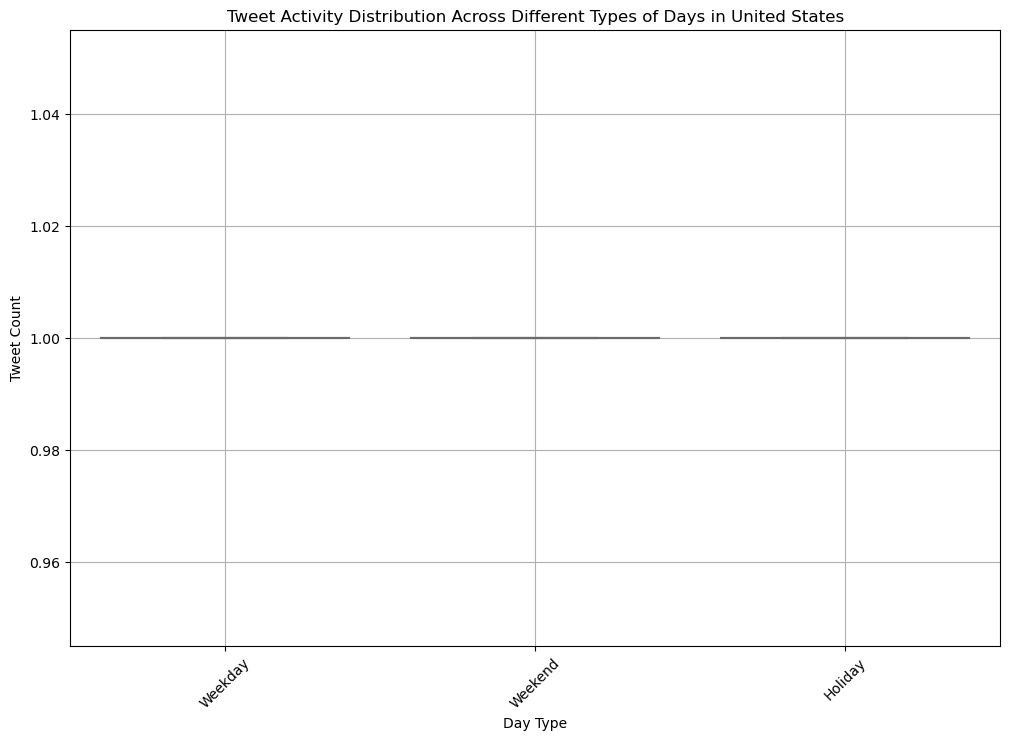

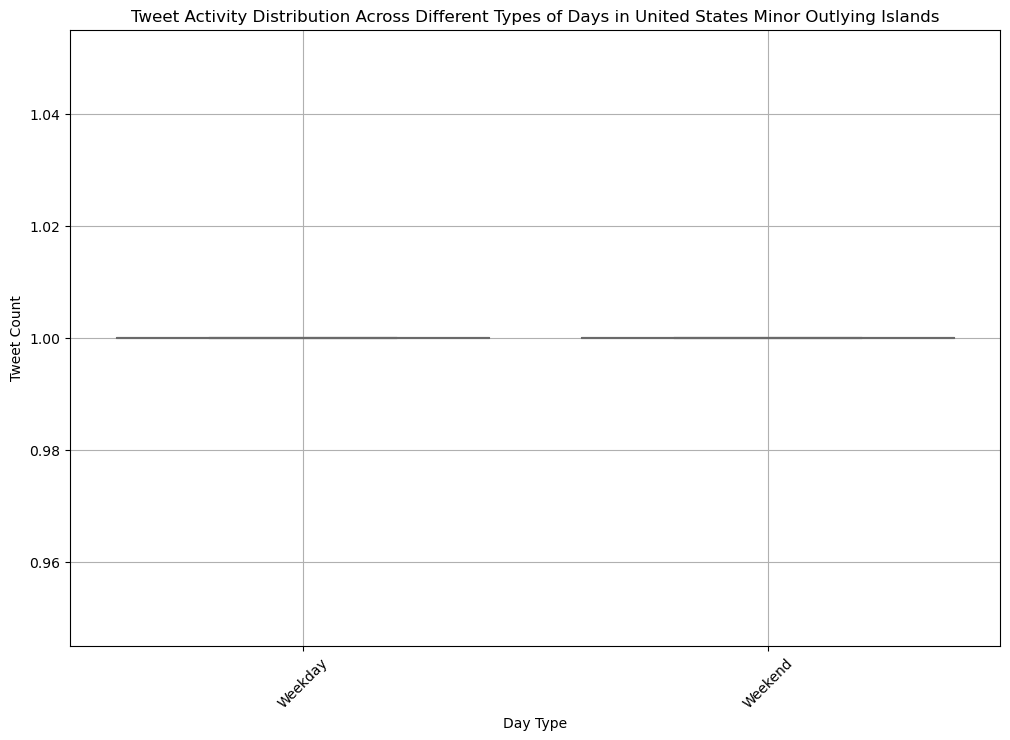

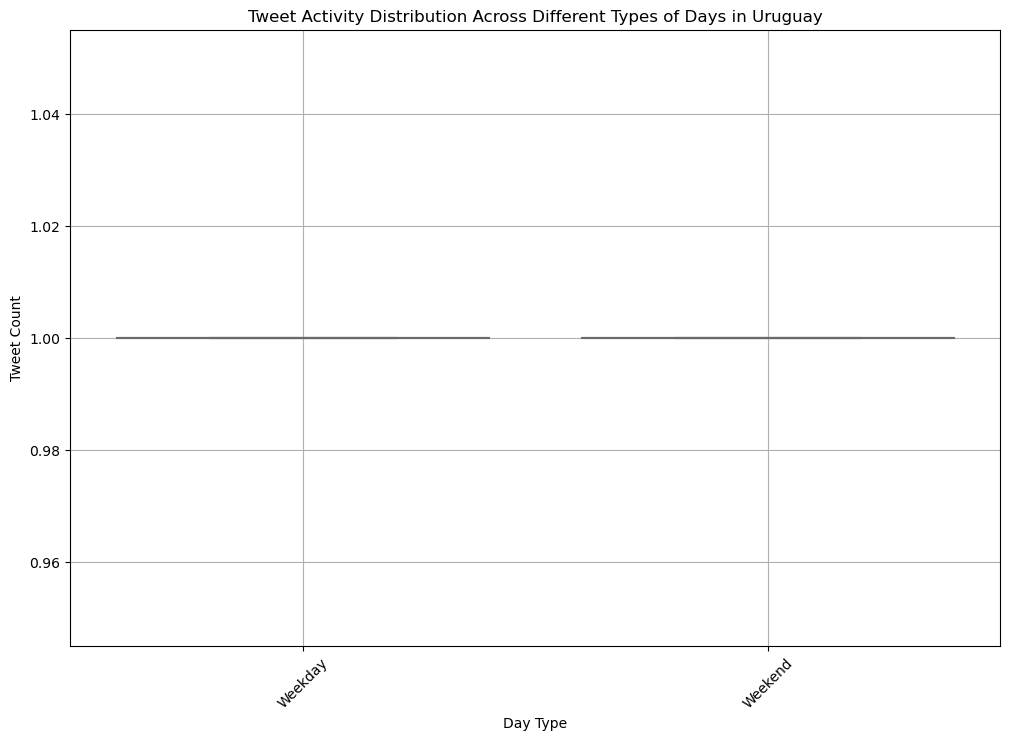

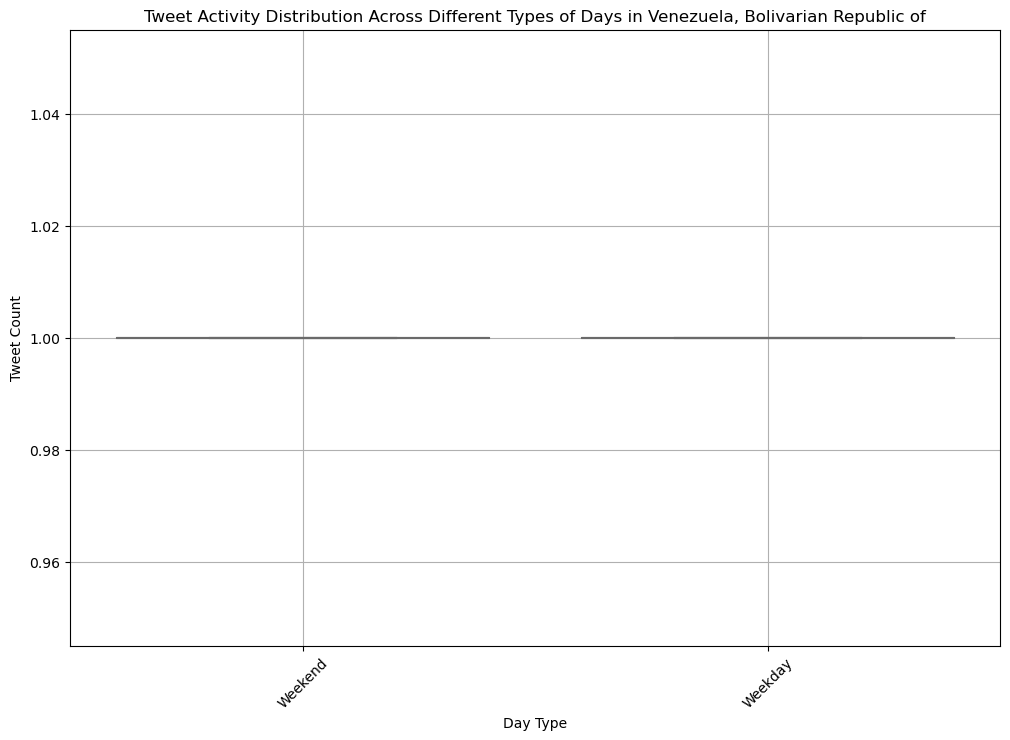

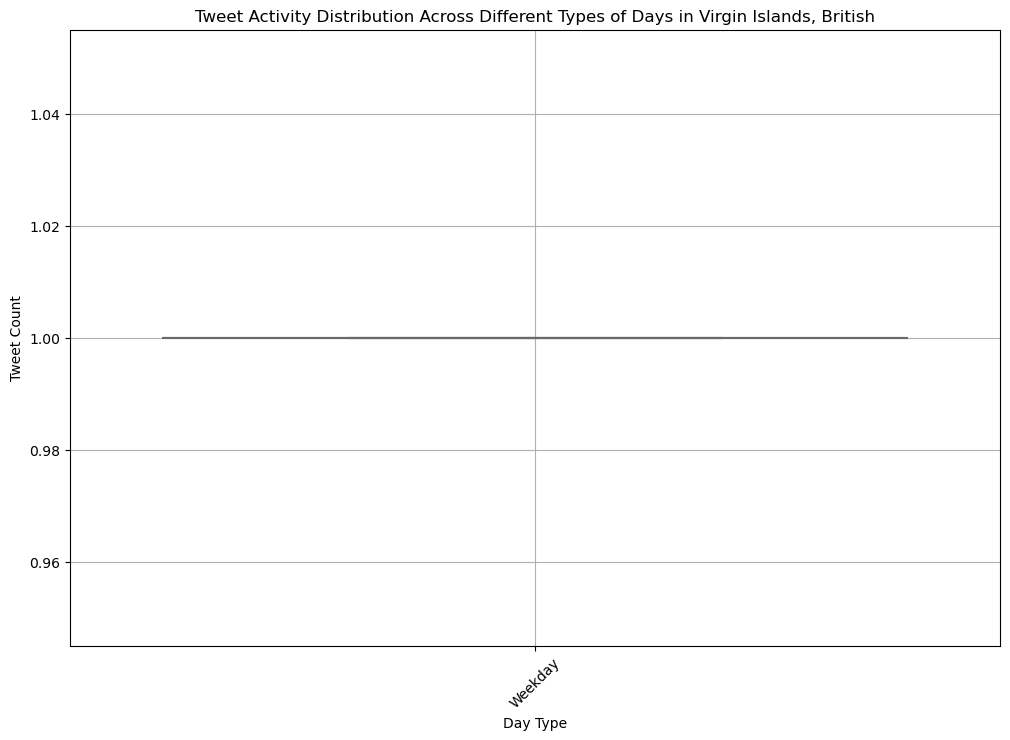

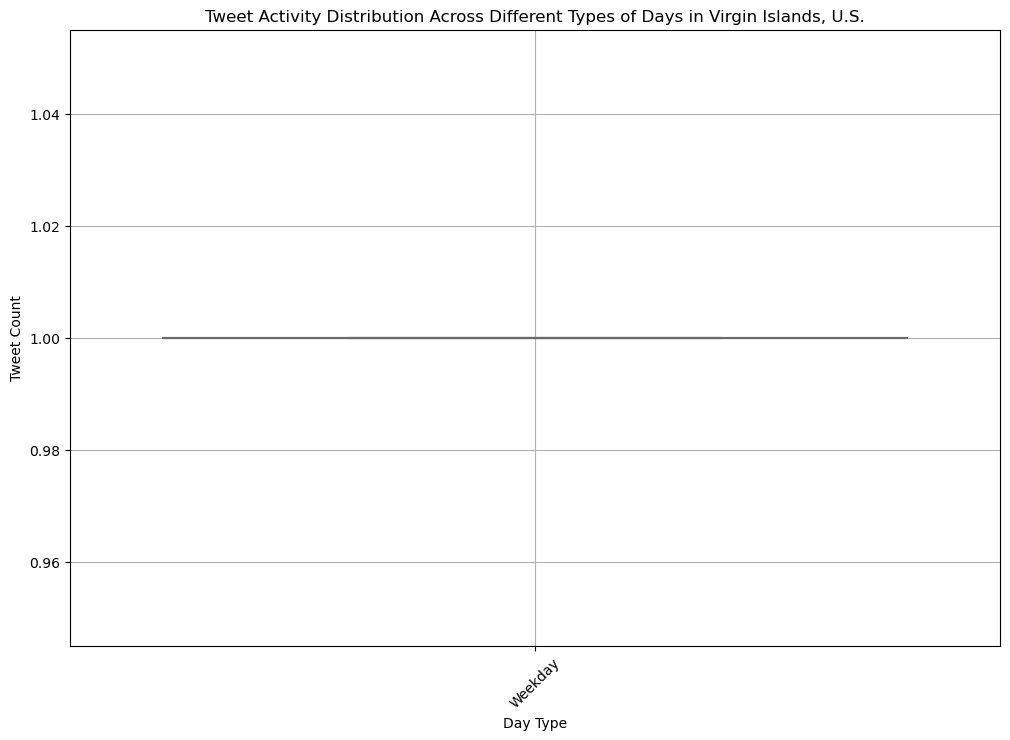

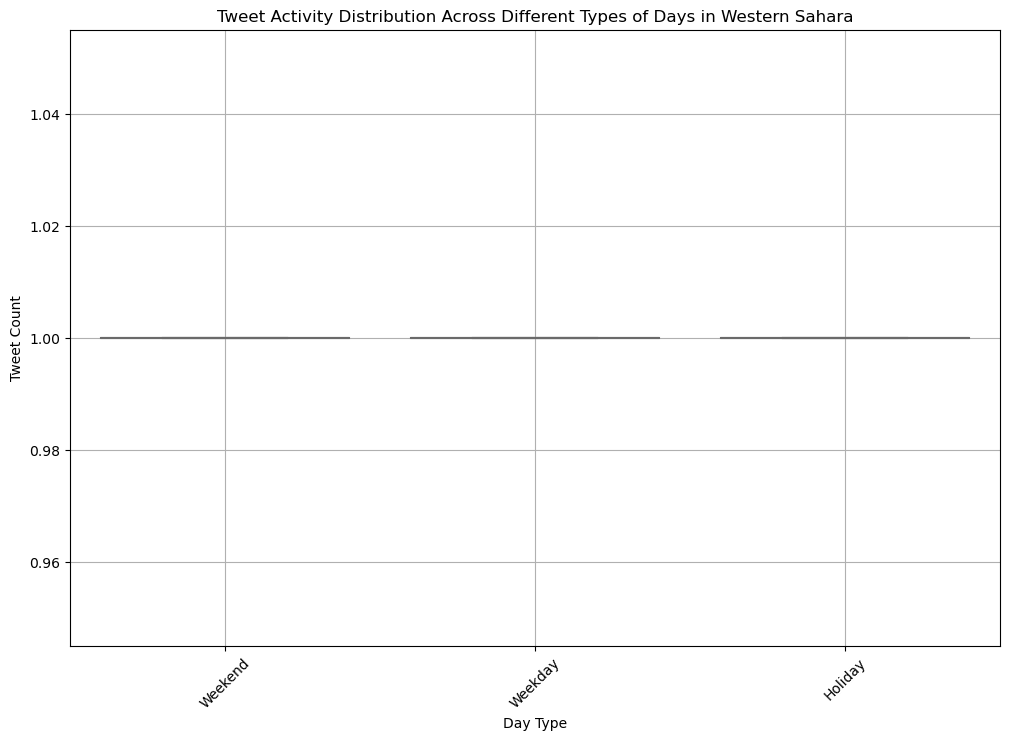

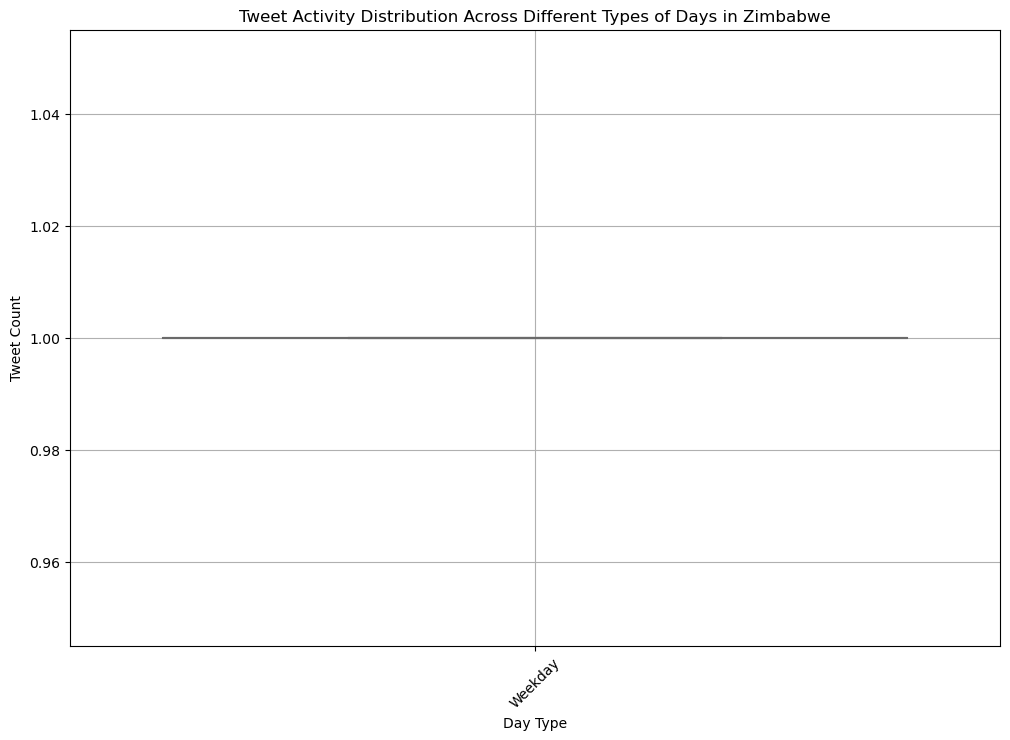

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# data = pd.read_csv("your_data.csv")

# Assuming each row represents one tweet, create a tweet_count column with value 1 for each tweet
data['tweet_count'] = 1

# Update the list of countries based on the unique values in the 'country' column
target_countries = data['country'].unique()

# Define additional international holidays
additional_holidays = {
    'International Workers\' Day': [(5, 1)],  # Labour Day
    'International Women\'s Day': [(3, 8)],   # Women's Day
    # Add more international holidays as needed
}

# Update the is_holiday function to include additional holidays
def is_holiday(date):
    holidays = {
        'New Year': [(1, 1)],
        'Easter': [(4, 4), (4, 5), (4, 6)],  # Assuming Easter falls on these dates
        'Christmas': [(12, 25)],
        # Add more holidays as needed
    }
    
    holidays.update(additional_holidays)
    
    # Check if the date matches any holiday
    for holiday, dates in holidays.items():
        for holiday_date in dates:
            if (date.month, date.day) == holiday_date:
                return True
    
    return False

# Convert UTC timestamp to datetime format
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'], unit='ms')  # Assuming timestamp is in milliseconds

# Extract date from the timestamp
data['date'] = data['utc_timestamp'].dt.date

# Define a function to identify weekends
def is_weekend(date):
    return date.weekday() >= 5  # Saturday and Sunday have weekday indices 5 and 6

# Apply the functions to create new columns indicating weekends and holidays
data['is_weekend'] = data['date'].apply(is_weekend)
data['is_holiday'] = data['date'].apply(is_holiday)

# Create the day_type column based on is_weekend and is_holiday
data['day_type'] = 'Weekday'
data.loc[data['is_weekend'], 'day_type'] = 'Weekend'
data.loc[data['is_holiday'], 'day_type'] = 'Holiday'

# Group data by country
grouped_data = data.groupby('country')

# Plotting with seaborn for each country

for country, country_data in grouped_data:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='day_type', y='tweet_count', data=country_data, palette='Set3')
    plt.title(f'Tweet Activity Distribution Across Different Types of Days in {country}')
    plt.xlabel('Day Type')
    plt.ylabel('Tweet Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


Epoch 1/100


C:\Users\saiab\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3414
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0457
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0329
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0054
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0033
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0037
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0033
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032
Epoch 16/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0

ValueError: x and y must have same first dimension, but have shapes (0,) and (104,)

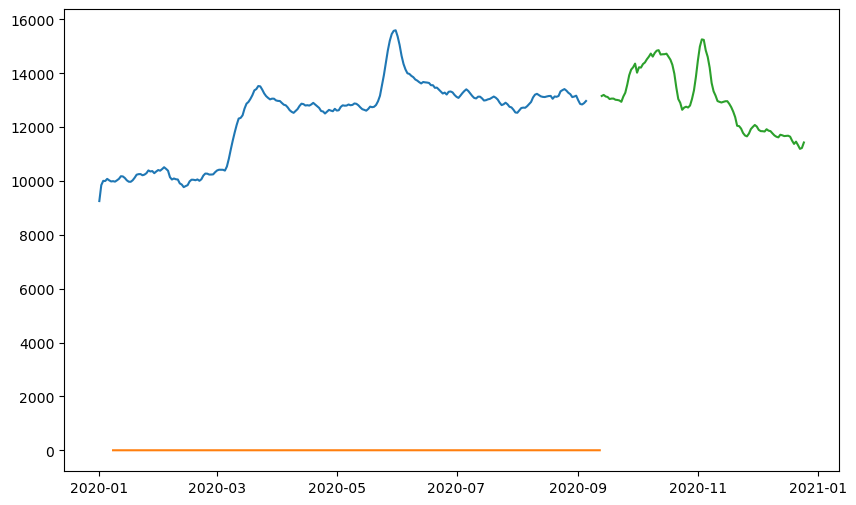

In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'], unit='ms')  # Assuming timestamp is in milliseconds

# Extract date from the timestamp
data['date'] = data['utc_timestamp'].dt.date

# Group data by date and calculate total tweet activity for each day
tweet_activity = data.groupby('date').size().reset_index(name='tweet_count')

# Normalize tweet activity data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tweet_activity['tweet_count'].values.reshape(-1, 1))

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.7)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Convert data into sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data)-seq_length):
        X.append(data[i:(i+seq_length), 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 7  # Number of days to consider as input for prediction
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Reverse scaling for predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(tweet_activity['date'][:len(train_predictions)], train_predictions, label='Train Predictions')
plt.plot(tweet_activity['date'][seq_length:len(train_predictions)+seq_length], train_data[:len(train_predictions)].reshape(-1), label='Actual Train Data')
plt.plot(tweet_activity['date'][len(train_predictions)+seq_length:len(train_predictions)+seq_length+len(test_predictions)], test_predictions, label='Test Predictions')
plt.plot(tweet_activity['date'][len(train_predictions)+seq_length+len(test_predictions)+seq_length:], test_data[:len(test_predictions)].reshape(-1), label='Actual Test Data')
plt.title('Tweet Activity Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Tweet Activity')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
import numpy as np

# Define the environment
class TweetEnvironment:
    def __init__(self, num_time_slots):
        self.num_time_slots = num_time_slots
        self.state = 0  # Current time slot
        self.reward_matrix = np.random.rand(num_time_slots)  # Random reward matrix
    
    def reset(self):
        self.state = 0  # Reset to initial time slot
        return self.state
    
    def step(self, action):
        # Update state based on action (tweet scheduling)
        self.state = action
        
        # Calculate reward based on engagement (dummy calculation for demonstration)
        reward = self.reward_matrix[action]
        
        # Check if terminal state reached (end of time slots)
        done = self.state == self.num_time_slots - 1
        
        return self.state, reward, done

# Define the Q-learning agent
class QLearningAgent:
    def __init__(self, num_actions, num_time_slots, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
        self.num_actions = num_actions
        self.num_time_slots = num_time_slots
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_table = np.zeros((num_time_slots, num_actions))
    
    def choose_action(self, state):
        # Epsilon-greedy policy
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.num_actions)  # Exploration
        else:
            return np.argmax(self.q_table[state])  # Exploitation
    
    def update_q_table(self, state, action, reward, next_state):
        # Q-learning update rule
        td_target = reward + self.discount_factor * np.max(self.q_table[next_state])
        td_error = td_target - self.q_table[state, action]
        self.q_table[state, action] += self.learning_rate * td_error

# Define parameters
num_time_slots = 24  # Number of time slots in a day
num_actions = num_time_slots  # Each action corresponds to a time slot
num_episodes = 1000  # Number of episodes for training

# Initialize environment and agent
env = TweetEnvironment(num_time_slots)
agent = QLearningAgent(num_actions, num_time_slots)

# Train the agent
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.update_q_table(state, action, reward, next_state)
        state = next_state
        total_reward += reward
    
    if episode % 100 == 0:
        print(f"Episode {episode}, Total Reward: {totbal_reward}")

# Example usage: After training, the agent's Q-table can be used to make optimal tweet scheduling decisions.
optimal_scheduling = np.argmax(agent.q_table, axis=1)
print("Optimal Tweet Scheduling (Time Slot):", optimal_scheduling)


Episode 0, Total Reward: 1.9680315313364383
Episode 100, Total Reward: 75.13318858378048
Episode 200, Total Reward: 145.68749715813794
Episode 300, Total Reward: 48.211243623220014
Episode 400, Total Reward: 119.29388941612636
Episode 500, Total Reward: 62.42163766179656
Episode 600, Total Reward: 282.76328192962313
Episode 700, Total Reward: 13.52641654588564
Episode 800, Total Reward: 1.7367230972862369
Episode 900, Total Reward: 106.12339741727558
Optimal Tweet Scheduling (Time Slot): [11  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  9  0  0  0]


In [4]:
from scipy.stats import f_oneway


# Assuming you have a 'characteristic' column containing job titles or characteristic groups
# Replace 'characteristic' with the actual column name in your dataset
job_titles = data['characteristic'].unique()

# Perform ANOVA analysis
# Here, we'll compare tweet activity (or any other relevant metric) among different job titles
# Replace 'tweet_activity' with the actual column name representing the metric you want to analyze
grouped_data = [data[data['characteristic'] == title]['tweet_activity'] for title in job_titles]
f_statistic, p_value = f_oneway(*grouped_data)

# Print results
print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There are significant differences in tweet activity among different job titles.")
else:
    print("Fail to reject null hypothesis: There are no significant differences in tweet activity among different job titles.")

C:\Users\saiab\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


KeyError: 'tweet_activity'

ANOVA Results:
F-statistic: 4414.2243865328755
p-value: 0.0


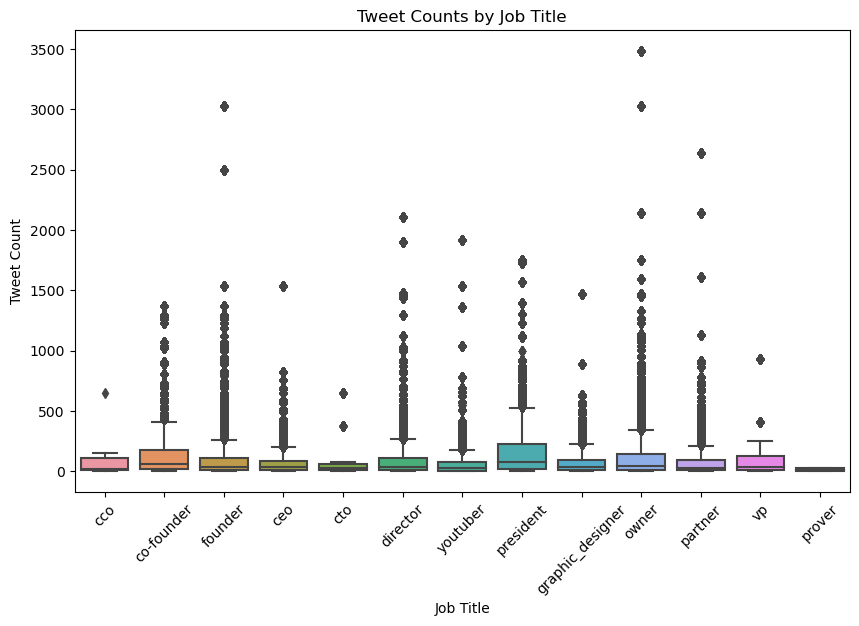

In [9]:
import seaborn as sns
from scipy.stats import f_oneway

tweet_counts = data['user_hash'].value_counts()

# Merge tweet counts with the original dataset based on 'user hash'
data = data.merge(tweet_counts.rename('tweet_count'), left_on='user_hash', right_index=True)

# Define job_titles
job_titles = data['characteristic'].unique()

# Perform ANOVA analysis
f_statistic, p_value = f_oneway(*[data[data['characteristic'] == title]['tweet_count'] for title in job_titles])

# Print ANOVA results
print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Visualize tweet counts by job title using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='characteristic', y='tweet_count', data=data)
plt.title('Tweet Counts by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [11]:
!pip install geopy

     -------------------------------------- 125.4/125.4 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00


In [15]:
import pycountry
def get_country(city):
    try:
        country_code = city.split(",")[-1].strip()  # Extract country code
        country = pycountry.countries.get(alpha_2=country_code)  # Find country by ISO code
        if country:
            return country.name
        else:
            return None  # Return original city if no match found
    except AttributeError:
        return None # Return original city if AttributeError occurs

# Apply the function to the 'City of Birth' column
data['Country'] = data['location'].apply(get_country)

# Remove rows where the country of birth is None
data = data.dropna(subset=['Country'])

# Drop the 'City of Birth' column if needed
data.drop(columns=['location'], inplace=True)

# Print the modified DataFrame
print(data)

        characteristic           utc_timestamp  \
1338151        founder 2020-06-20 22:08:56.659   
1343578        founder 2020-06-23 14:56:38.665   
1346167        founder 2020-06-24 18:18:01.664   
1363212        founder 2020-07-02 19:16:03.666   
1416834        founder 2020-07-28 19:14:08.665   
...                ...                     ...   
4546774       youtuber 2020-12-31 03:17:24.659   
4546786       youtuber 2020-12-31 03:53:22.666   
4546876       youtuber 2020-12-31 06:58:28.661   
4547145       youtuber 2020-12-31 16:43:34.657   
4547594       youtuber 2021-01-01 03:46:46.662   

                                user_hash                    gmt_timestamp  \
1338151  b3202ee68f522147fa66335306dad543 2020-06-20 22:08:56.659000+00:00   
1343578  b3202ee68f522147fa66335306dad543 2020-06-23 14:56:38.665000+00:00   
1346167  b3202ee68f522147fa66335306dad543 2020-06-24 18:18:01.664000+00:00   
1363212  b3202ee68f522147fa66335306dad543 2020-07-02 19:16:03.666000+00:00   
1416834  

In [24]:
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway

# Load your data
# data = pd.read_csv("your_data.csv")

# Group data by 'country' and 'characteristic', then count the occurrences
tweet_counts = data.groupby(['Country', 'characteristic']).size().reset_index(name='tweet_count')

# Group data by 'country' and 'characteristic'
grouped_data = data.groupby(['Country', 'characteristic'])

# Loop over each group
for (country, characteristic), group_data in grouped_data:
    # Skip ANOVA analysis if there's only one unique 'characteristic' value
    if group_data['characteristic'].nunique() < 2:
        print(f"Not enough variation for ANOVA analysis in {country}, {characteristic}")
        continue

    # Perform ANOVA analysis
    f_statistic, p_value = f_oneway(*[group_data[group_data['characteristic'] == title]['utc_timestamp'] for title in group_data['characteristic'].unique()])

    # Print ANOVA results for this group
    print(f"ANOVA Results for {country}, {characteristic}:")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)

    # Visualize tweet counts by characteristic using box plots for this group
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='characteristic', y='utc_timestamp', data=group_data)
    plt.title(f'Tweet Counts by Characteristic in {country}, {characteristic}')
    plt.xlabel('Characteristic')
    plt.ylabel('Tweet Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


Not enough variation for ANOVA analysis in Afghanistan, owner
Not enough variation for ANOVA analysis in Albania, ceo
Not enough variation for ANOVA analysis in Albania, co-founder
Not enough variation for ANOVA analysis in Albania, director
Not enough variation for ANOVA analysis in Albania, founder
Not enough variation for ANOVA analysis in Albania, graphic_designer
Not enough variation for ANOVA analysis in Albania, owner
Not enough variation for ANOVA analysis in Albania, partner
Not enough variation for ANOVA analysis in Albania, president
Not enough variation for ANOVA analysis in Albania, vp
Not enough variation for ANOVA analysis in Albania, youtuber
Not enough variation for ANOVA analysis in Algeria, ceo
Not enough variation for ANOVA analysis in American Samoa, owner
Not enough variation for ANOVA analysis in Andorra, ceo
Not enough variation for ANOVA analysis in Andorra, owner
Not enough variation for ANOVA analysis in Anguilla, founder
Not enough variation for ANOVA analys